# __SUTIN BOBIHU__
Data Scientist Home Credit Indonesia

#**Introduction: Home Credit Default Rate**

__Supervised Learning__: Label disertakan dalam data pelatihan dan tujuannya adalah untuk melatih model untuk belajar memprediksi label dari fitur.

__Classification__: Label adalah variabel biner, 0 (akan membayar pinjaman tepat waktu), 1 (akan mengalami kesulitan dalam membayar pinjaman).


Data disediakan oleh Home Credit, sebuah layanan yang didedikasikan untuk menyediakan jalur kredit (pinjaman) kepada masyarakat yang tidak memiliki rekening bank. Memprediksi apakah klien akan membayar kembali pinjaman atau mengalami kesulitan adalah kebutuhan bisnis yang penting.

Ada 7 sumber data yang berbeda:

* **application_train/application_test:** data pelatihan dan pengujian utama yang berisi informasi tentang setiap aplikasi pinjaman di Home Credit. Setiap pinjaman memiliki barisnya sendiri dan diidentifikasi dengan fitur **`SK_ID_CURR`.** Data aplikasi pelatihan dilengkapi dengan **`TARGET`** yang menunjukkan 0: pinjaman telah dilunasi atau 1: pinjaman belum dilunasi.
* **bureau:** data mengenai kredit klien sebelumnya dari lembaga keuangan lain. Setiap kredit sebelumnya memiliki barisnya sendiri di biro, tetapi satu pinjaman dalam data aplikasi dapat memiliki beberapa kredit sebelumnya.
* **bureau_balance:** data bulanan mengenai kredit sebelumnya di biro. Setiap baris adalah satu bulan dari kredit sebelumnya, dan satu kredit sebelumnya dapat memiliki beberapa baris, satu untuk setiap bulan dari panjang kredit.
* **previous_application:** aplikasi sebelumnya untuk pinjaman di Home Credit dari klien yang memiliki pinjaman dalam data aplikasi. Setiap pinjaman saat ini dalam data aplikasi dapat memiliki beberapa pinjaman sebelumnya. Setiap pengajuan sebelumnya memiliki satu baris dan diidentifikasi dengan fitur **`SK_ID_PREV`.**
* **POS_CASH_BALANCE:** data bulanan mengenai point of sale atau pinjaman tunai yang pernah dilakukan oleh nasabah Home Credit. Setiap baris adalah satu bulan dari point of sale atau pinjaman tunai sebelumnya, dan satu pinjaman sebelumnya dapat memiliki banyak baris.
* **credit_card_balance:** data bulanan mengenai kartu kredit yang pernah dimiliki oleh nasabah di Home Credit. Setiap baris adalah satu bulan saldo kartu kredit, dan satu kartu kredit dapat memiliki banyak baris.
* **installments_payment:** riwayat pembayaran untuk pinjaman sebelumnya di Home Credit. Ada satu baris untuk setiap pembayaran yang dilakukan dan satu baris untuk setiap pembayaran yang terlewat.

#**Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Loading Data**

In [2]:
# Data app_test
url = "https://raw.githubusercontent.com/sutin-bobihu01/Project-HCI/main/Application_test.csv"
app_test = pd.read_csv(url, low_memory=False)

# Data app_train
url = "https://raw.githubusercontent.com/sutin-bobihu01/Project-HCI/main/Application_train.csv"
app_train = pd.read_csv(url, low_memory=False)


print("Ukuran DataFrame app_test:", app_test.shape)
print("Ukuran DataFrame app_train:", app_train.shape)

Ukuran DataFrame app_test: (7200, 211)
Ukuran DataFrame app_train: (4173, 212)


In [3]:
# Cek Column SK_ID_CURR
print(app_test["SK_ID_CURR"].shape)
print(app_train["SK_ID_CURR"].shape)


(7200,)
(4173,)


In [4]:
# Check for duplicated values in app_test
duplicate_indices_test = app_test[app_test.duplicated('SK_ID_CURR')]['SK_ID_CURR'].tolist()
print("Jumlah nilai SK_ID_CURR yang duplikat di app_test:", len(duplicate_indices_test))

# Check for duplicated values in app_train
duplicate_indices_train = app_train[app_train.duplicated('SK_ID_CURR')]['SK_ID_CURR'].tolist()
print("Jumlah nilai SK_ID_CURR yang duplikat di app_train:", len(duplicate_indices_train))


Jumlah nilai SK_ID_CURR yang duplikat di app_test: 3350
Jumlah nilai SK_ID_CURR yang duplikat di app_train: 309


In [5]:
app_train = app_train.groupby('SK_ID_CURR').last().reset_index()
app_test = app_test.groupby('SK_ID_CURR').last().reset_index()

In [6]:
print(app_train.shape)
print(app_test.shape)

(3864, 212)
(3850, 211)


In [7]:
print("Jumlah nilai SK_ID_CURR yang duplikat di app_test:", app_test['SK_ID_CURR'].duplicated().sum())
print("Jumlah nilai SK_ID_CURR yang duplikat di app_train:", app_train['SK_ID_CURR'].duplicated().sum())

Jumlah nilai SK_ID_CURR yang duplikat di app_test: 0
Jumlah nilai SK_ID_CURR yang duplikat di app_train: 0


Dari informasi yang diberikan, terlihat bahwa DataFrame app_train dan app_test telah diubah dengan mengelompokkan berdasarkan kolom 'SK_ID_CURR' dan mengambil nilai terakhir dari setiap kelompok. Setelah perubahan ini, ukuran DataFrame app_train menjadi (3864, 212), sementara ukuran DataFrame app_test menjadi (3850, 211).

Proses pengelompokan ini dapat bermanfaat dalam menangani nilai duplikat berdasarkan 'SK_ID_CURR'. Dengan mengambil nilai terakhir dari setiap kelompok, kita dapat memastikan bahwa setiap 'SK_ID_CURR' mewakili entitas unik dalam data.

#**Overview Data**

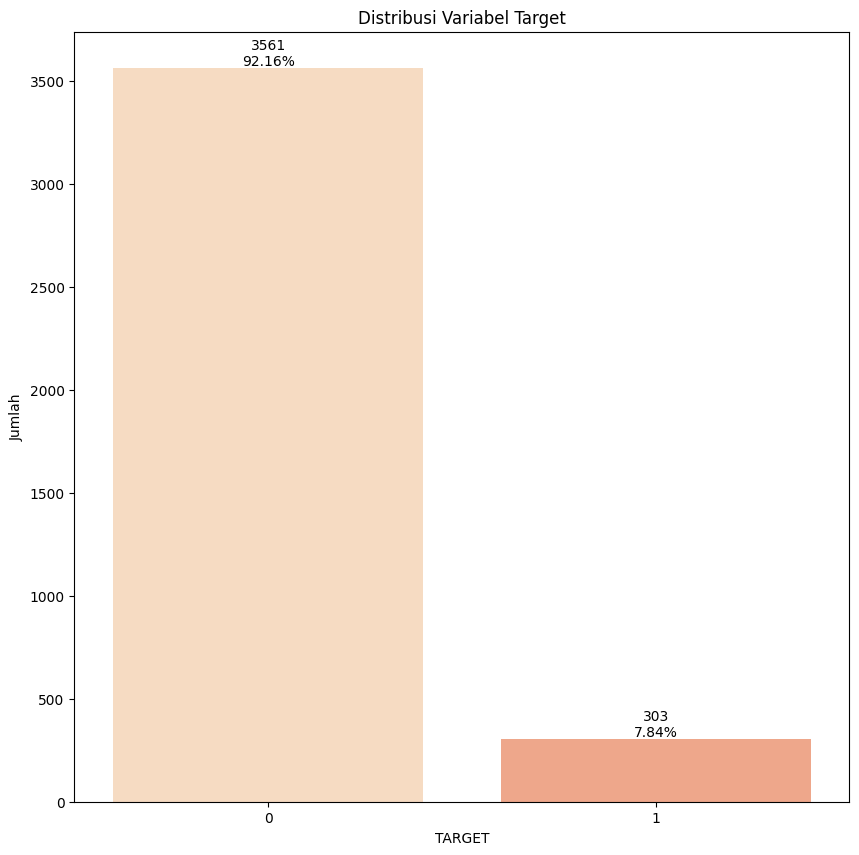

In [8]:
# Distribusi TARGET
target_distribution = app_train['TARGET'].value_counts()
total_samples = target_distribution.sum()
percentage_distribution = (target_distribution / total_samples) * 100

colors = ["#FFDAB9", "#FFA07A"]

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x=target_distribution.index, y=target_distribution.values, palette=colors)

for i, count in enumerate(target_distribution.values):
    plt.text(i, count + 1, f'{count}\n{percentage_distribution[i]:.2f}%', ha='center', va='bottom')

plt.title('Distribusi Variabel Target')
plt.xlabel('TARGET')
plt.ylabel('Jumlah')
plt.show()

Analisis Distribusi Variabel TARGET menunjukkan bahwa dataset perusahaan HCI memiliki ketidakseimbangan yang signifikan antara kategori "no" (0) dan "yes" (1). Secara spesifik, terdapat 3.561 entri atau sekitar 92.16% yang termasuk dalam kategori "no", sedangkan hanya terdapat 303 entri atau sekitar 7.84% yang termasuk dalam kategori "yes". Fenomena ini menandakan ketidakseimbangan dalam jumlah pemberian dan penolakan pinjaman.

Ketidakseimbangan ini dapat memiliki implikasi signifikan pada kinerja model yang akan dikembangkan. Model yang dilatih pada dataset yang tidak seimbang ini mungkin cenderung menghasilkan kecenderungan untuk memprediksi lebih banyak sampel sebagai "no", yang merupakan mayoritas kelas, dengan mengorbankan performa prediksi pada kelas minoritas "yes". Oleh karena itu, strategi penanganan ketidakseimbangan seperti oversampling, undersampling, atau menggunakan metrik evaluasi yang sesuai seperti ROC AUC Score dapat diterapkan untuk meningkatkan kualitas model.

In [9]:
# Cek Duplicated

print("Duplicated app_test:", app_test.duplicated().sum())
print("Duplicated app_train:", app_train.duplicated().sum())

Duplicated app_test: 0
Duplicated app_train: 0


In [10]:
# Cek Missing Value

print("Missing value app_test:", app_test.isna().sum())
print("Missing value app_train:", app_train.isna().sum())

Missing value app_test: SK_ID_CURR                          0
NAME_CONTRACT_TYPE_test             0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
                                 ... 
CNT_INSTALMENT                   3818
CNT_INSTALMENT_FUTURE            3818
NAME_CONTRACT_STATUS_pos_cash    3818
SK_DPD_pos_cash                  3818
SK_DPD_DEF_pos_cash              3818
Length: 211, dtype: int64
Missing value app_train: SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE_train            0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
                                 ... 
CNT_INSTALMENT                   3840
CNT_INSTALMENT_FUTURE            3840
NAME_CONTRACT_STATUS_pos_cash    3840
SK_DPD_pos_cash                  3840
SK_DPD_DEF_pos_cash              3840
Length: 212, dtype: int64


In [11]:
# Cek Summary Data
app_train.describe()

SK_ID_CURR       TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count    3864.000000  3864.000000   3864.000000      3.864000e+03   
mean   102256.062888     0.078416      0.402950      1.685222e+05   
std      1304.554619     0.268860      0.713685      9.938526e+04   
min    100002.000000     0.000000      0.000000      2.565000e+04   
25%    101115.750000     0.000000      0.000000      1.125000e+05   
50%    102264.500000     0.000000      0.000000      1.440000e+05   
75%    103379.250000     0.000000      1.000000      2.025000e+05   
max    104519.000000     1.000000      7.000000      1.935000e+06   

       AMT_CREDIT_train  AMT_ANNUITY_train  AMT_GOODS_PRICE_train  \
count      3.864000e+03        3864.000000           3.863000e+03   
mean       6.017847e+05       27239.107919           5.422567e+05   
std        4.033991e+05       14522.447899           3.712203e+05   
min        4.500000e+04        2596.500000           4.500000e+04   
25%        2.700000e+05       16713.000000           2.385000e+05   
50%        5.095012e+05       25195.500000           4.500000e+05   
75%        8.086500e+05       34845.750000           6.795000e+05   
max        2.517300e+06      135936.000000           2.254500e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count                 3864.000000   3864.000000    3864.000000  ...   
mean                     0.021044 -16048.218427   65288.354555  ...   
std                      0.014162   4340.195881  142472.444044  ...   
min                      0.000938 -25160.000000  -15632.000000  ...   
25%                      0.010006 -19620.750000   -2707.000000  ...   
50%                      0.018850 -15861.000000   -1201.000000  ...   
75%                      0.028663 -12418.000000    -281.000000  ...   
max                      0.072508  -7705.000000  365243.000000  ...   

       DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT   AMT_PAYMENT  \
count        46.000000           46.000000       46.000000     46.000000   
mean      -1046.413043        -1057.369565    13742.449239  11737.452717   
std         797.938805          798.608606    13493.800750  12351.433186   
min       -2597.000000        -2597.000000      135.000000     36.855000   
25%       -1708.750000        -1729.000000     5327.336250   5172.390000   
50%        -936.000000         -938.500000     9494.572500   7852.950000   
75%        -311.750000         -311.250000    20259.438750  13980.813750   
max         -41.000000          -52.000000    65400.030000  65400.030000   

       SK_ID_CURR_pos_cash  MONTHS_BALANCE_pos_cash  CNT_INSTALMENT  \
count            24.000000                24.000000       24.000000   
mean         102654.291667               -28.916667       18.958333   
std            1293.451886                28.740090       17.806885   
min          100043.000000               -90.000000        2.000000   
25%          101532.250000               -56.500000        8.000000   
50%          103097.000000               -15.500000       10.000000   
75%          103693.250000                -9.000000       19.250000   
max          104488.000000                -1.000000       60.000000   

       CNT_INSTALMENT_FUTURE  SK_DPD_pos_cash  SK_DPD_DEF_pos_cash  
count              24.000000             24.0                 24.0  
mean               12.875000              0.0                  0.0  
std                14.903494              0.0                  0.0  
min                 0.000000              0.0                  0.0  
25%                 4.000000              0.0                  0.0  
50%                 7.500000              0.0                  0.0  
75%                12.750000              0.0                  0.0  
max                46.000000              0.0                  0.0  

[8 rows x 174 columns]

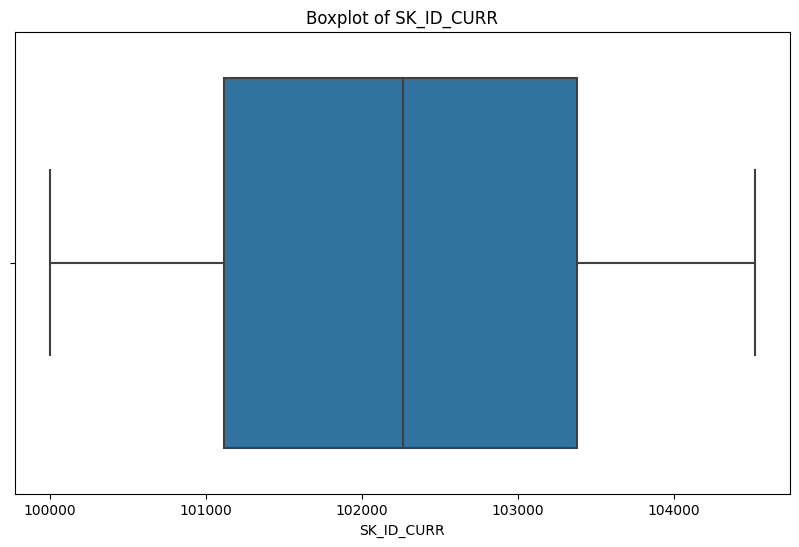

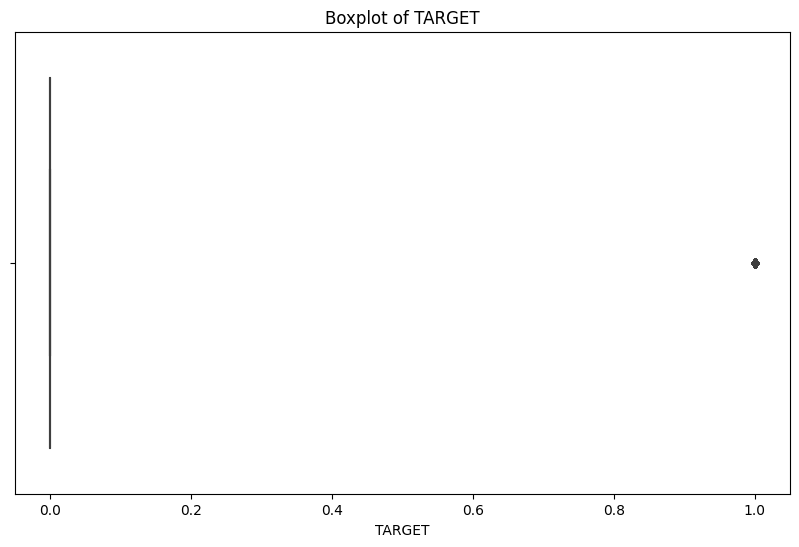

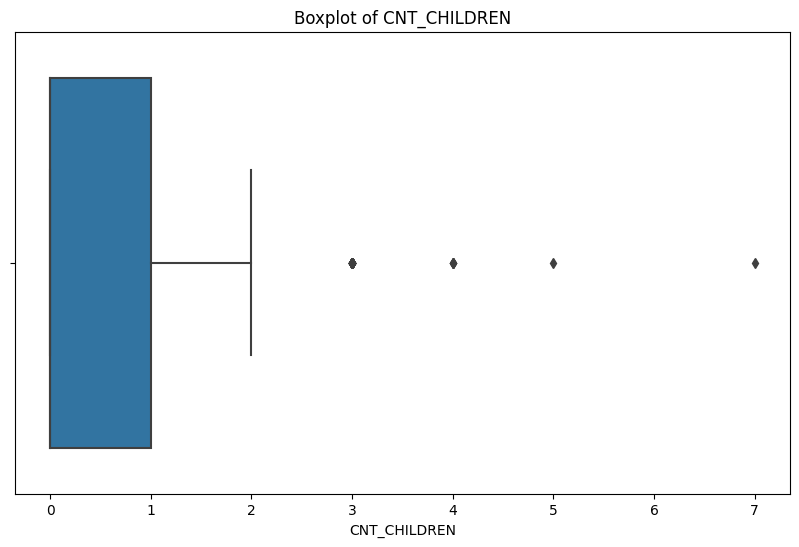

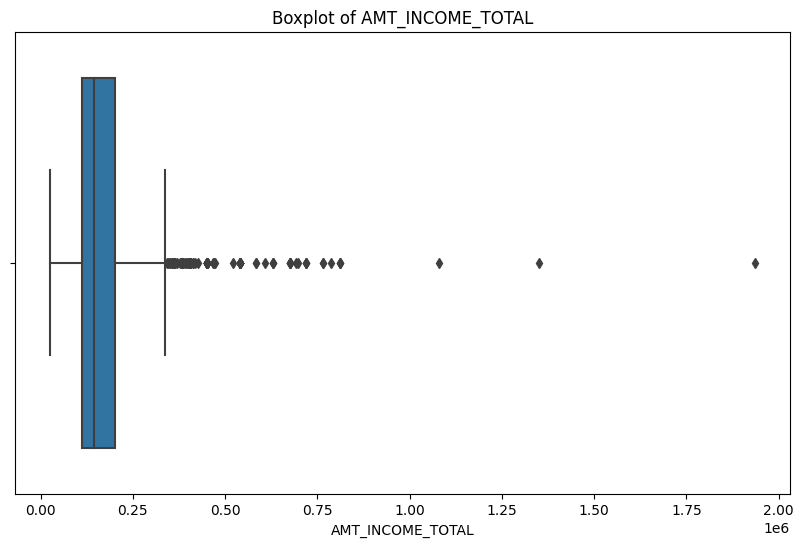

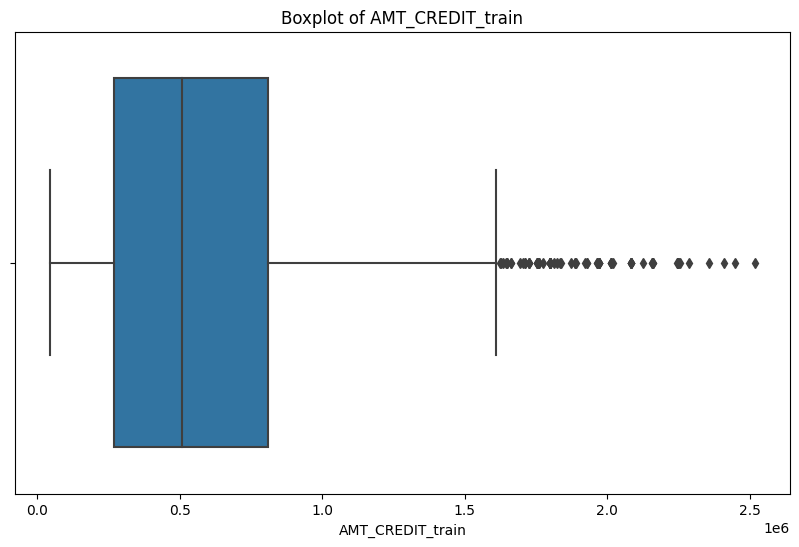

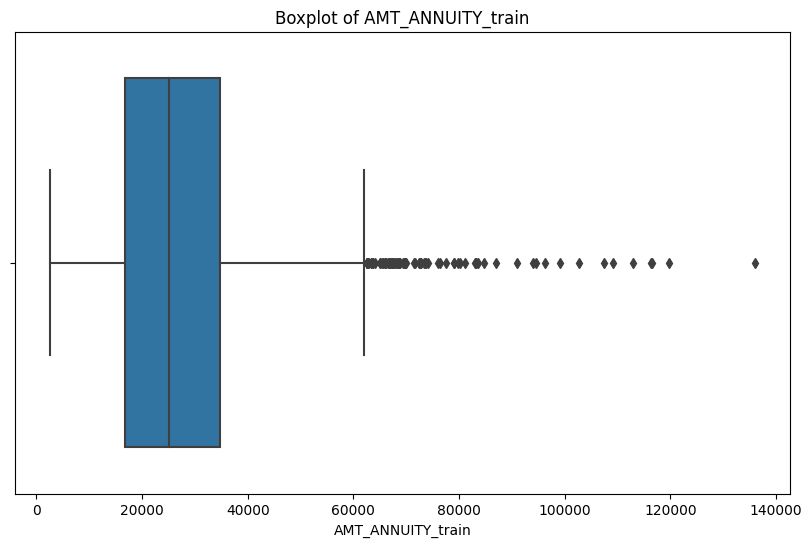

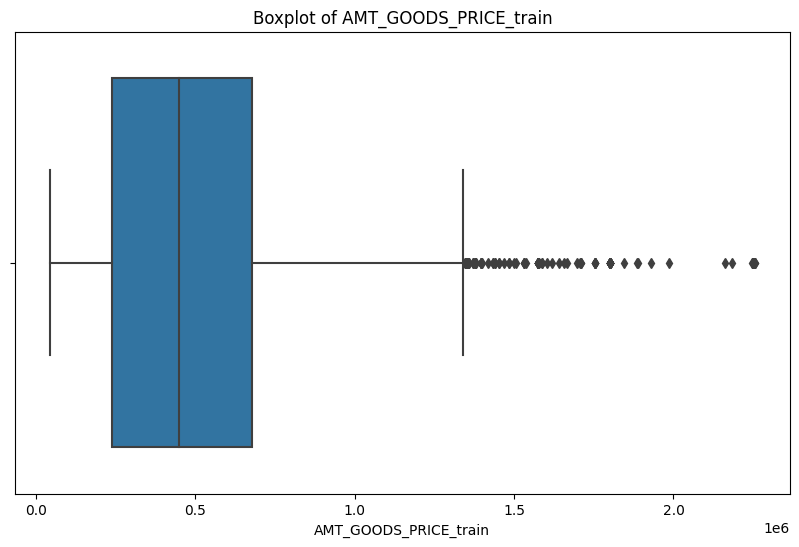

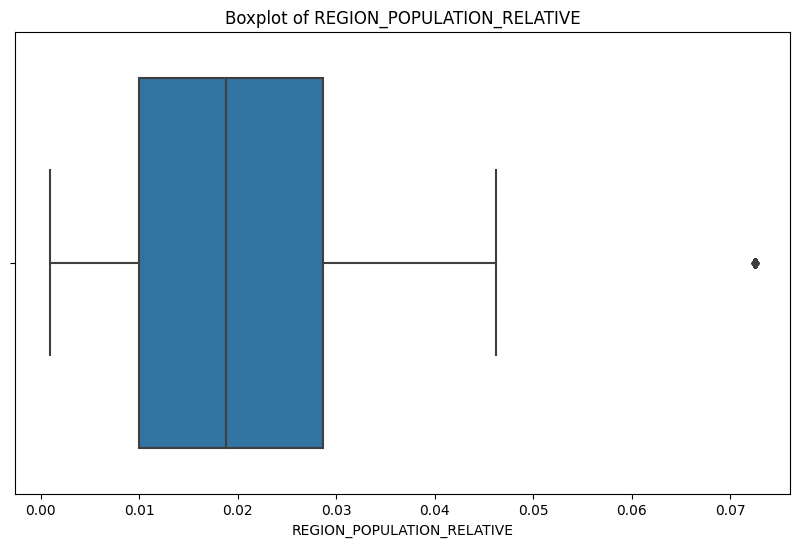

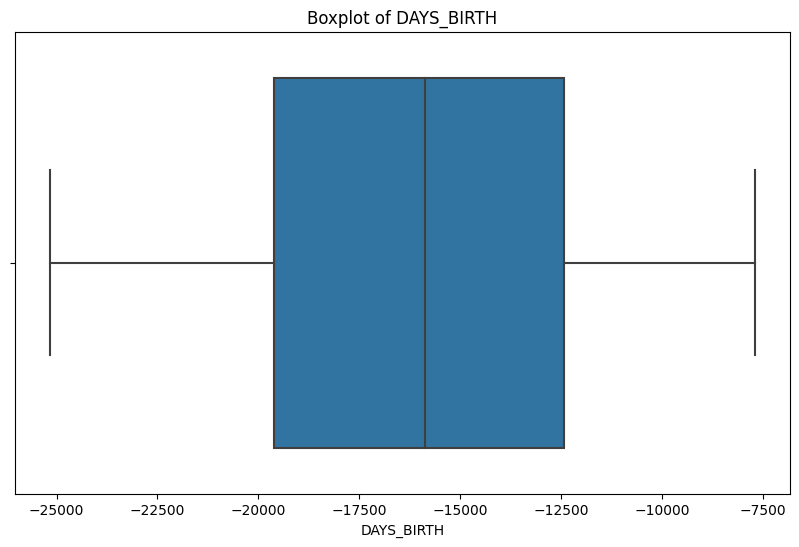

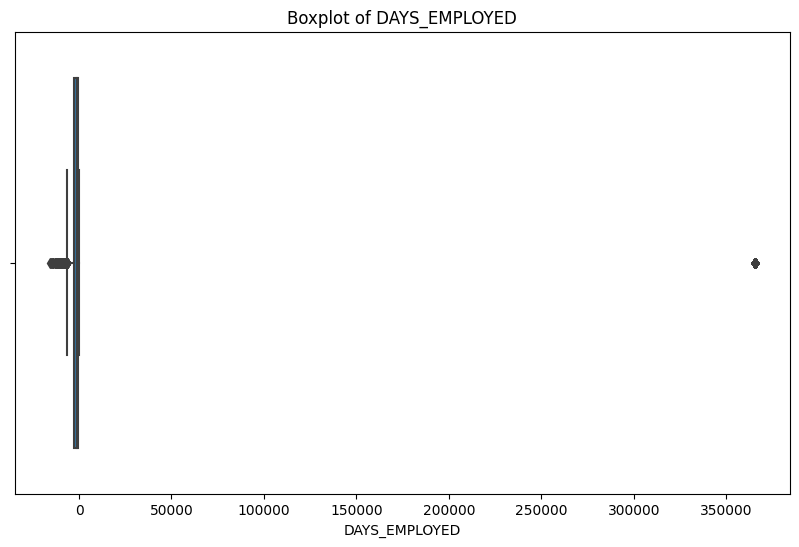

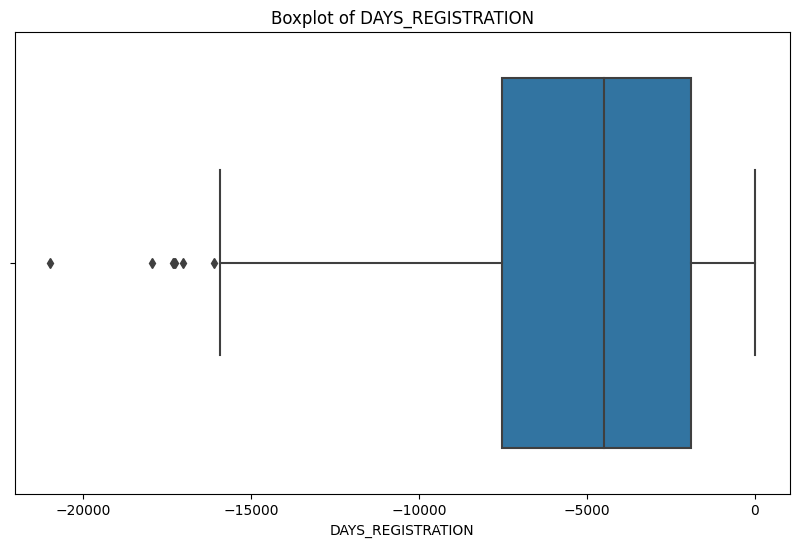

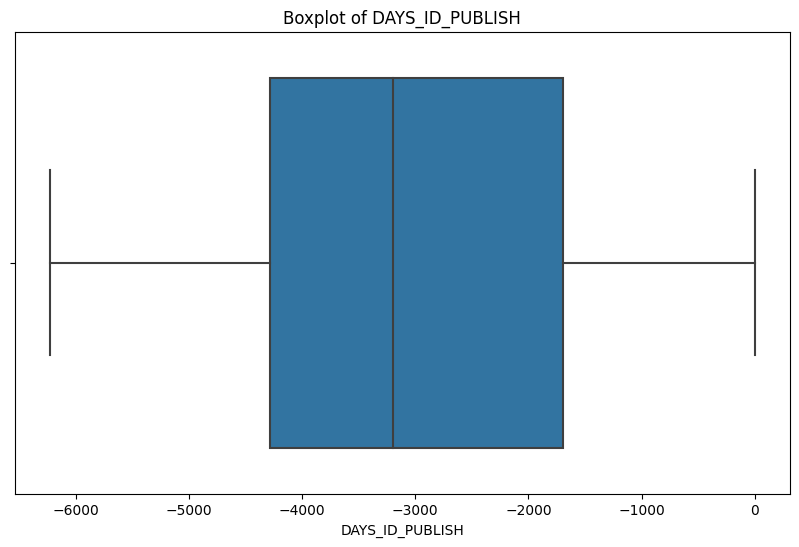

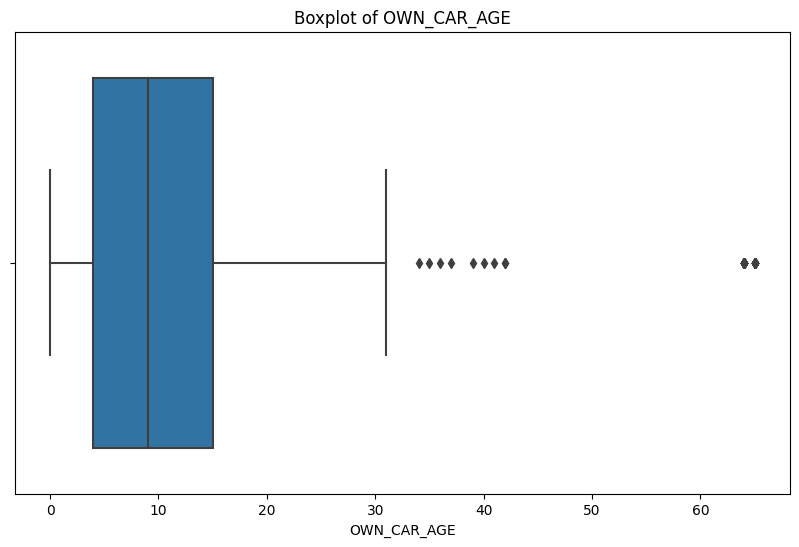

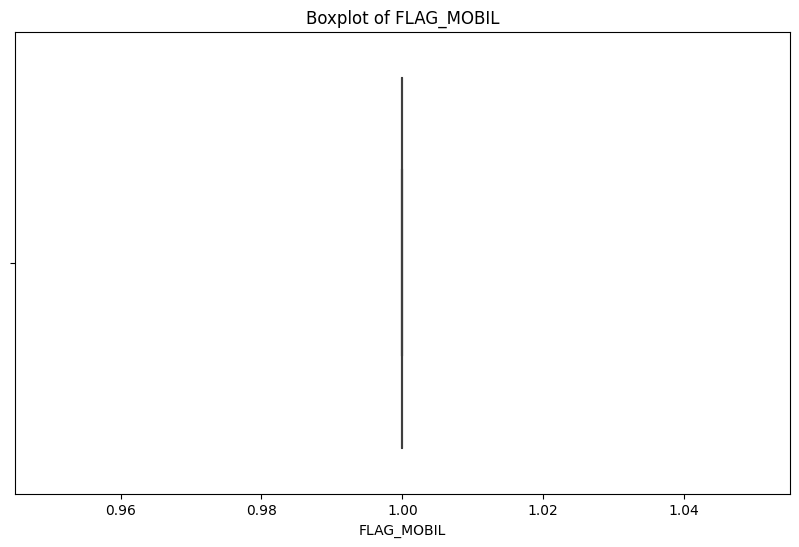

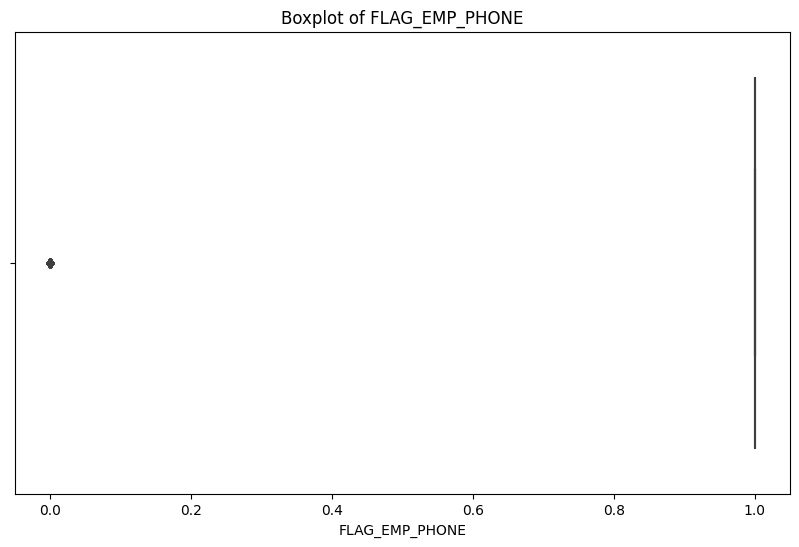

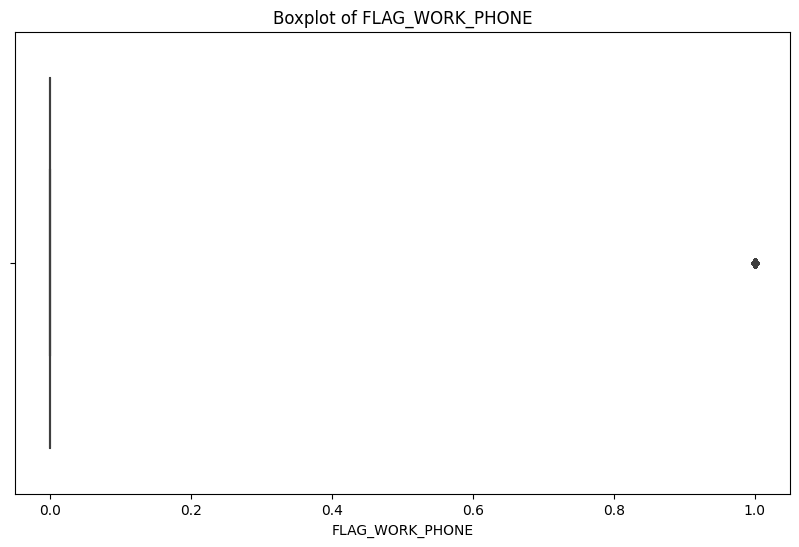

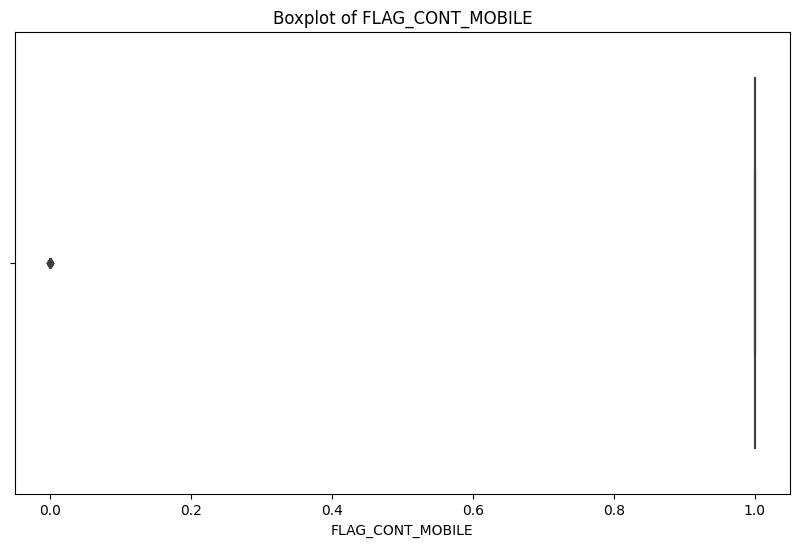

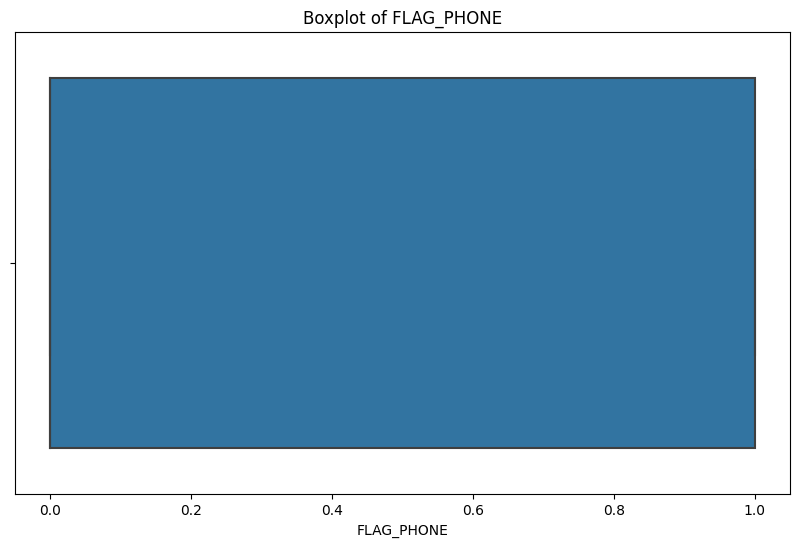

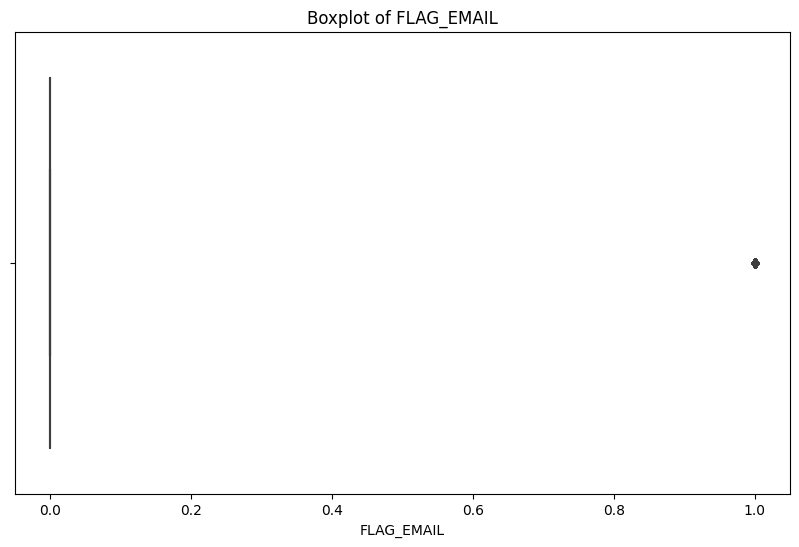

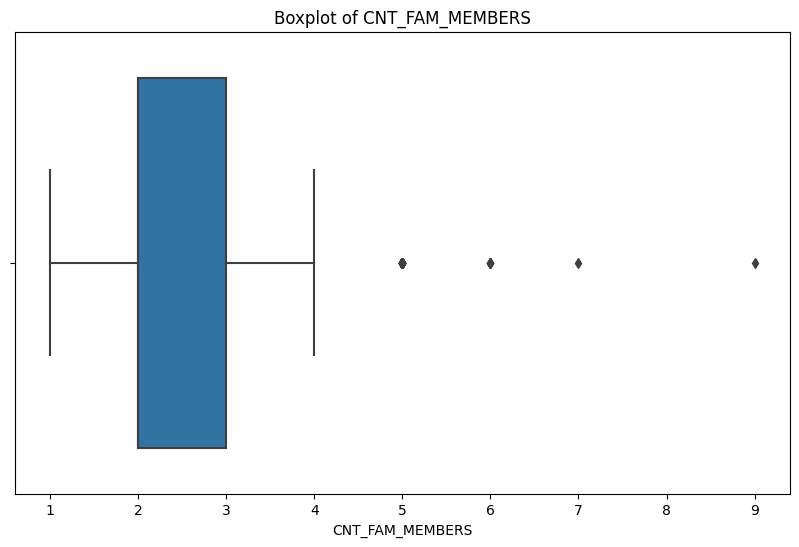

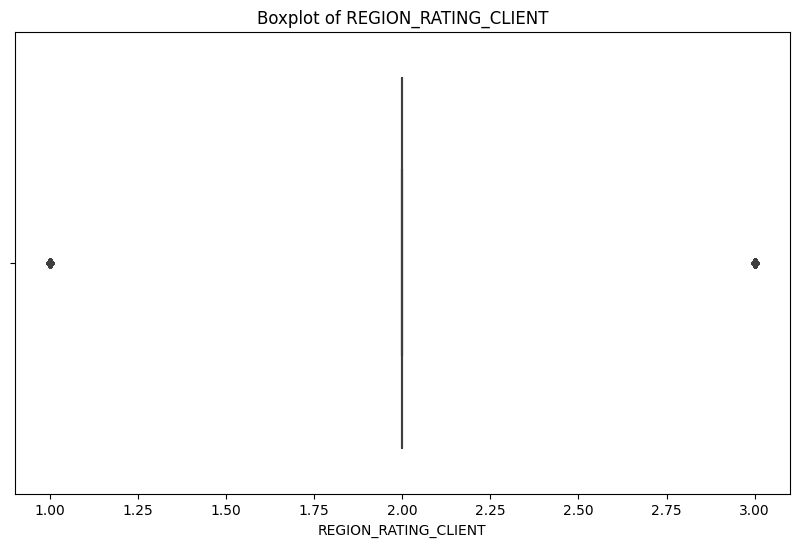

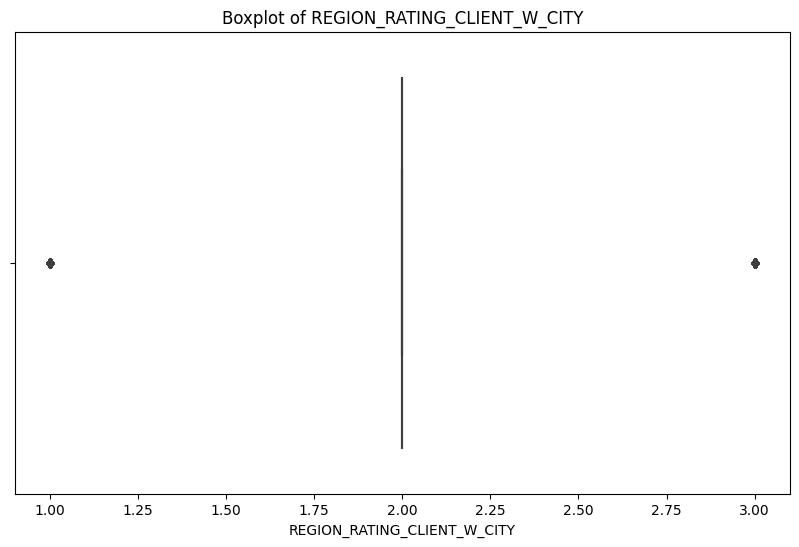

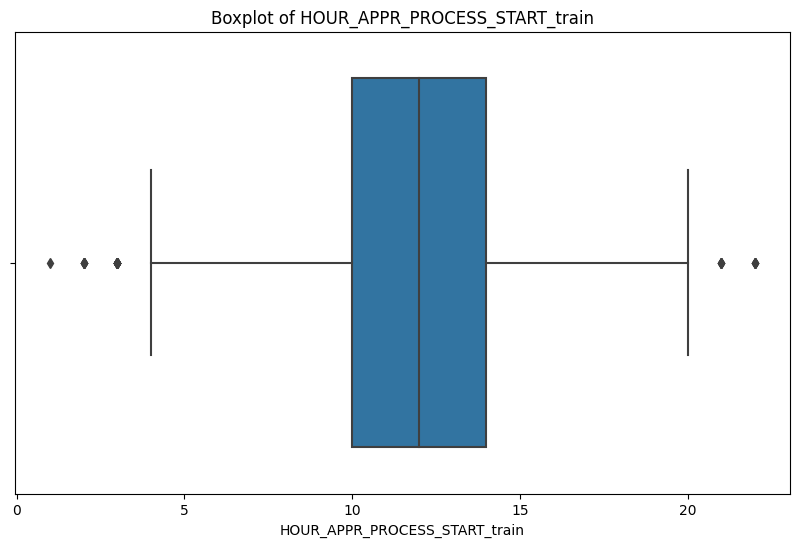

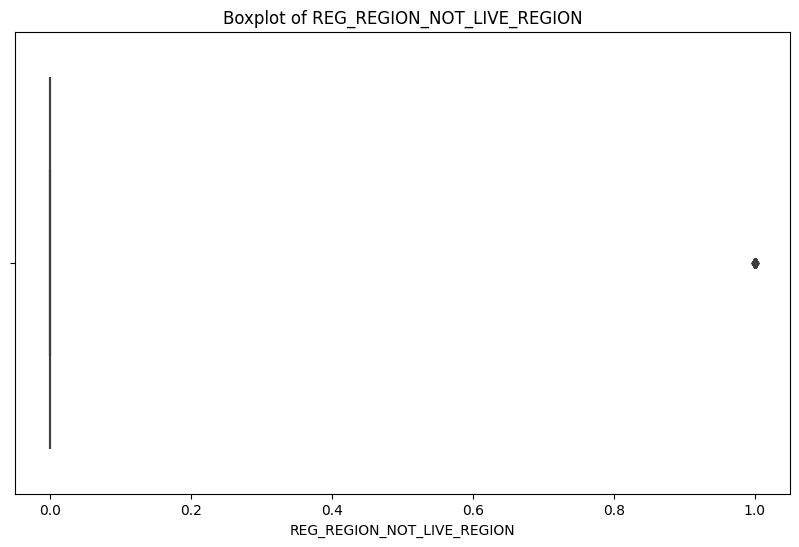

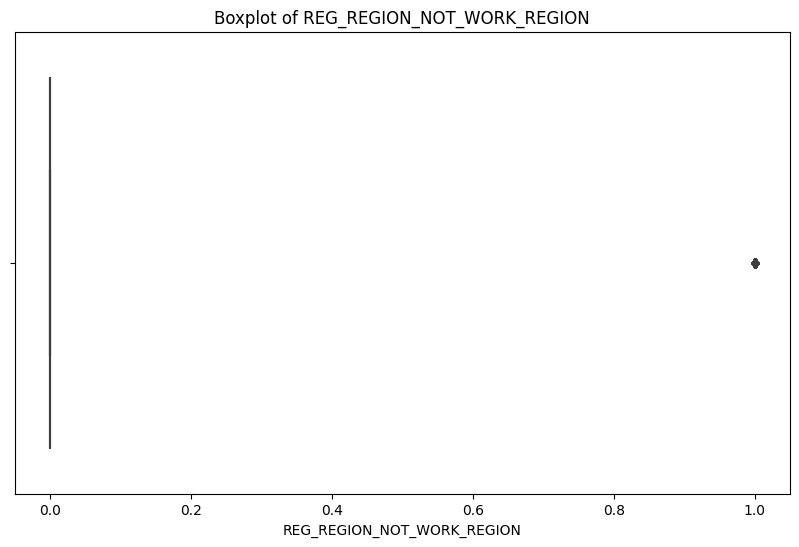

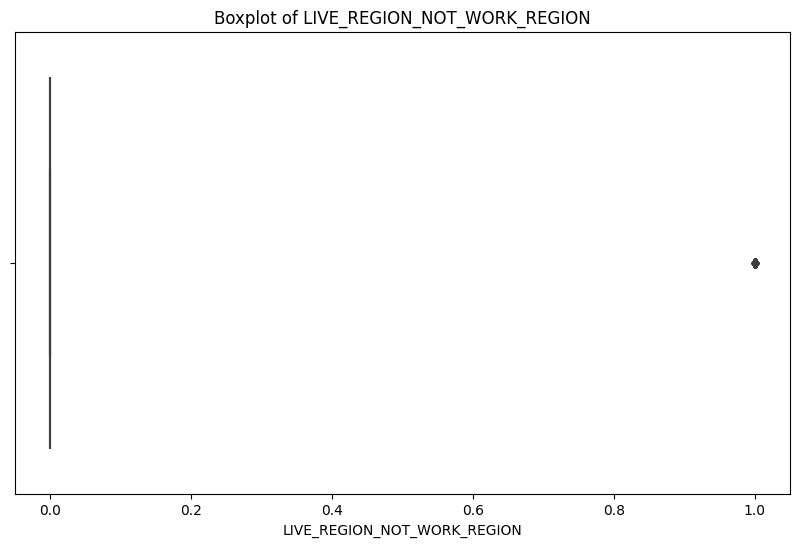

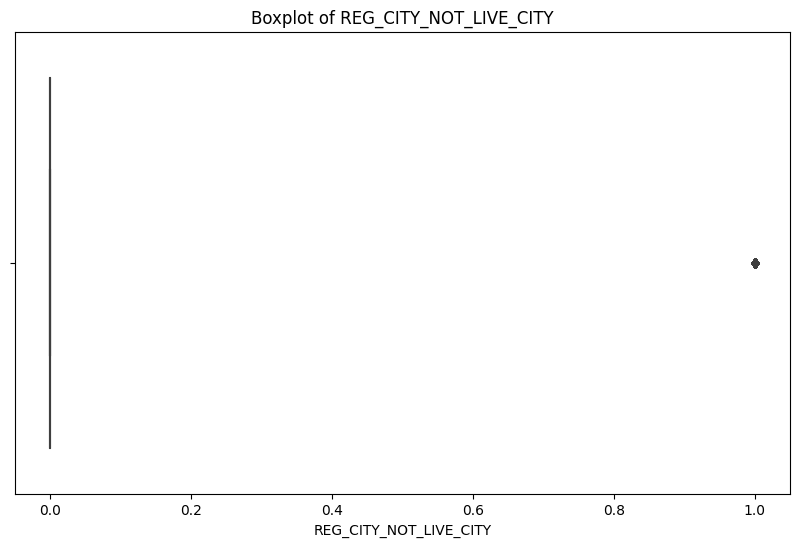

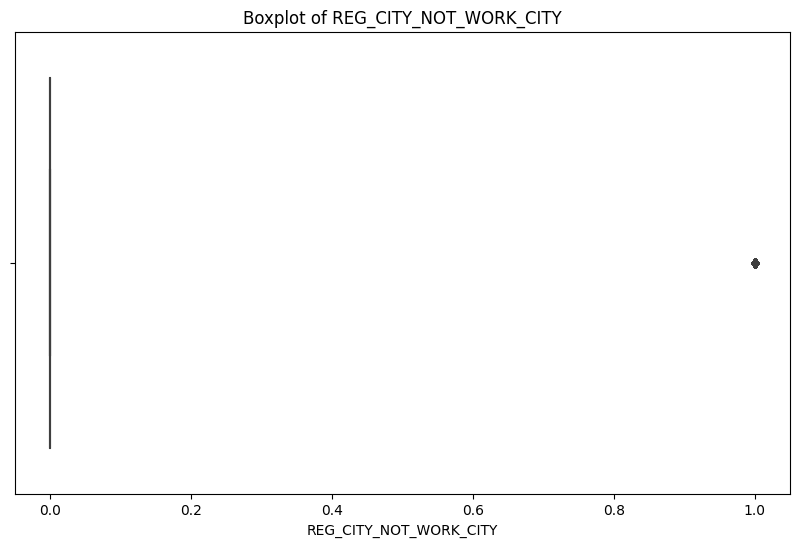

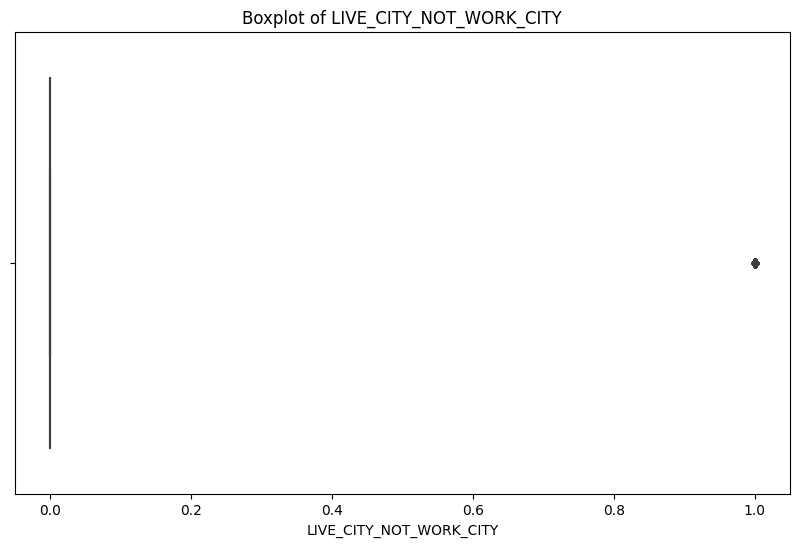

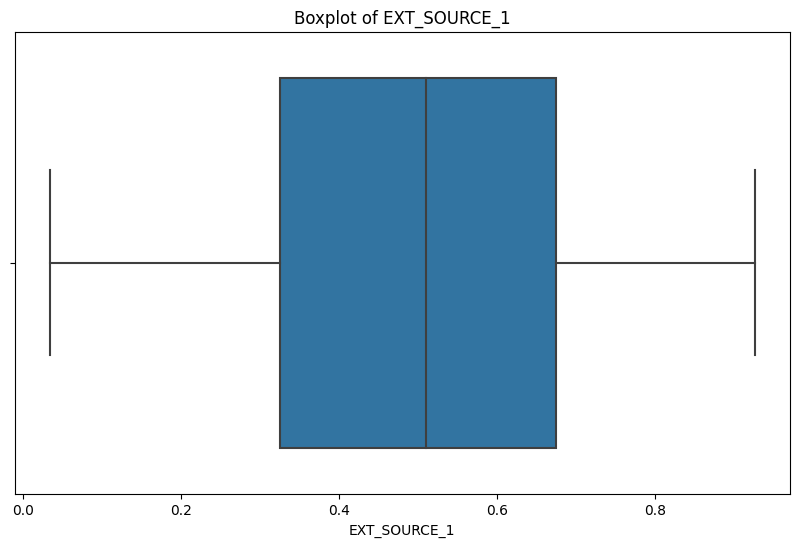

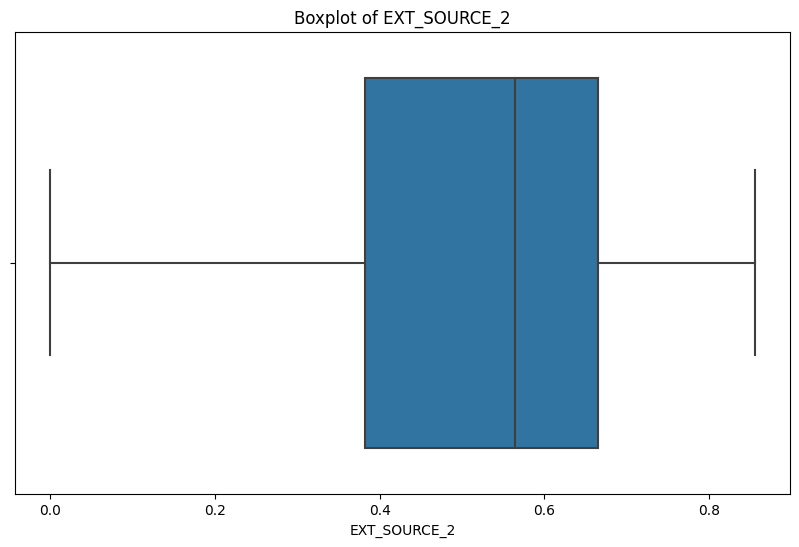

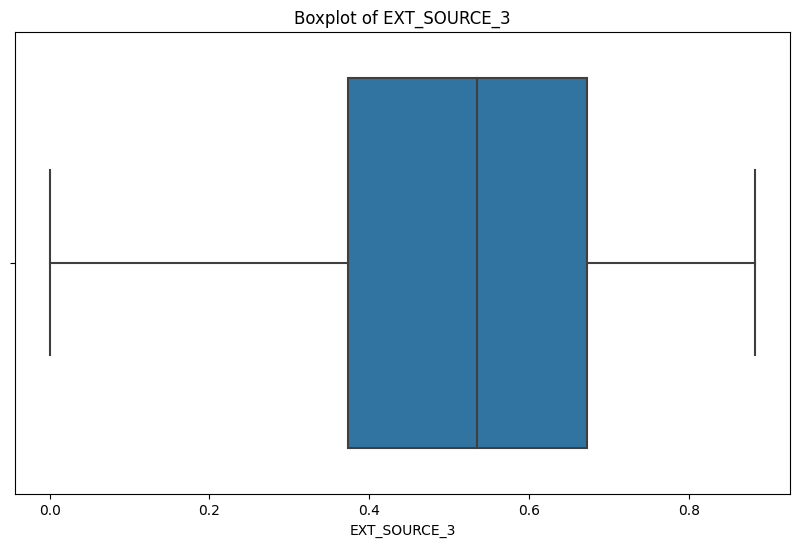

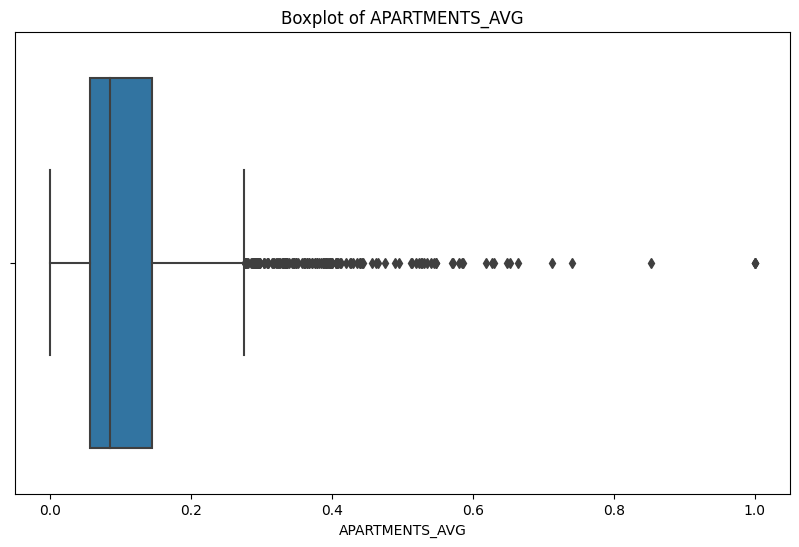

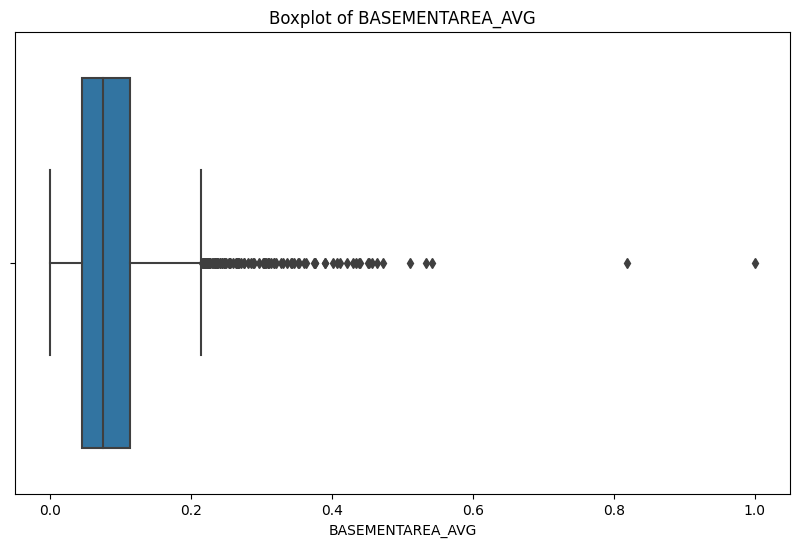

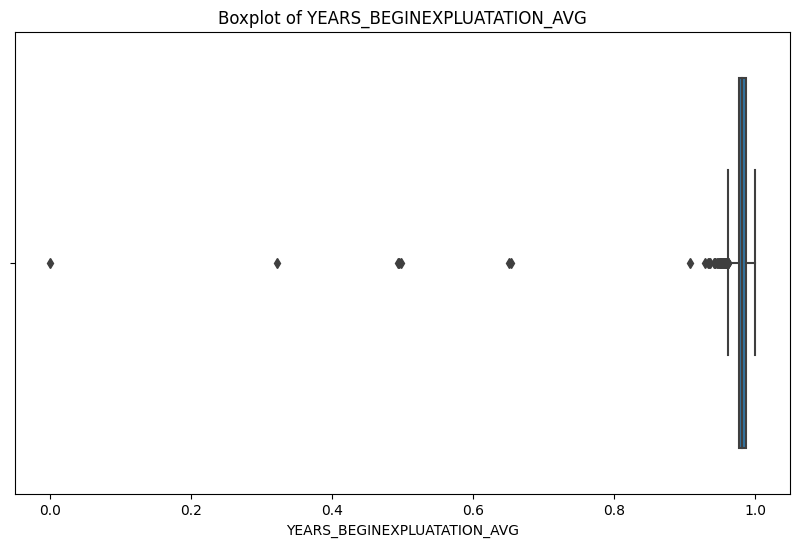

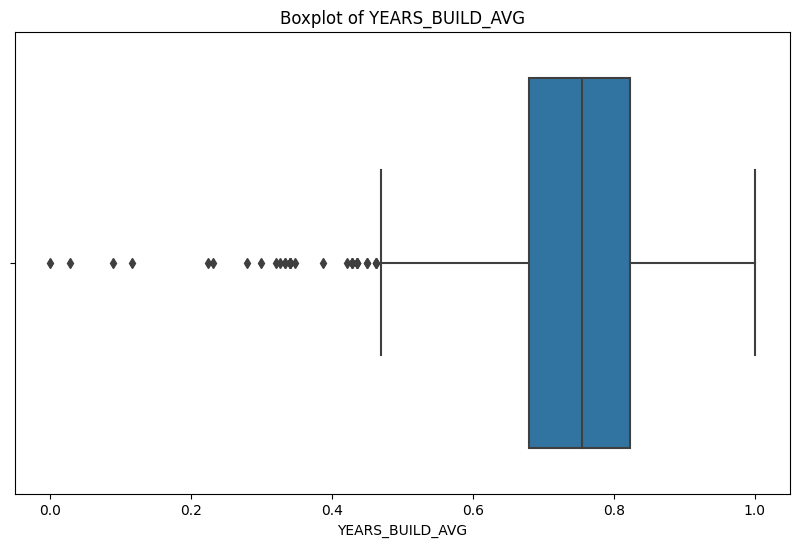

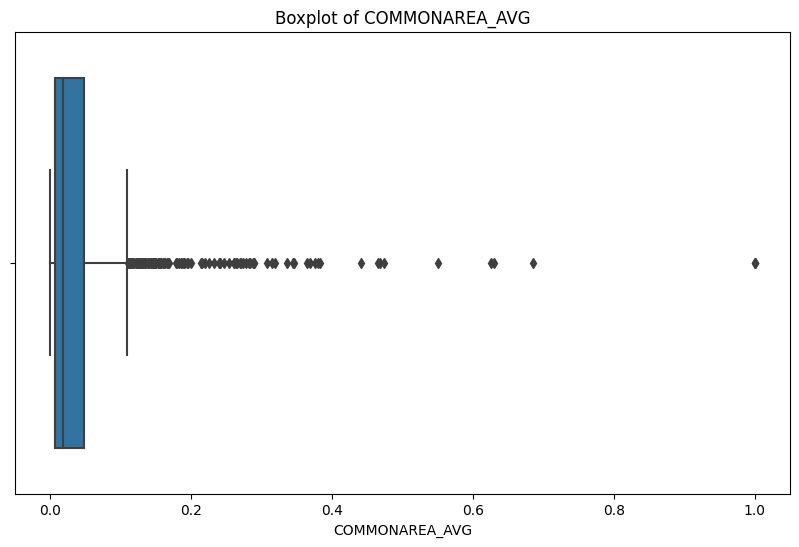

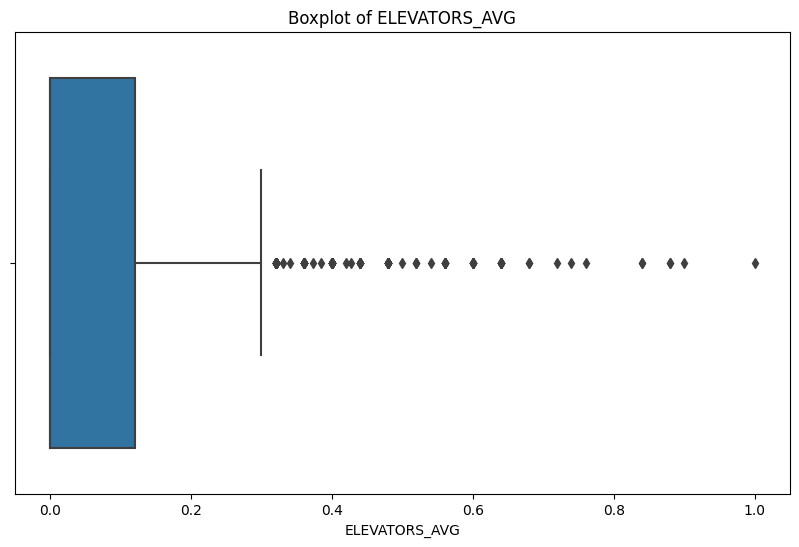

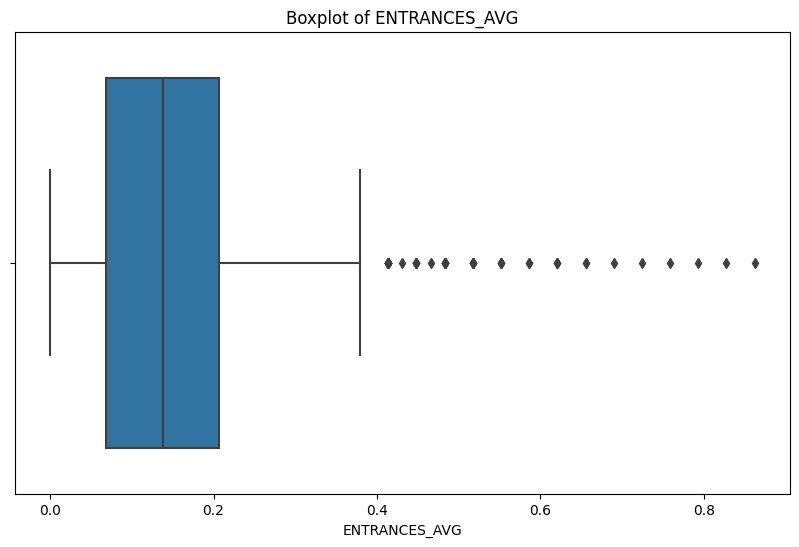

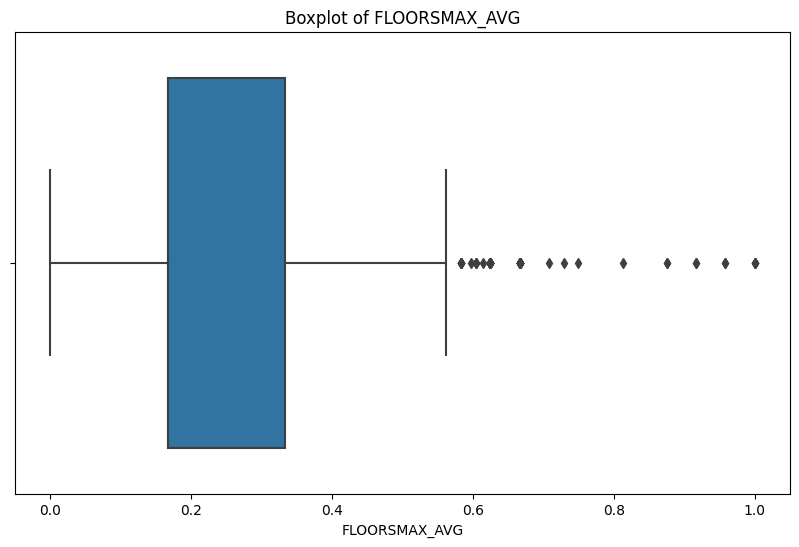

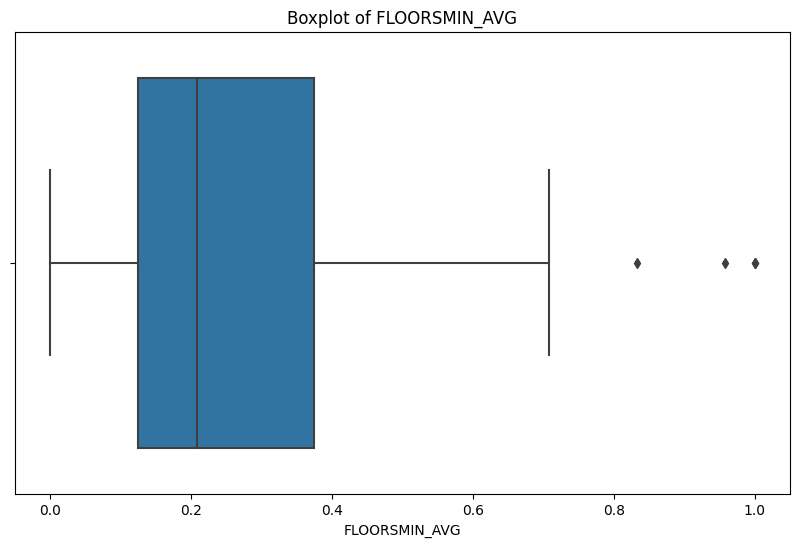

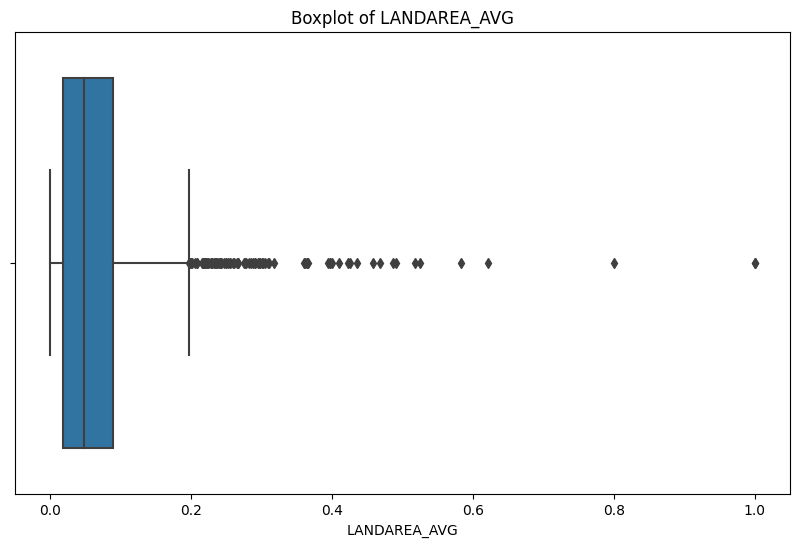

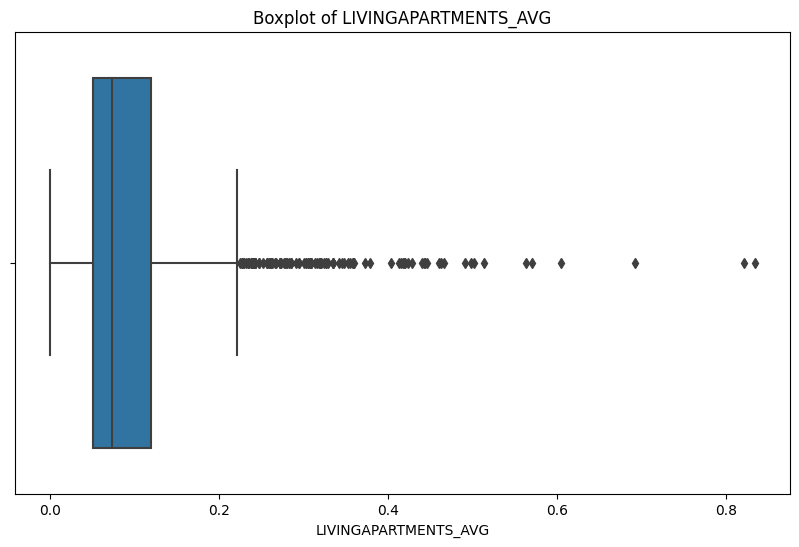

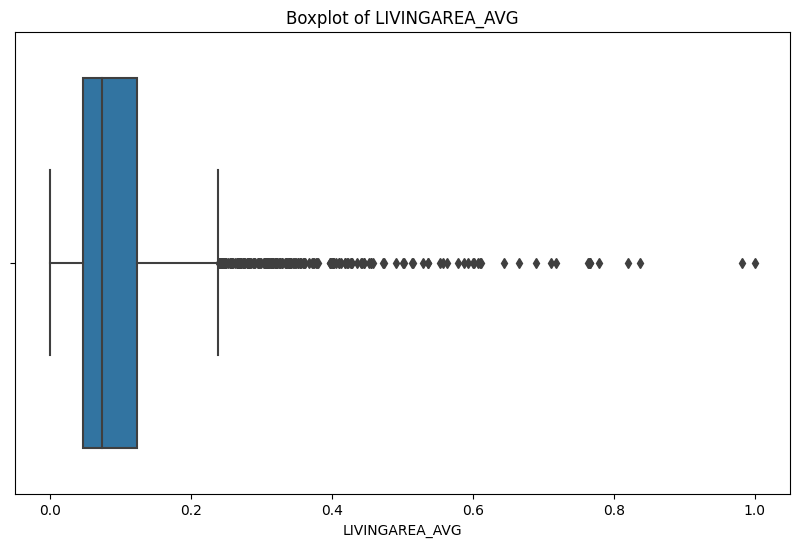

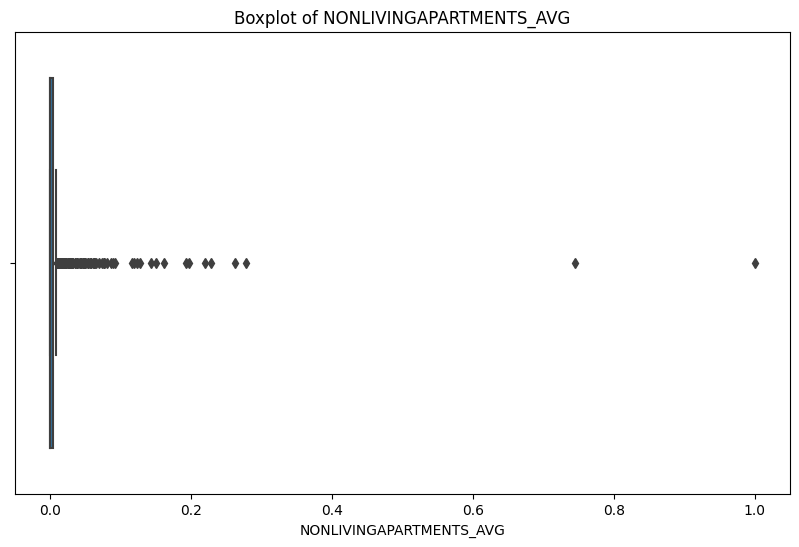

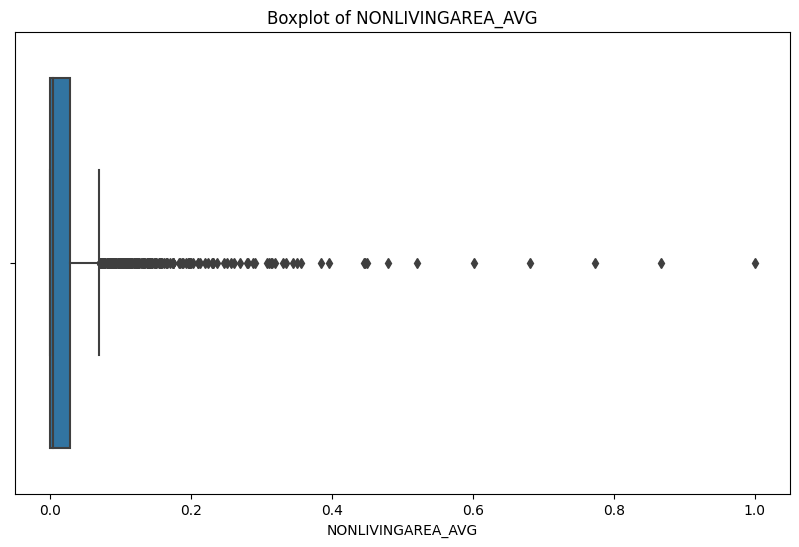

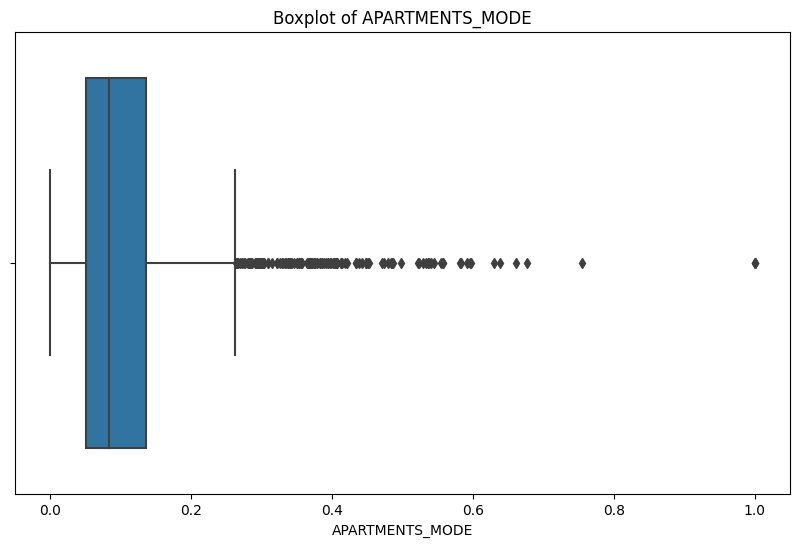

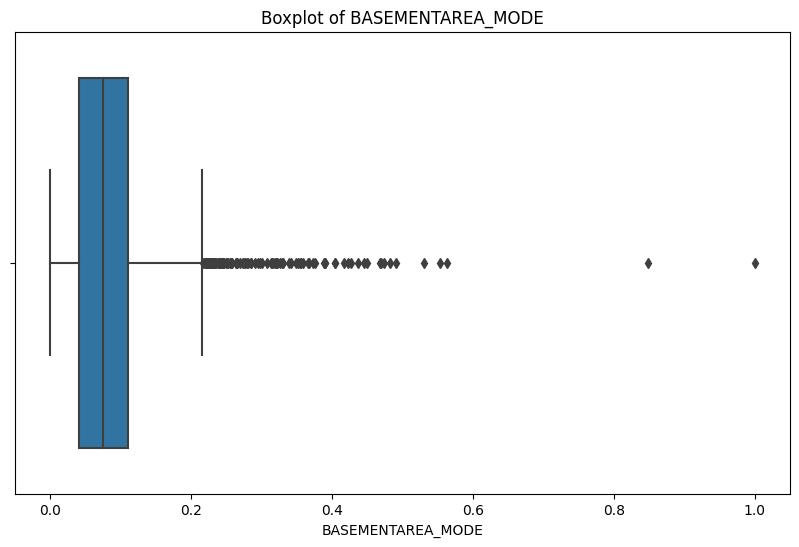

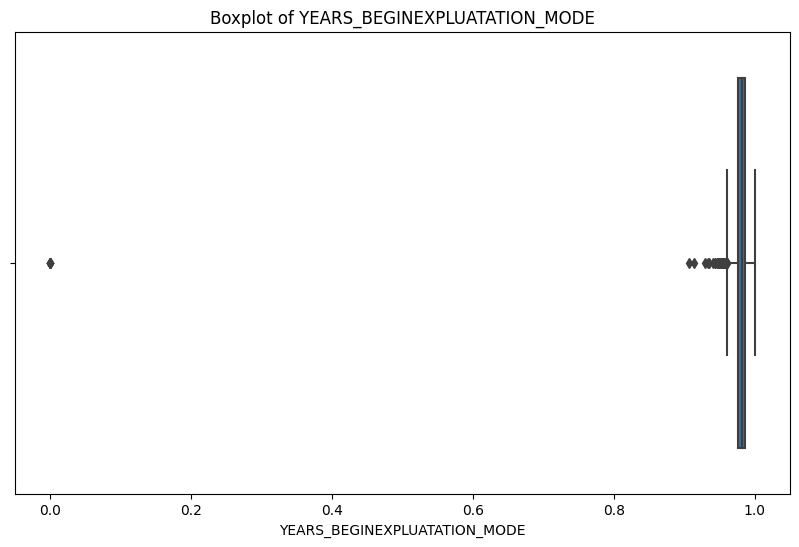

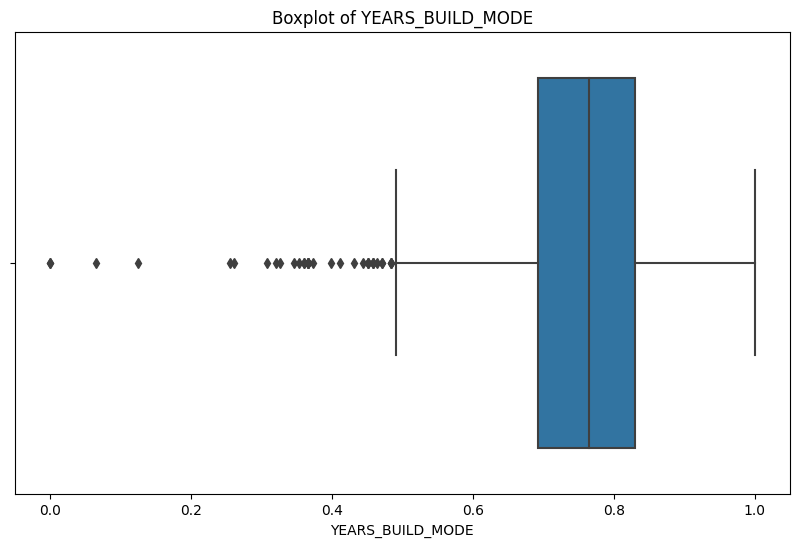

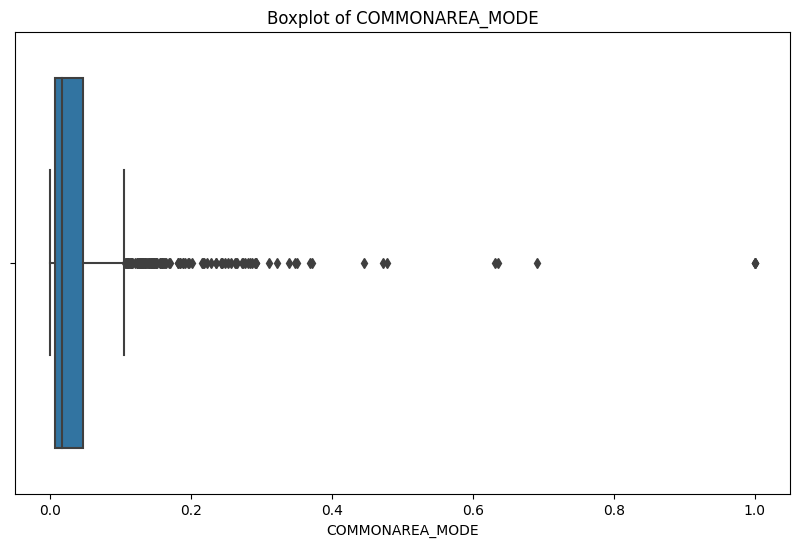

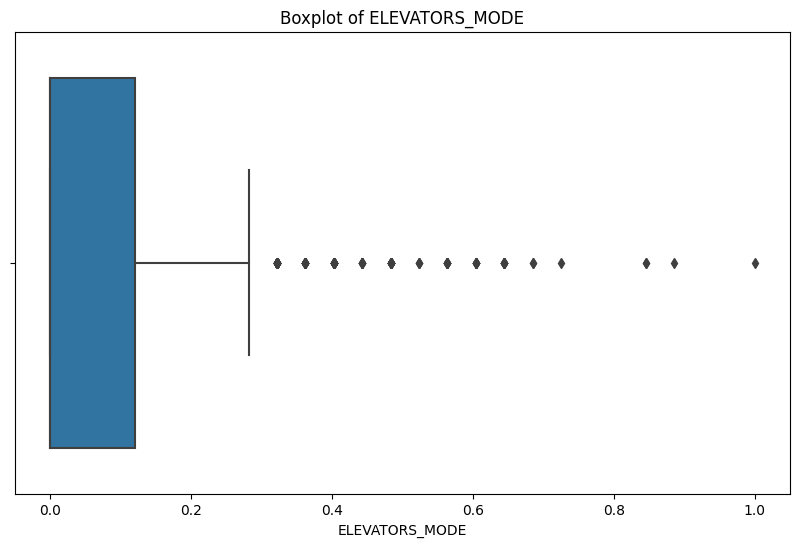

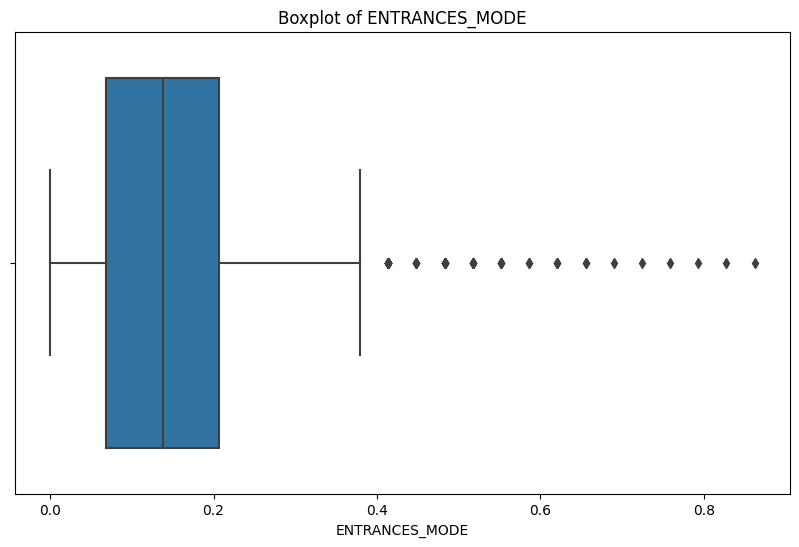

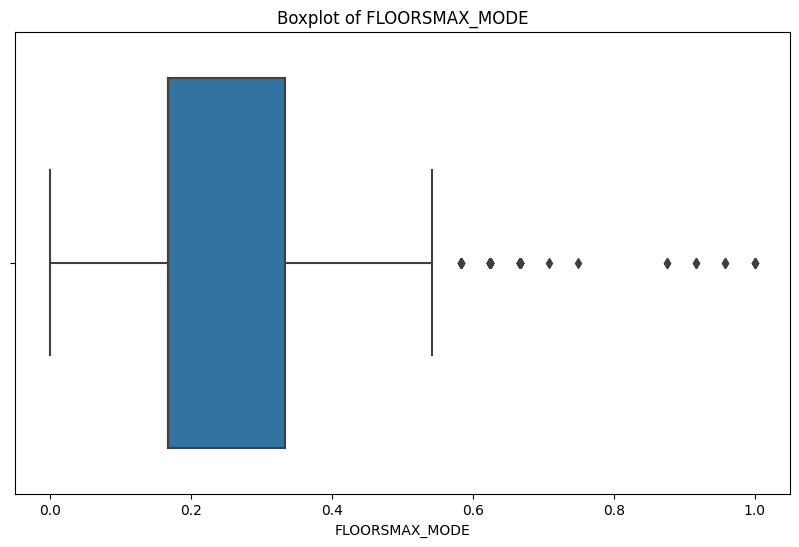

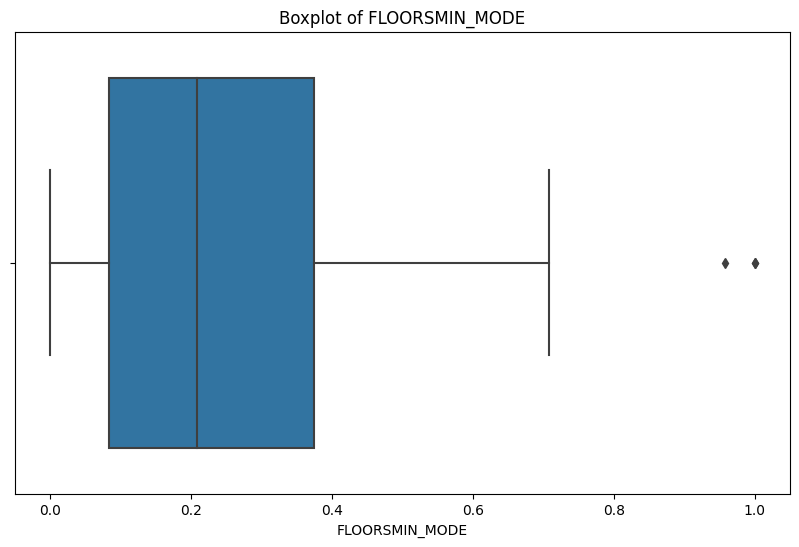

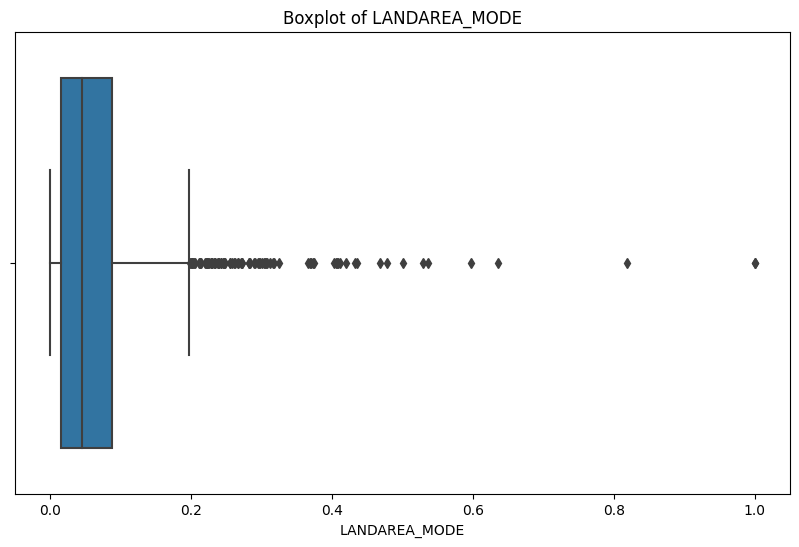

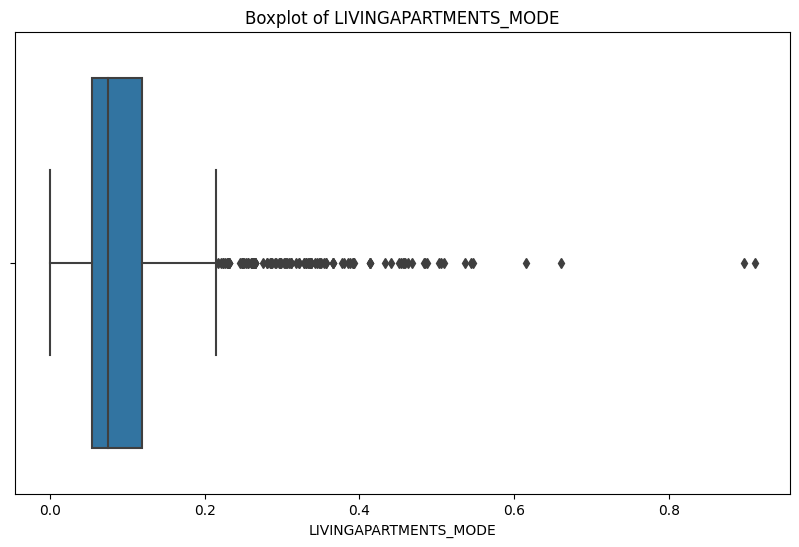

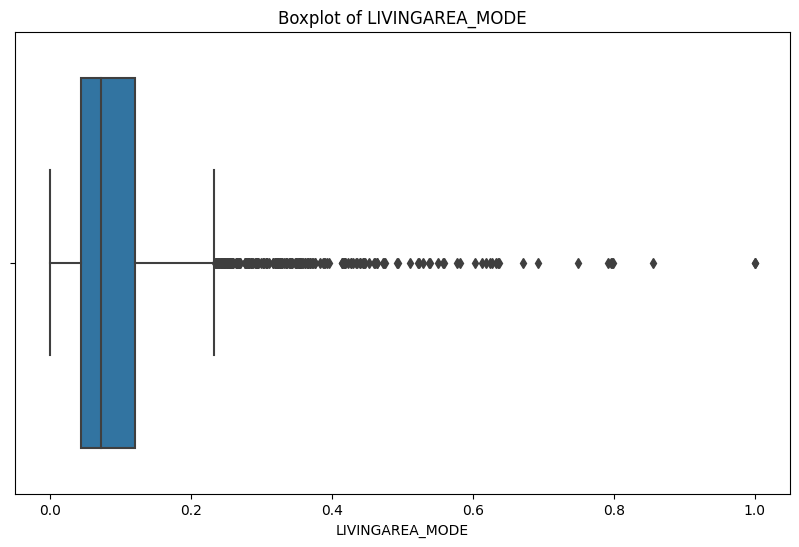

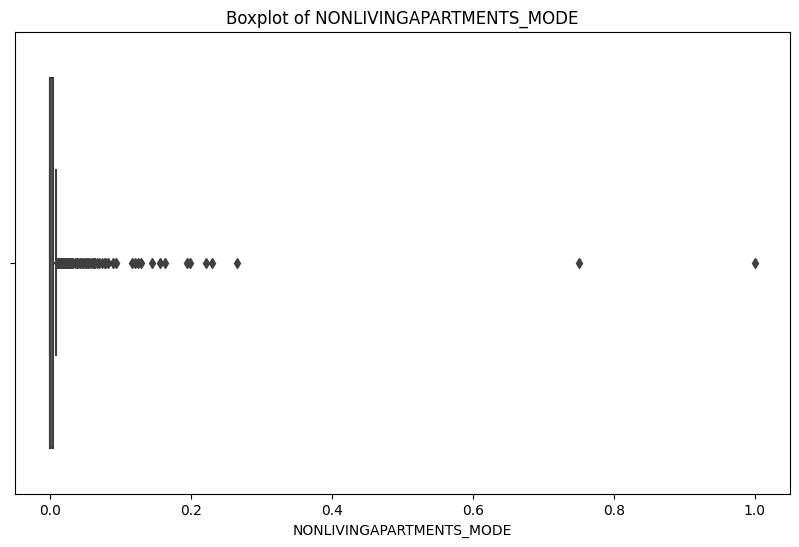

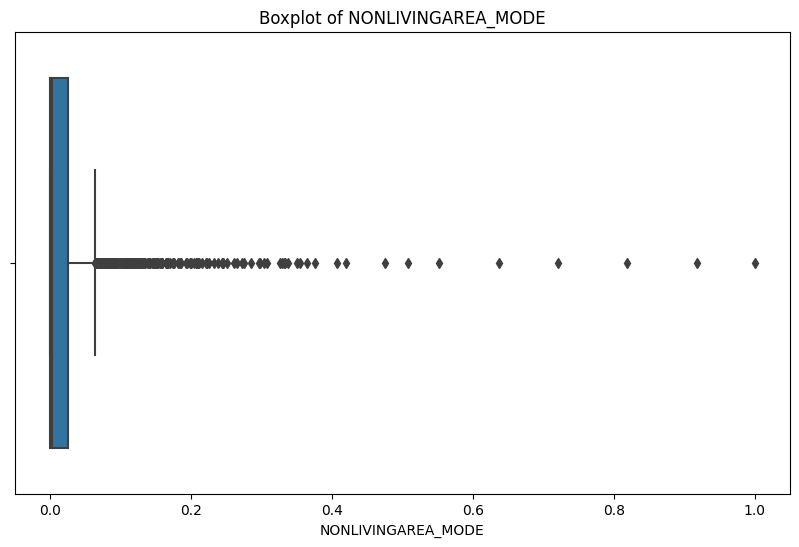

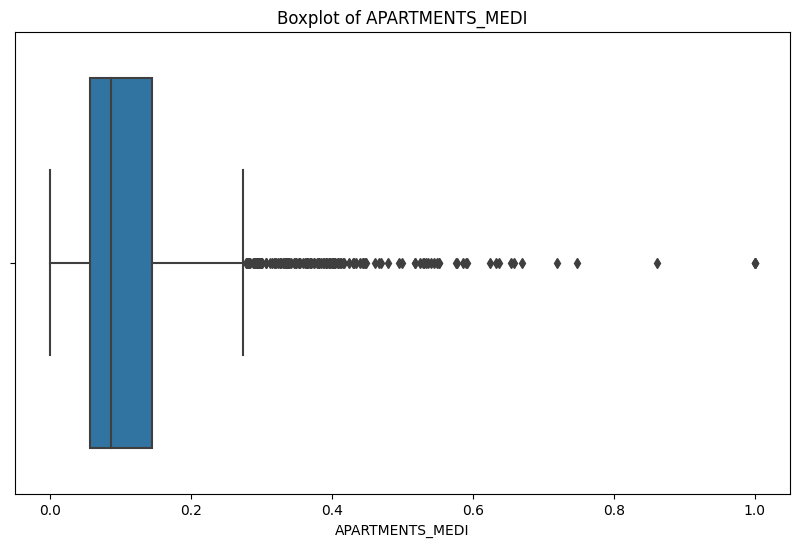

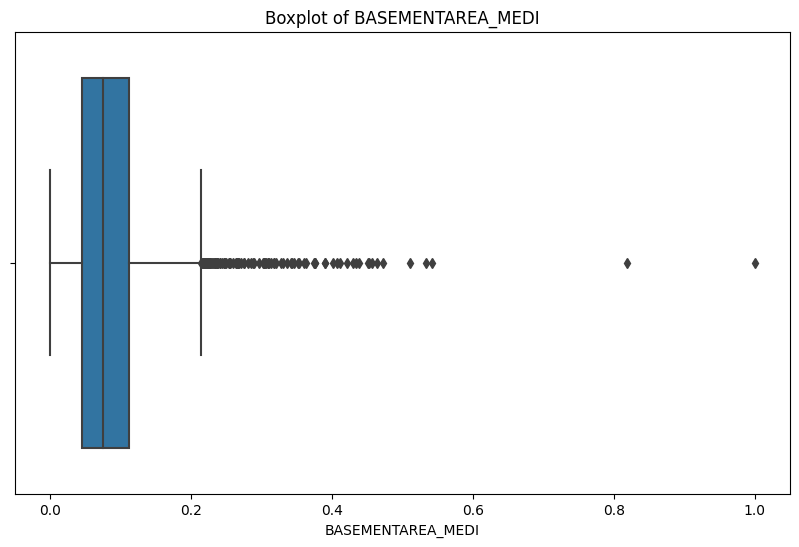

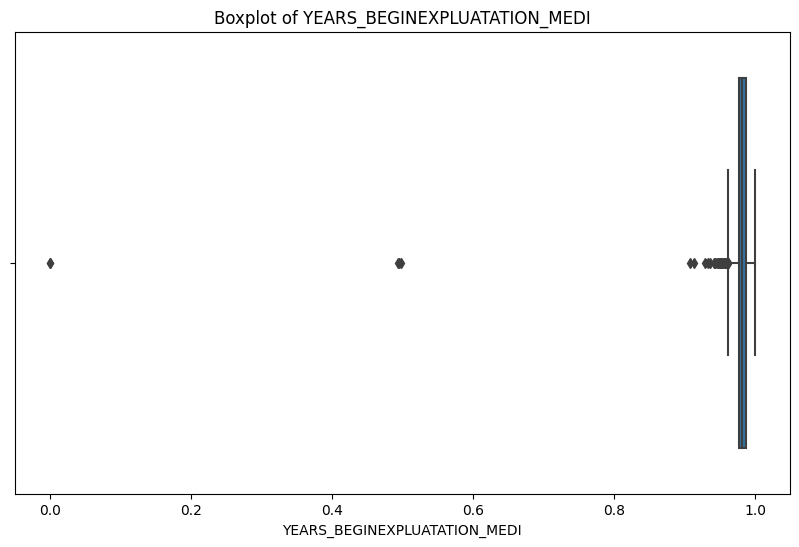

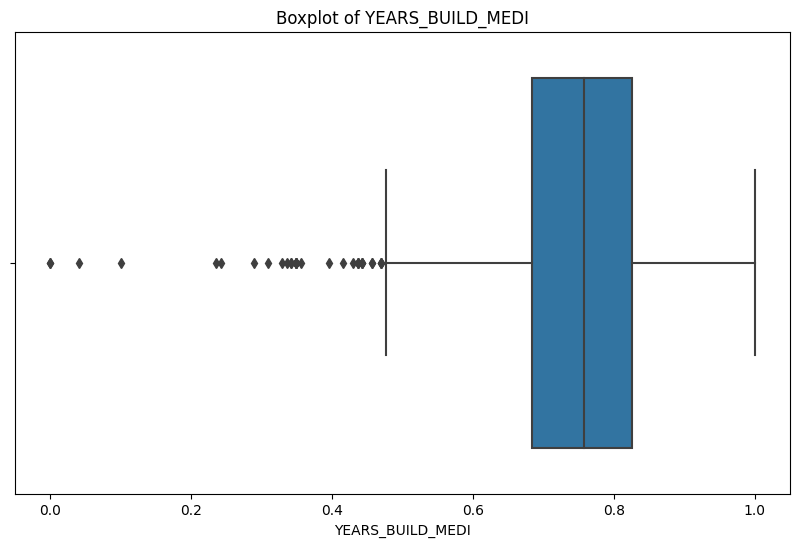

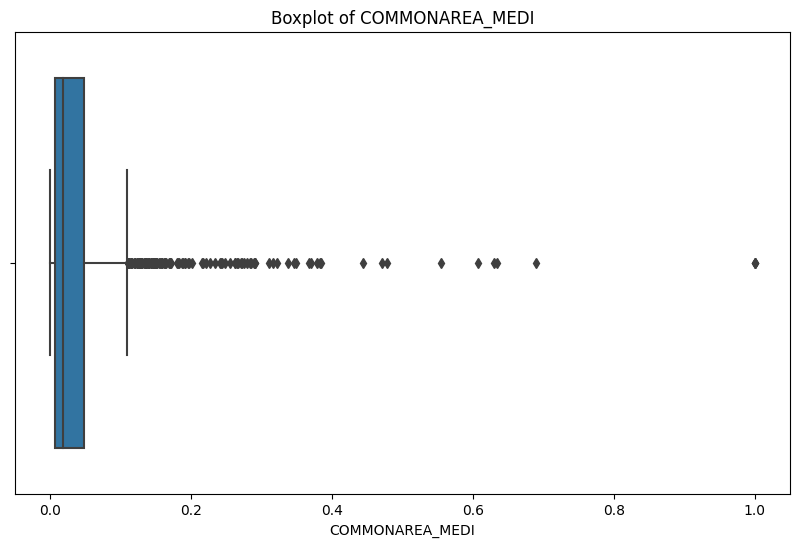

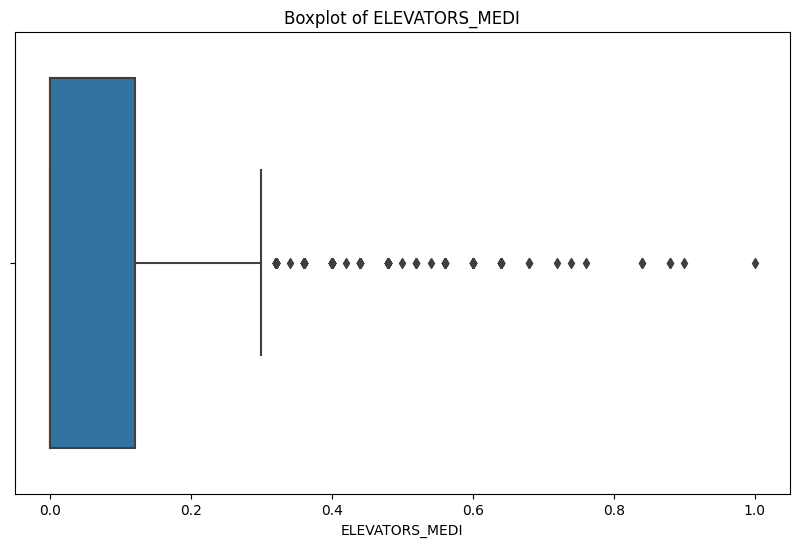

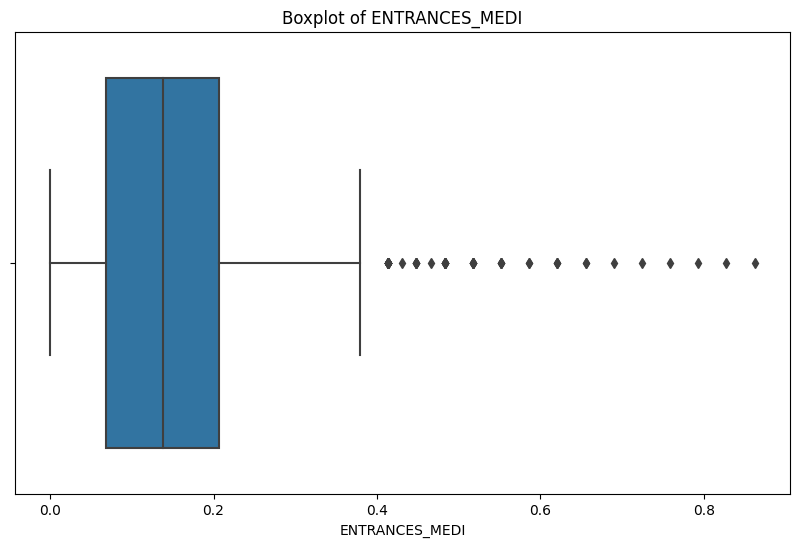

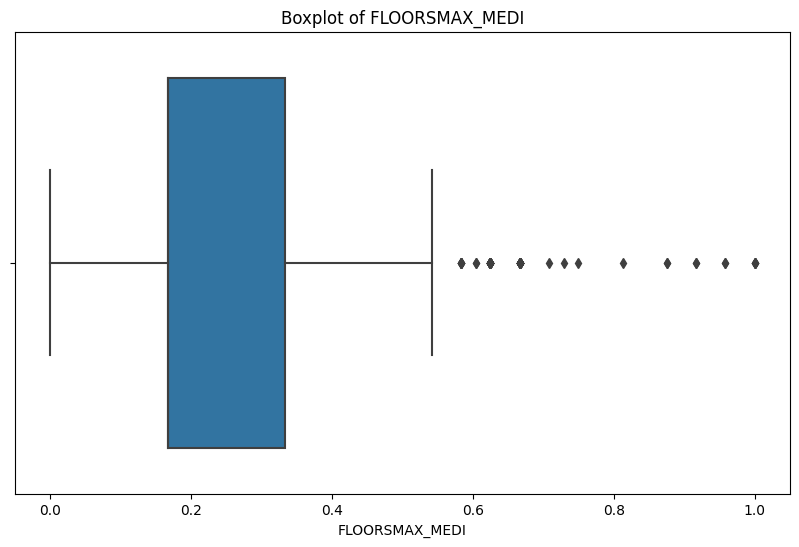

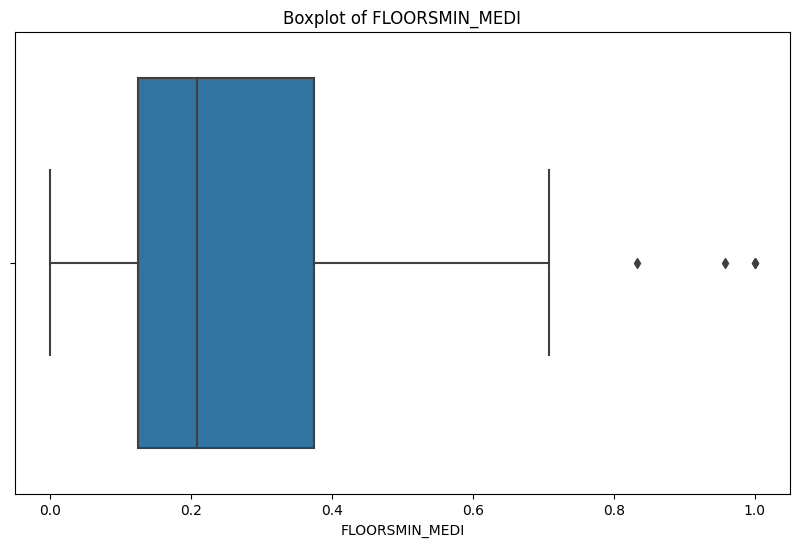

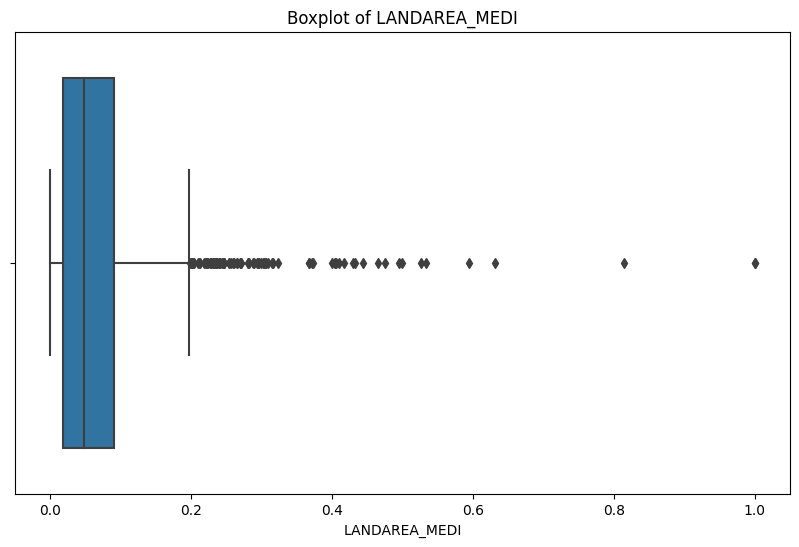

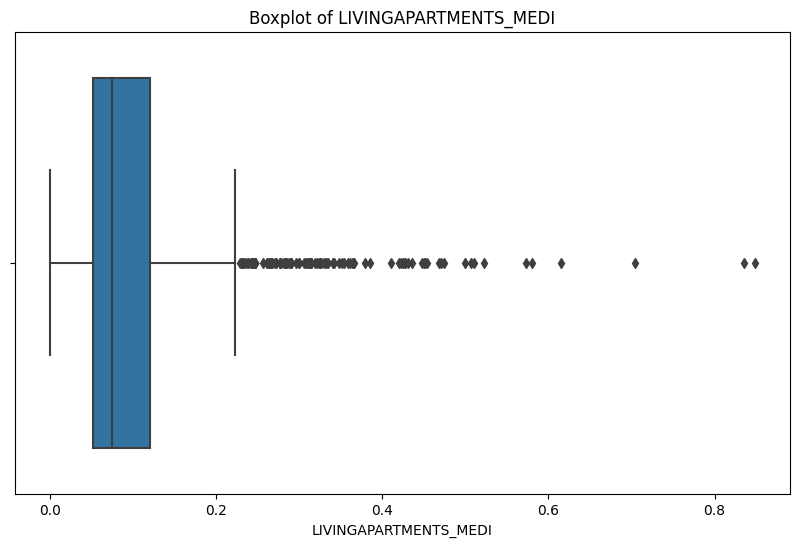

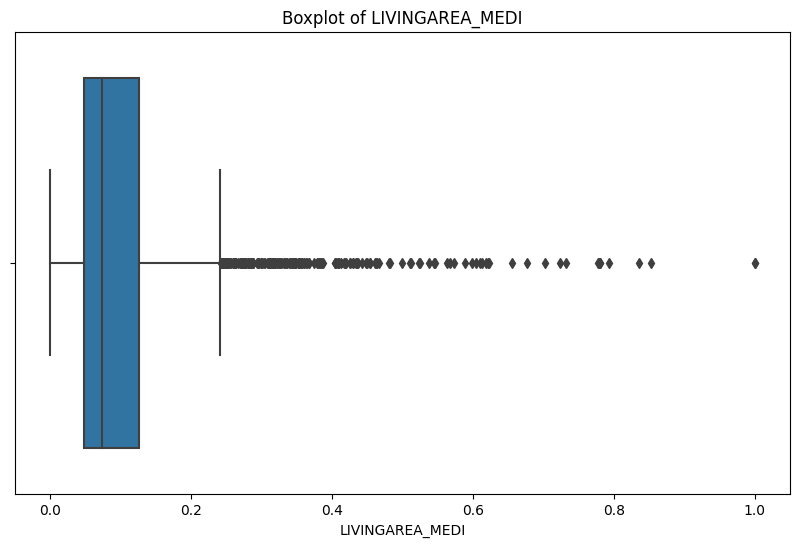

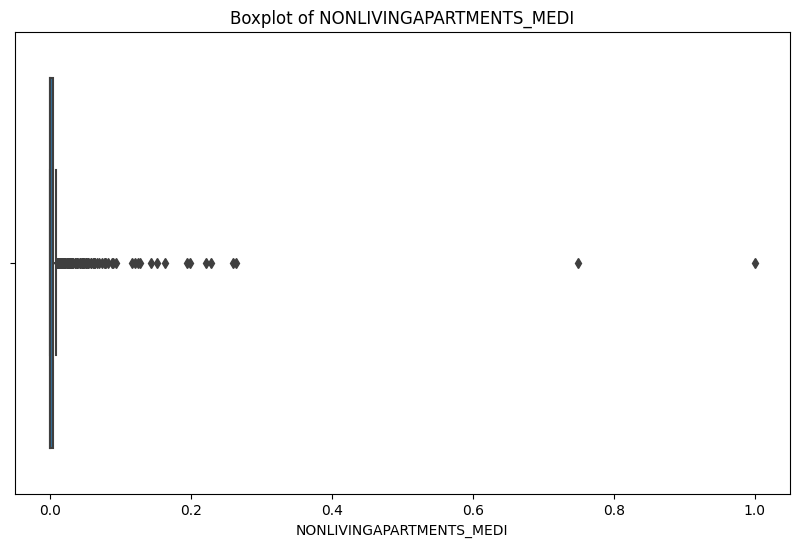

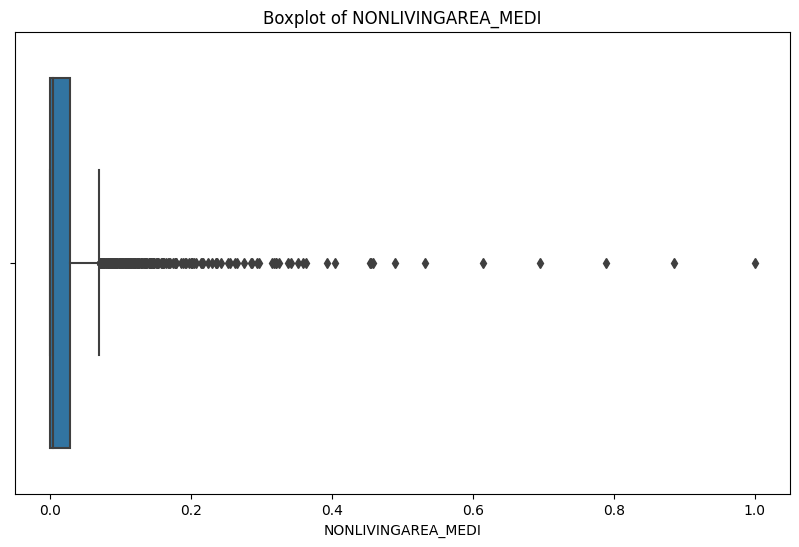

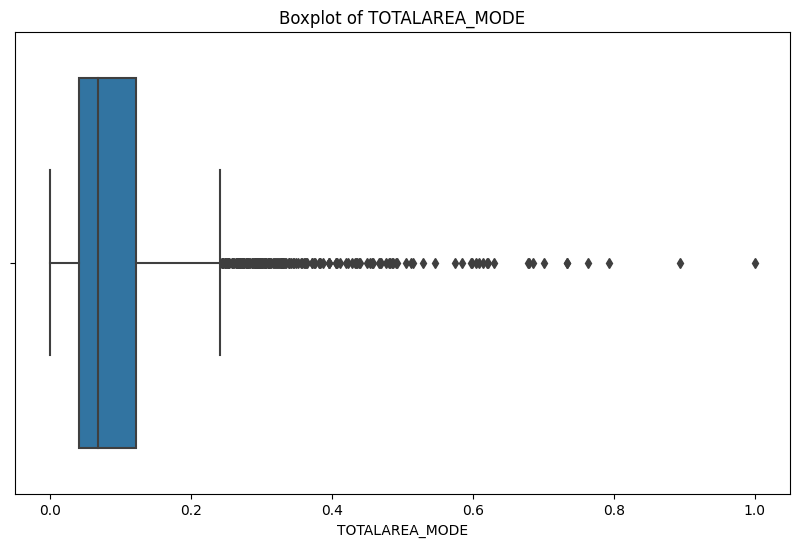

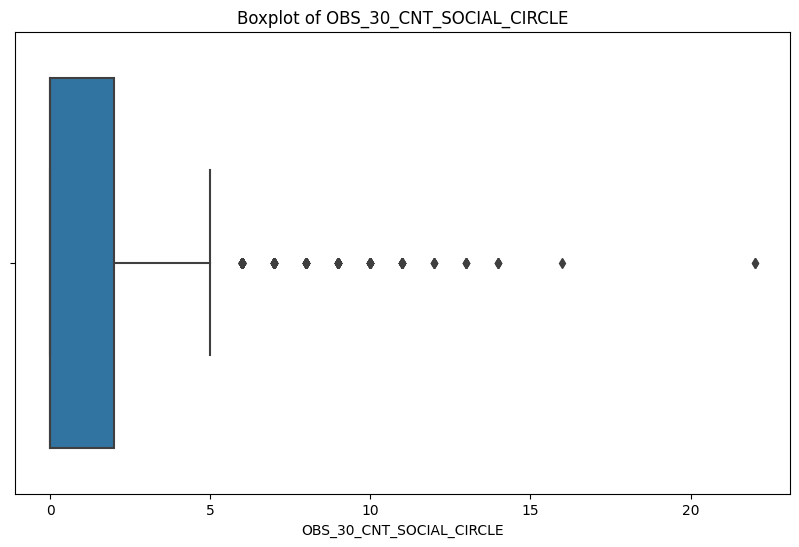

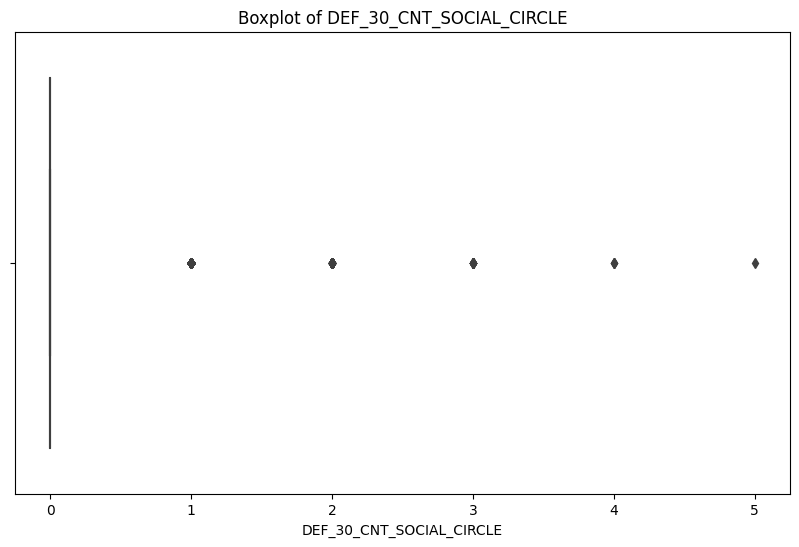

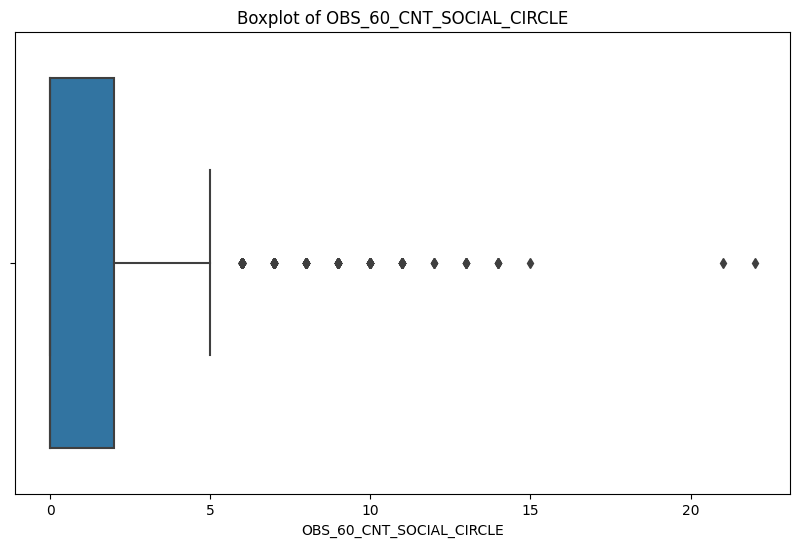

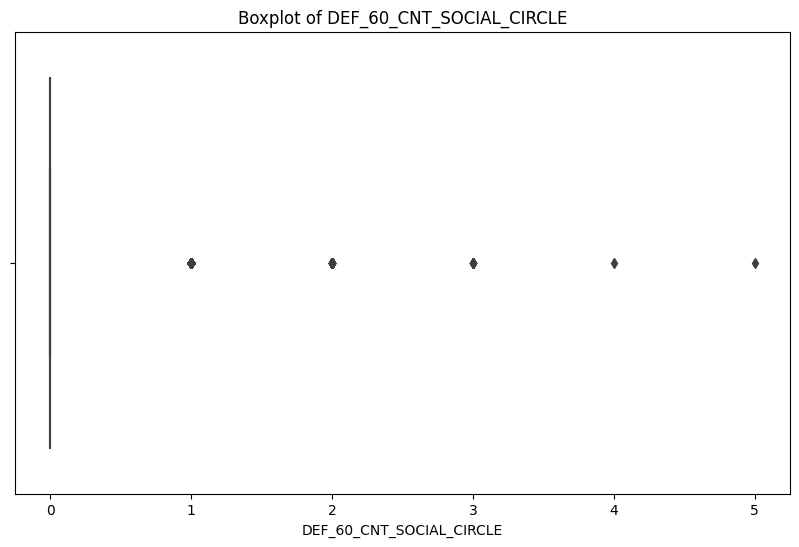

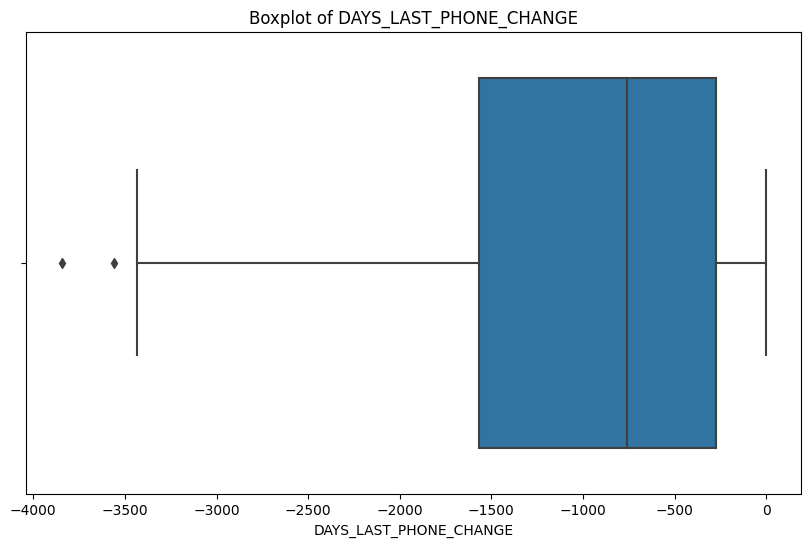

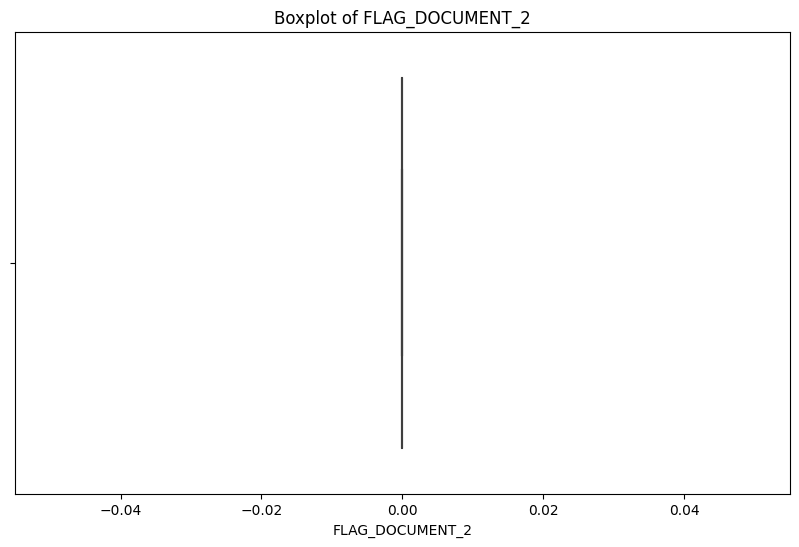

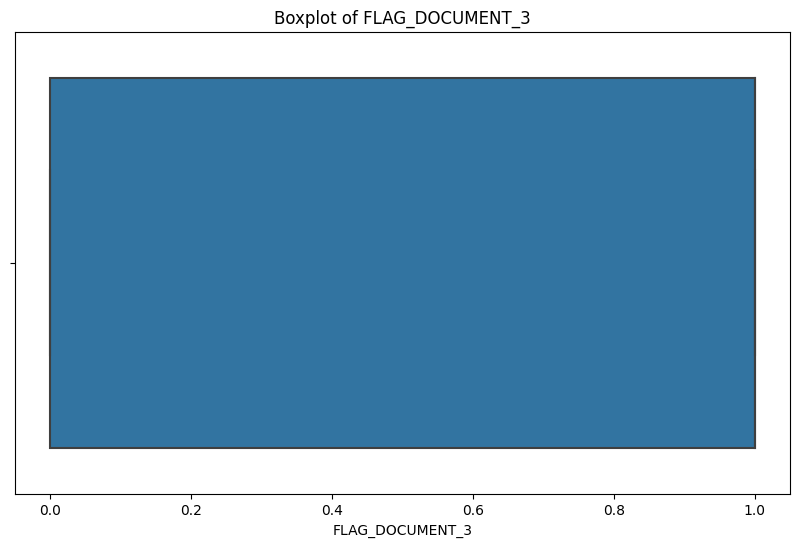

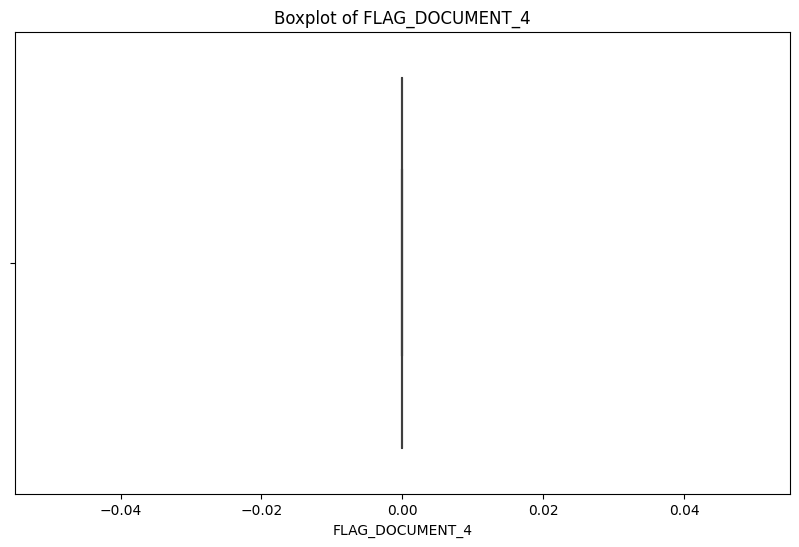

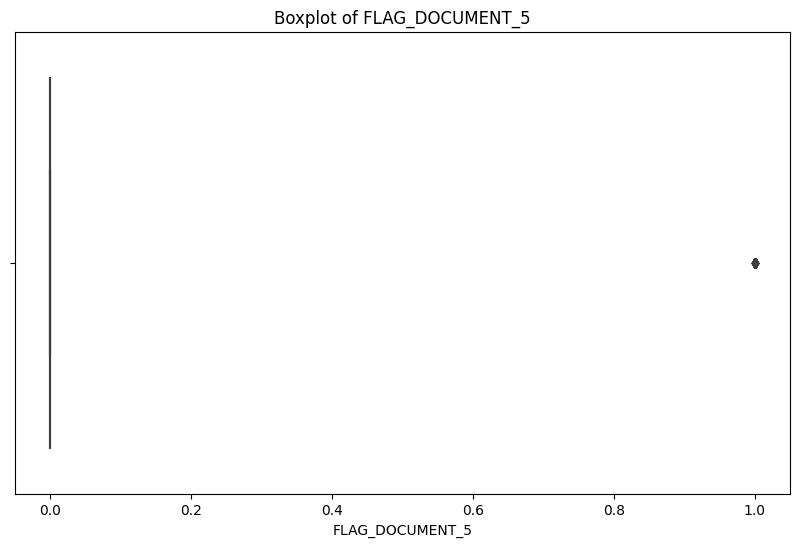

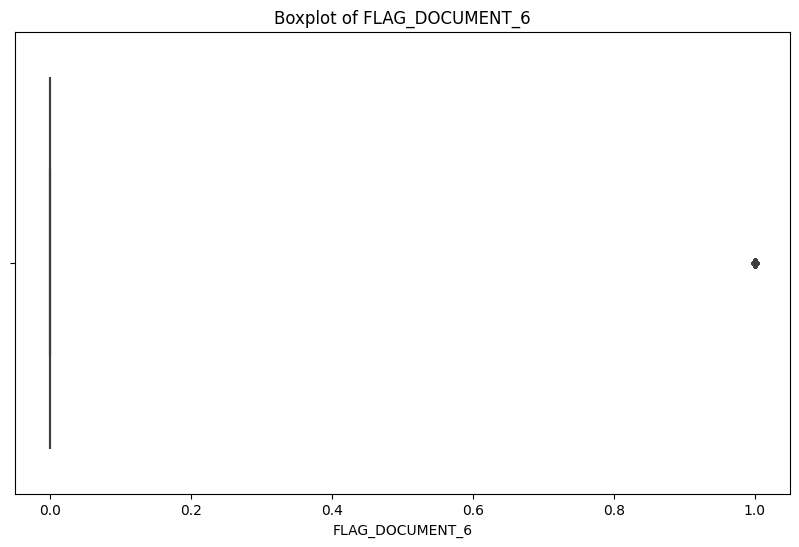

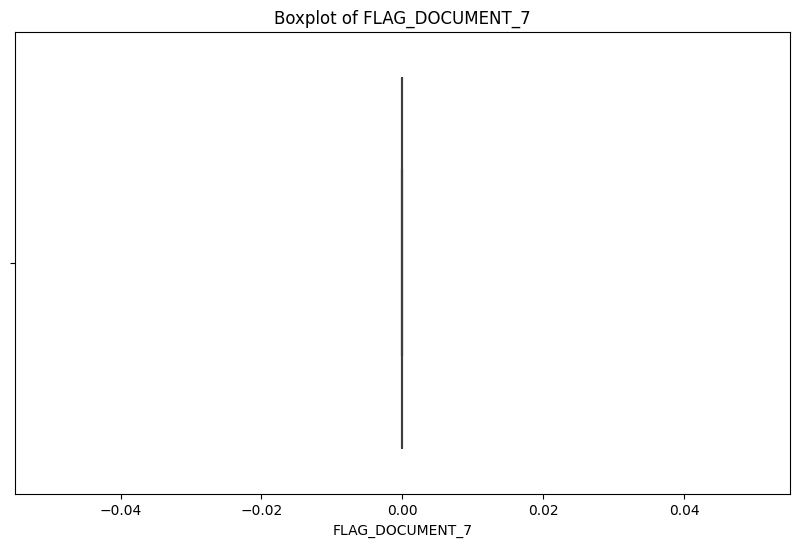

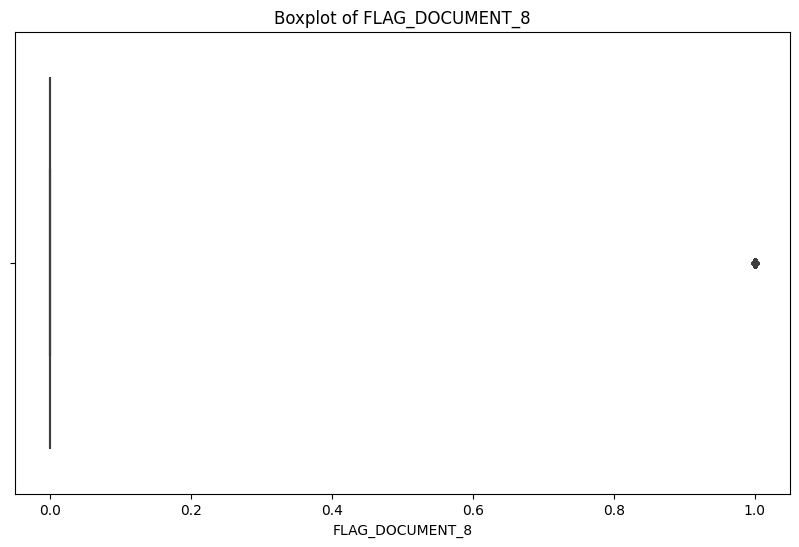

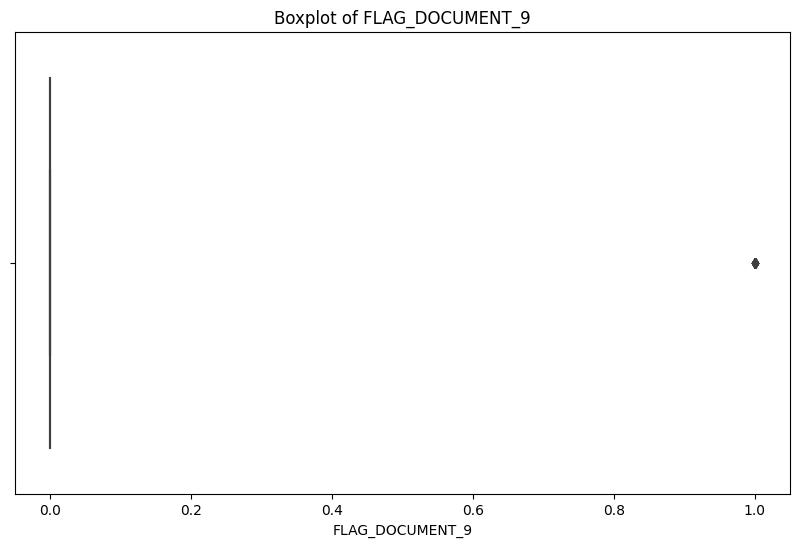

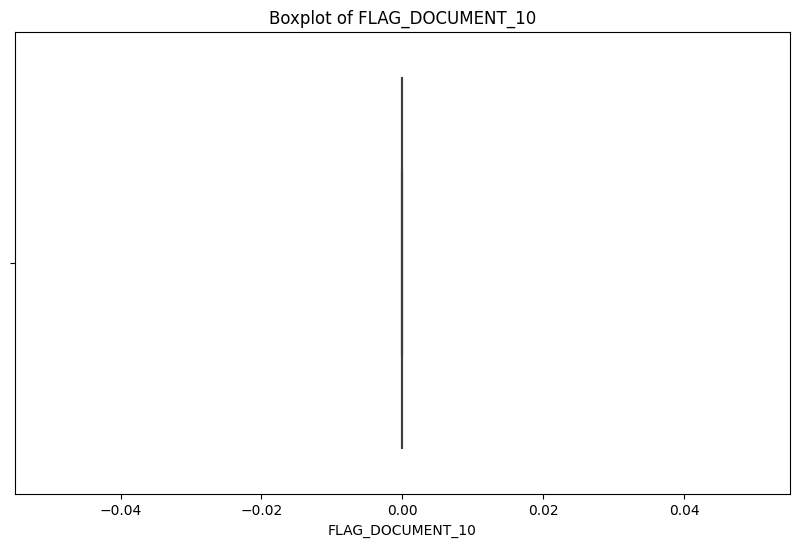

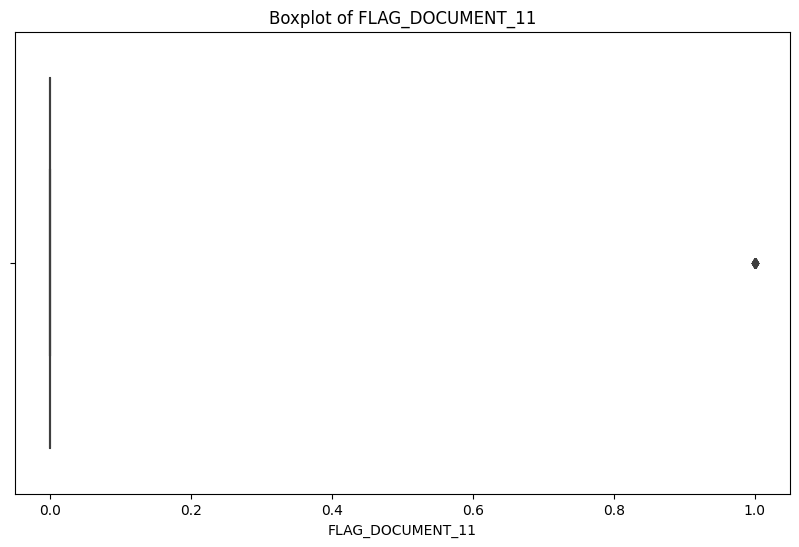

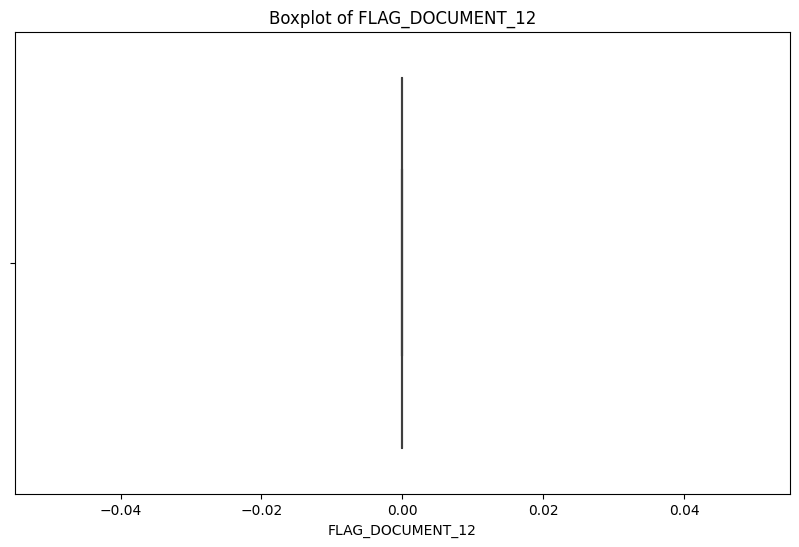

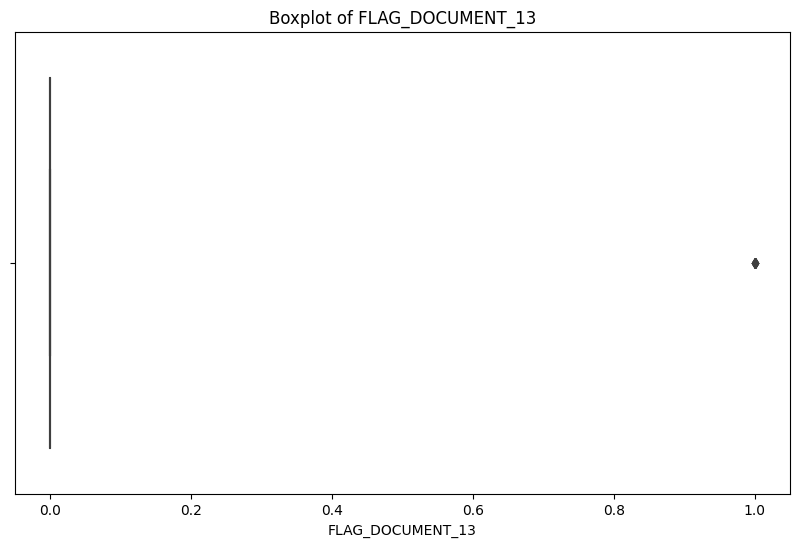

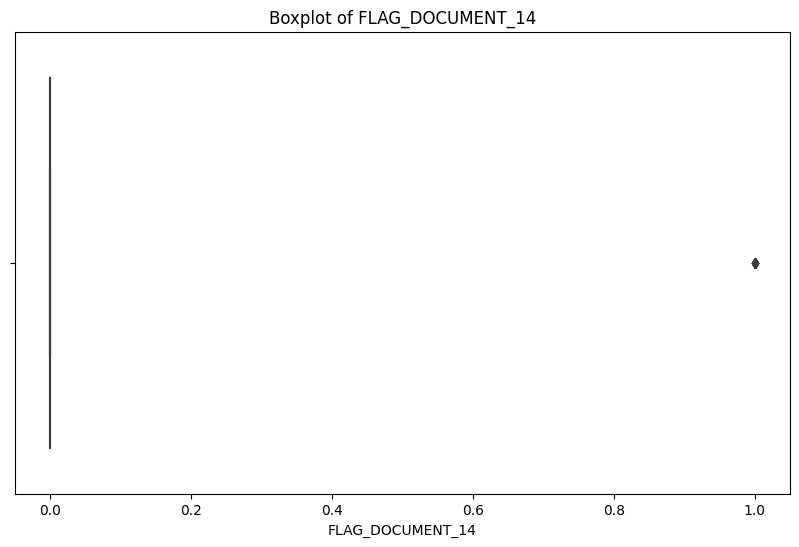

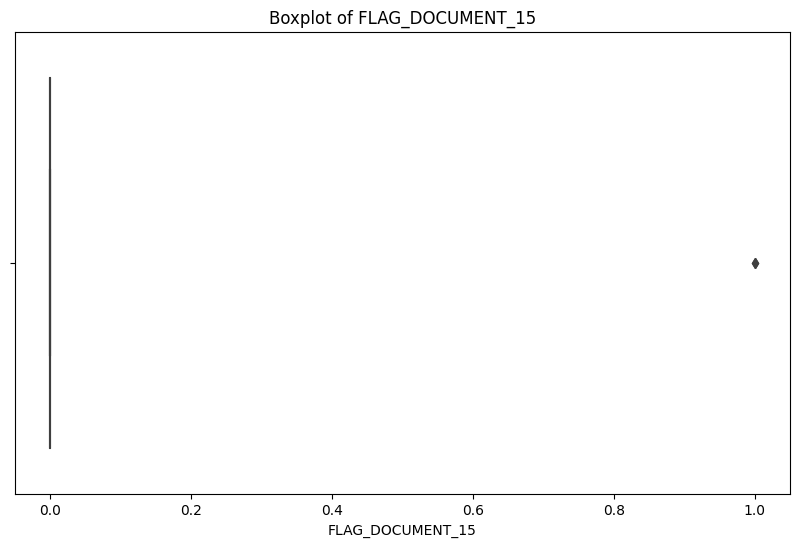

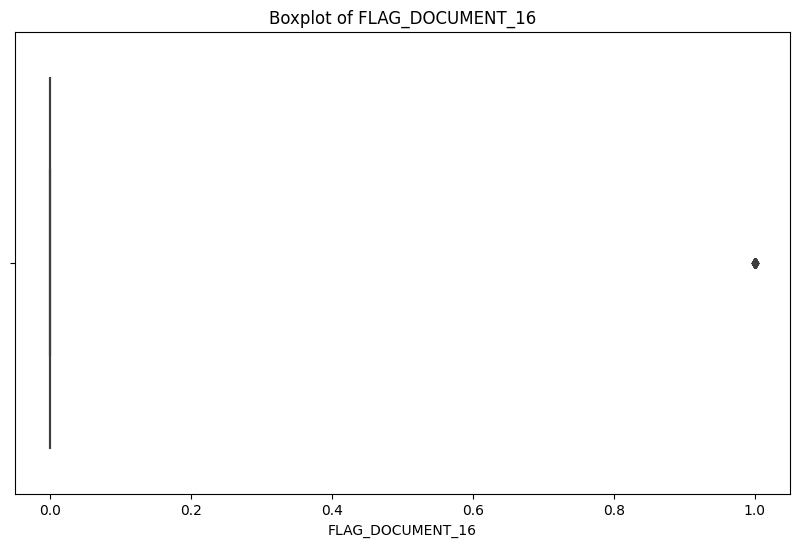

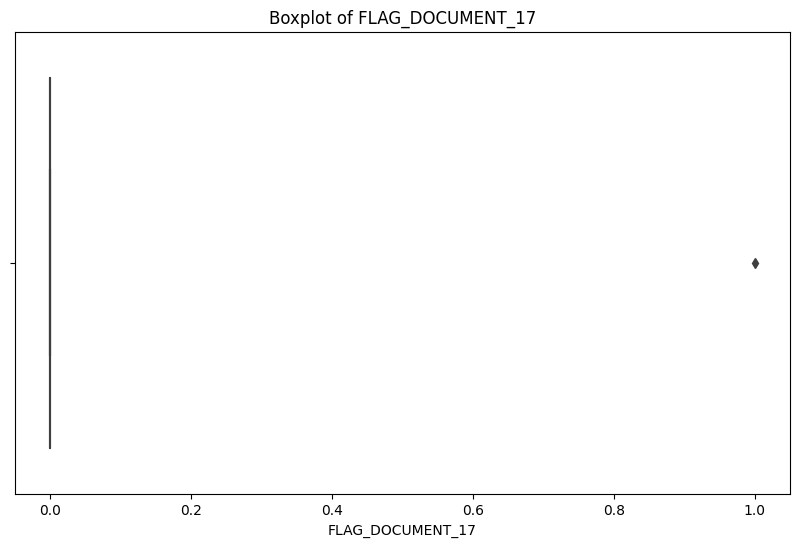

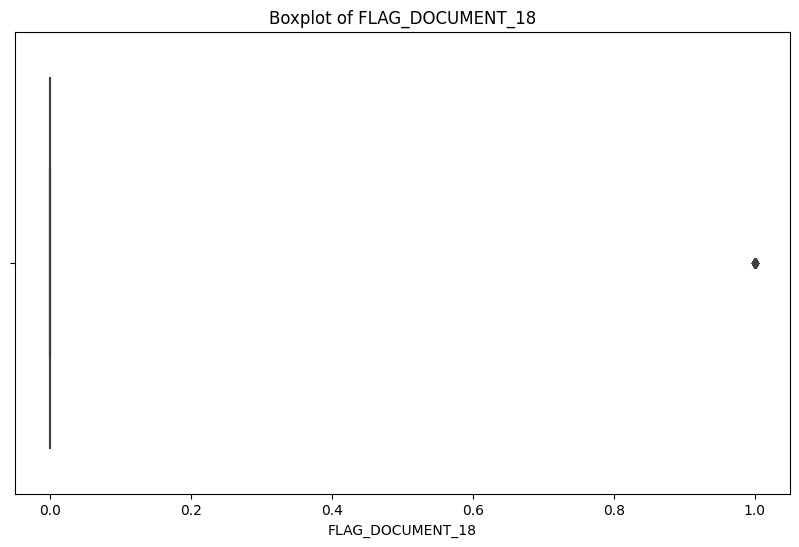

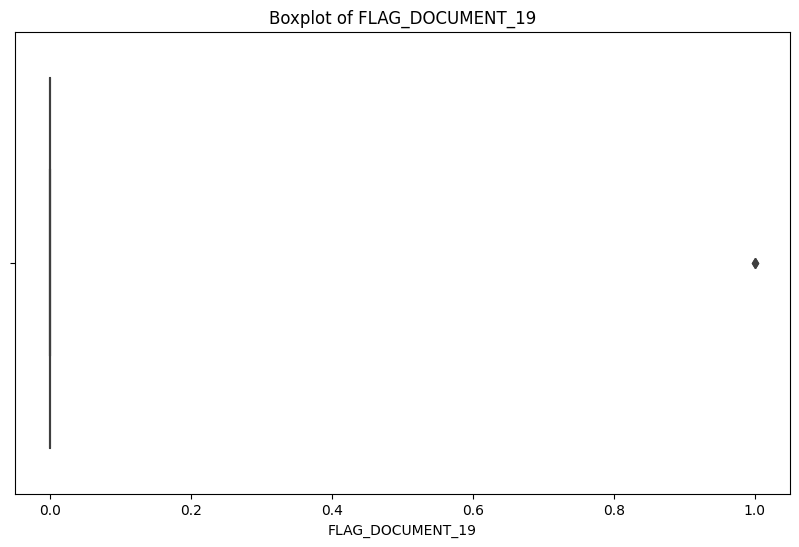

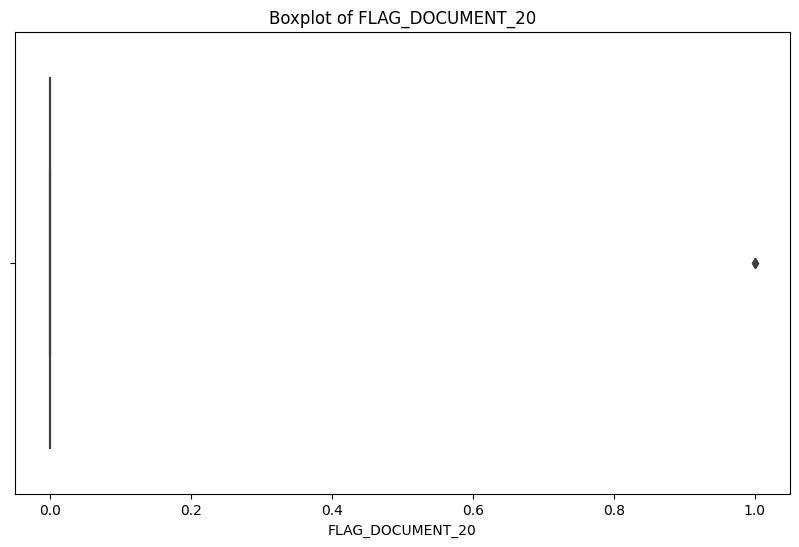

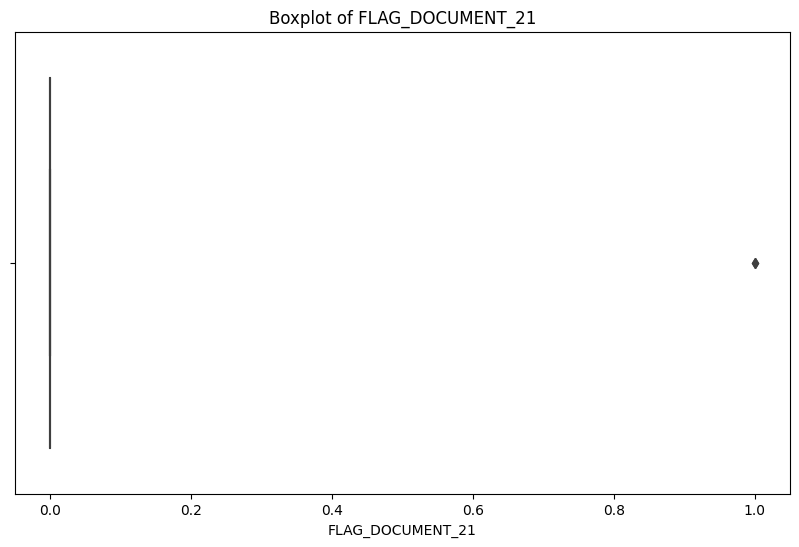

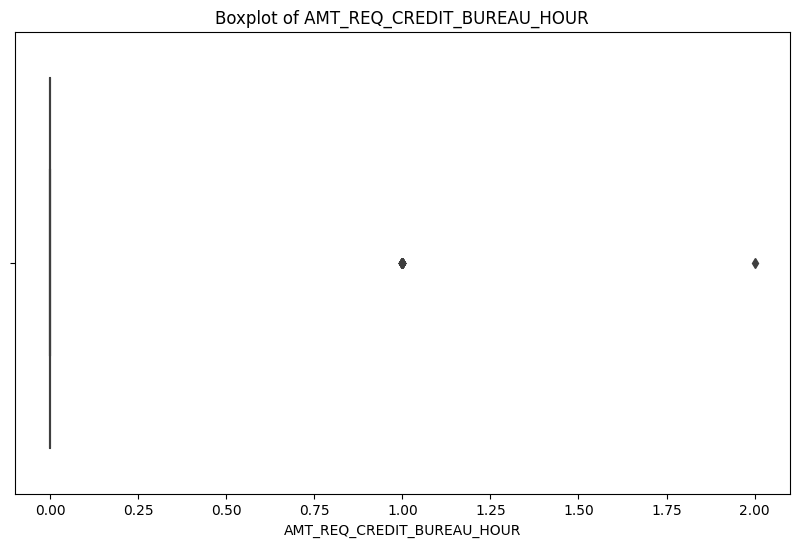

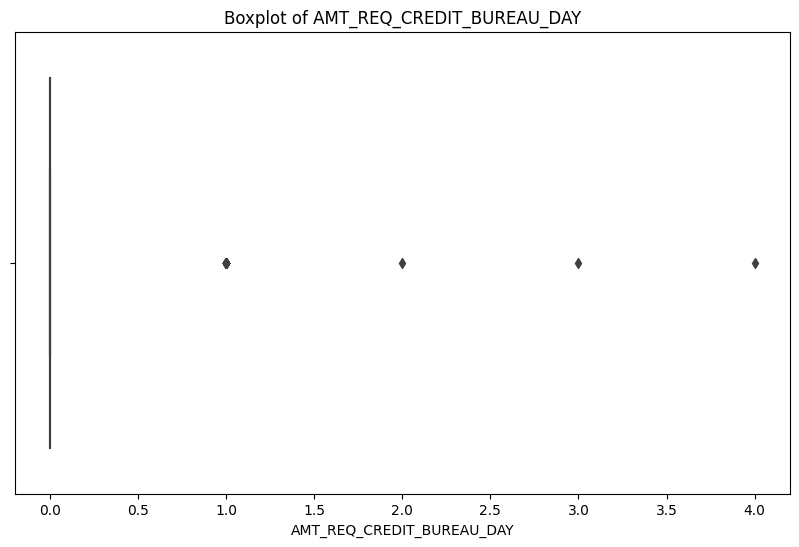

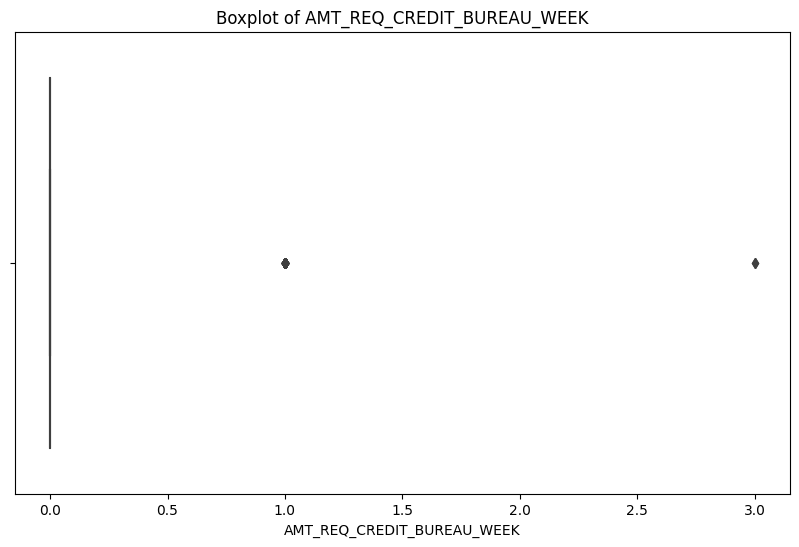

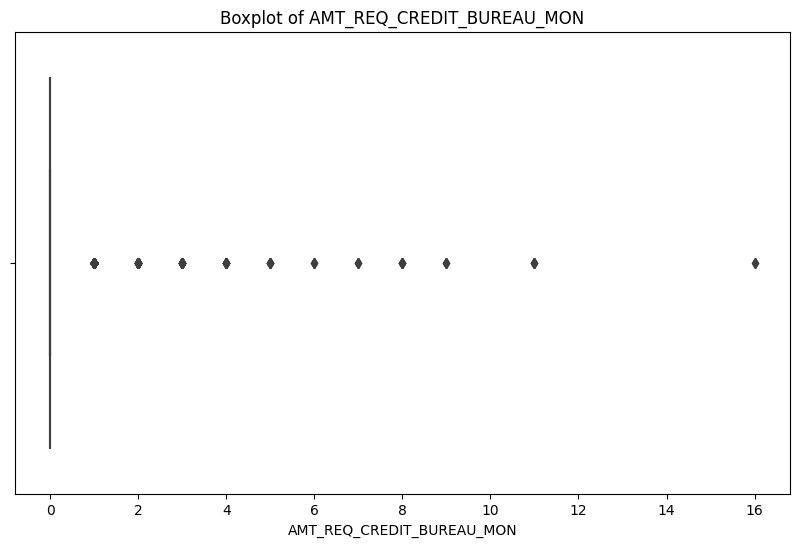

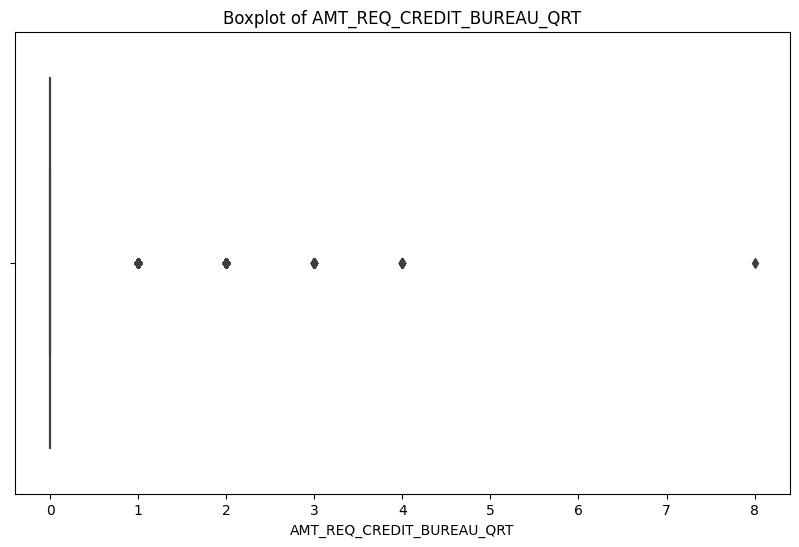

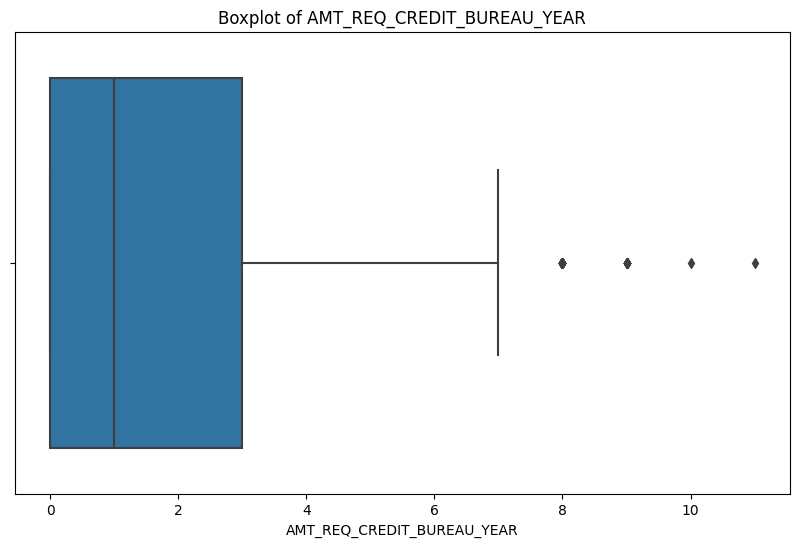

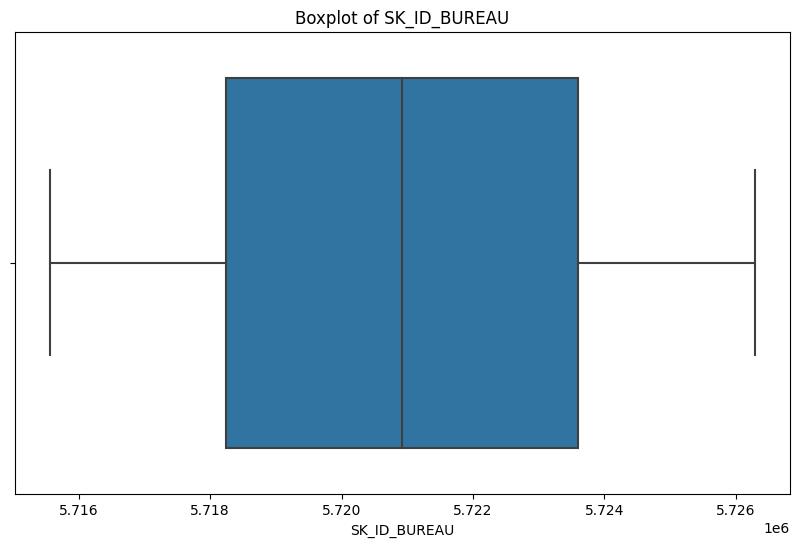

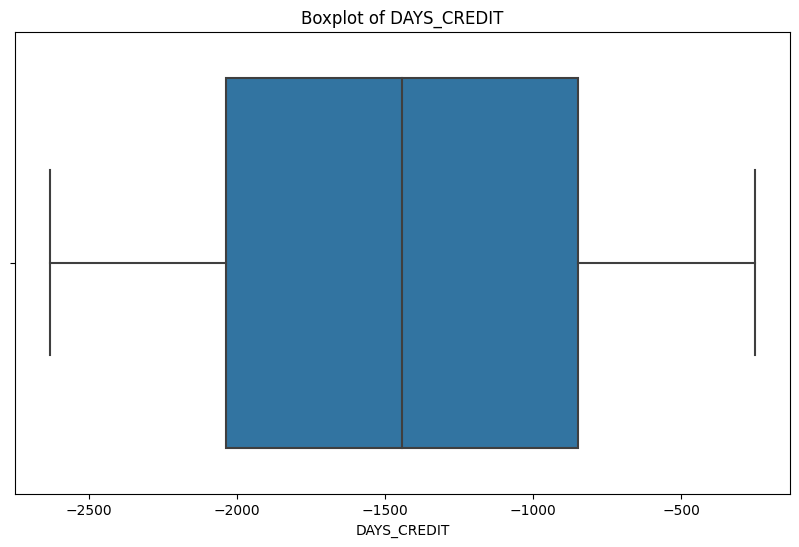

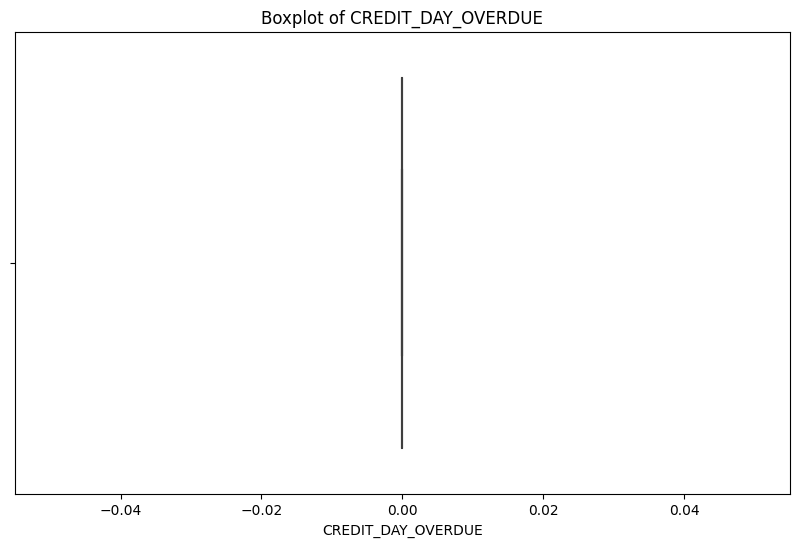

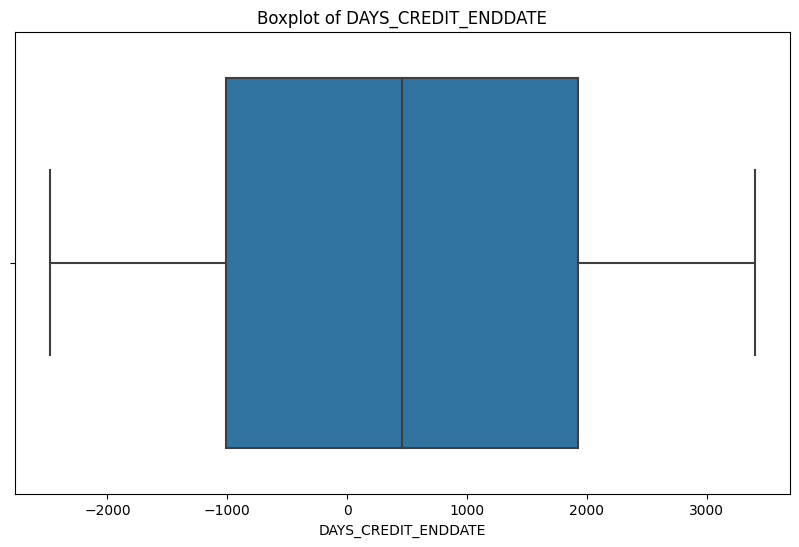

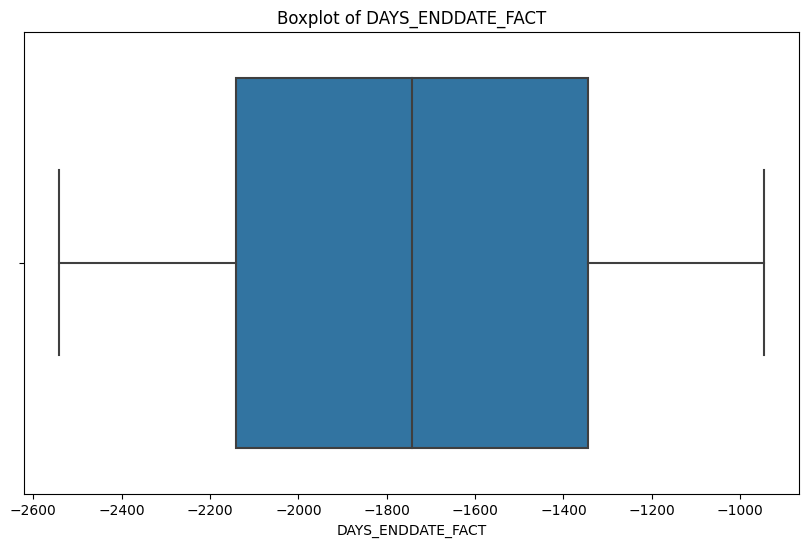

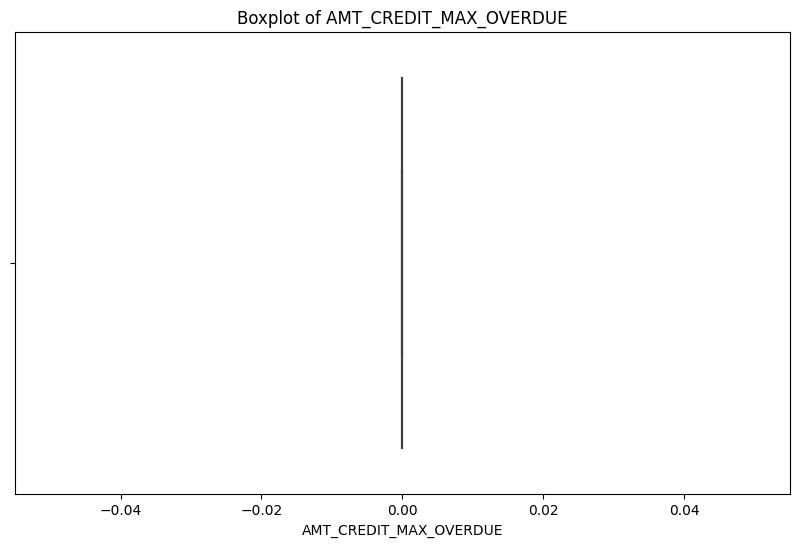

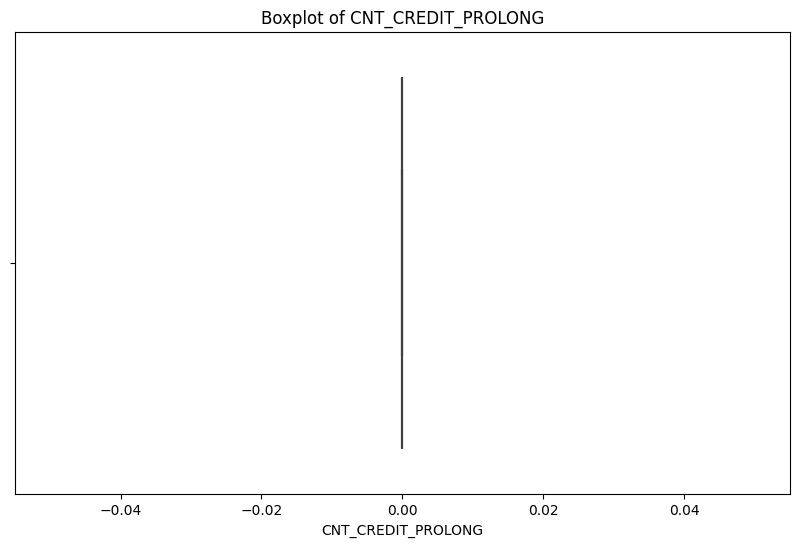

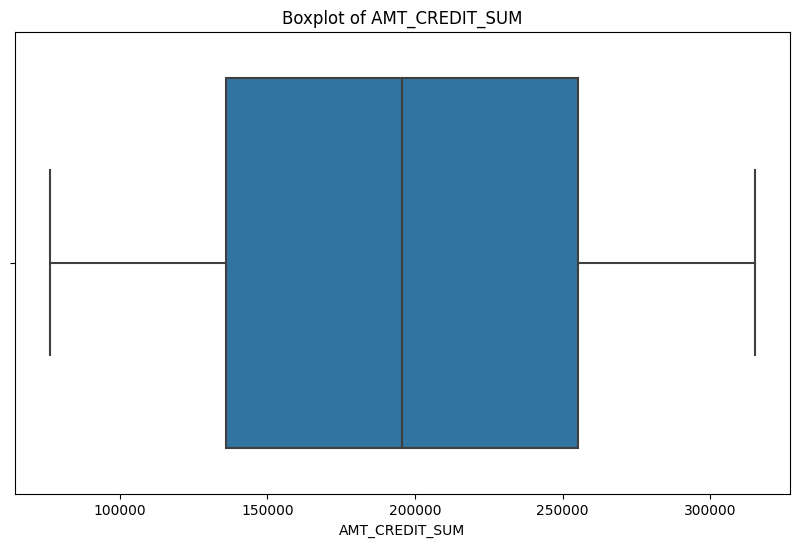

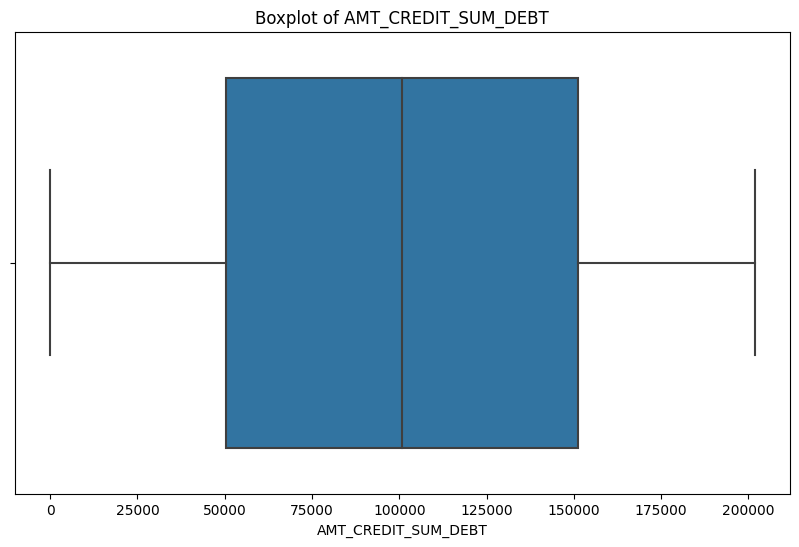

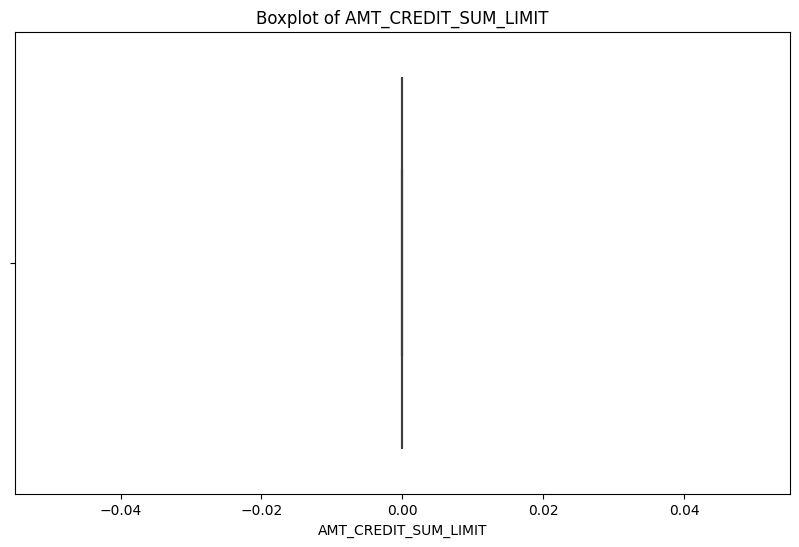

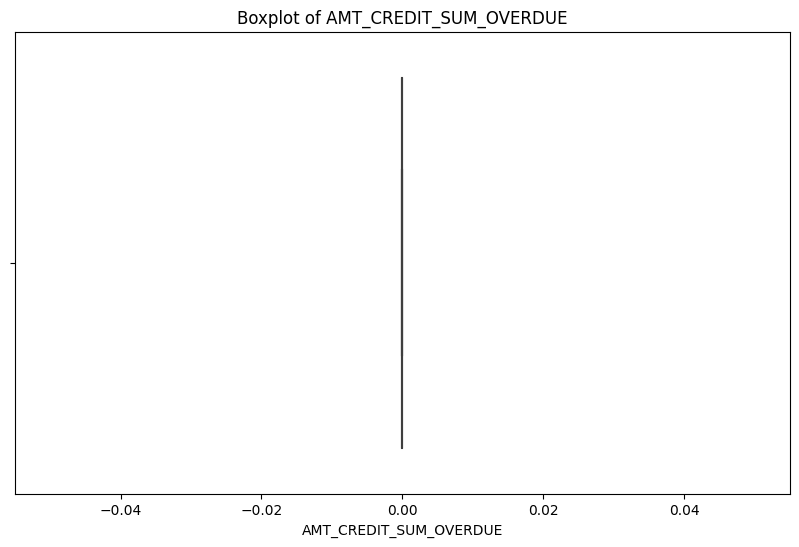

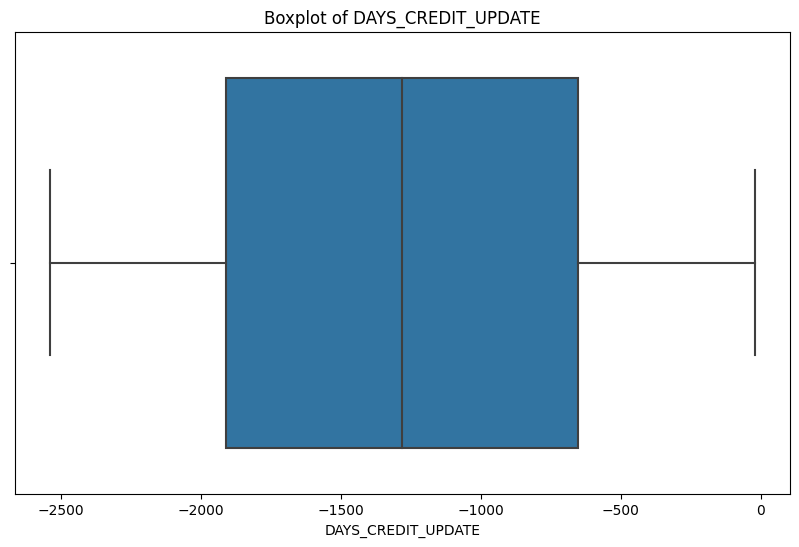

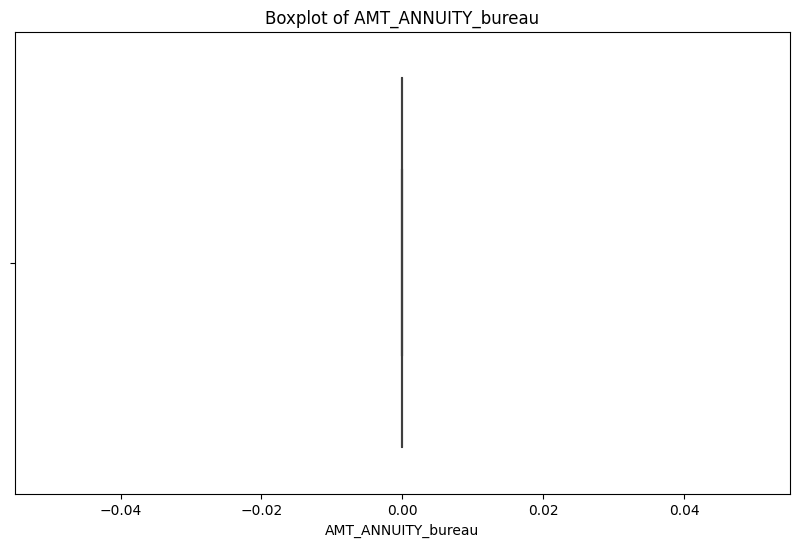

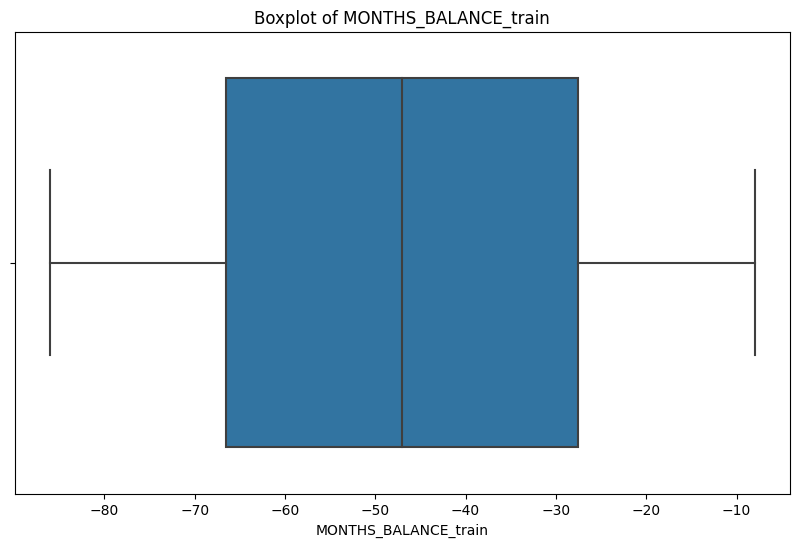

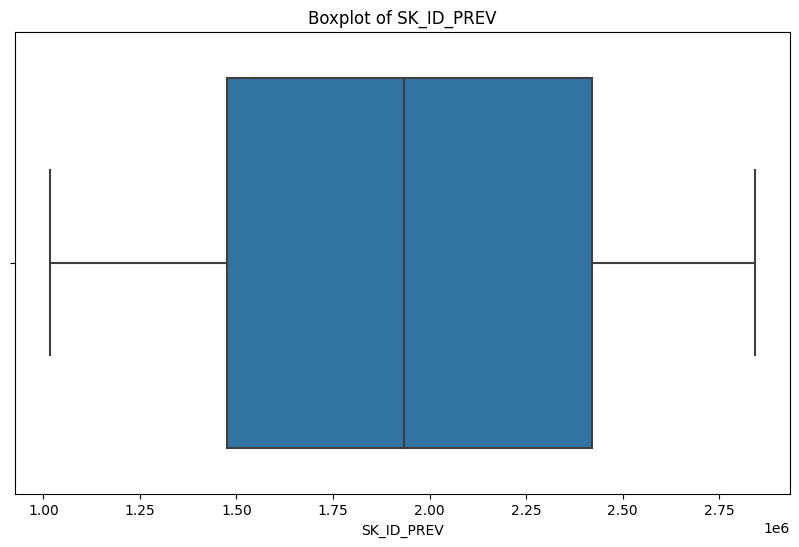

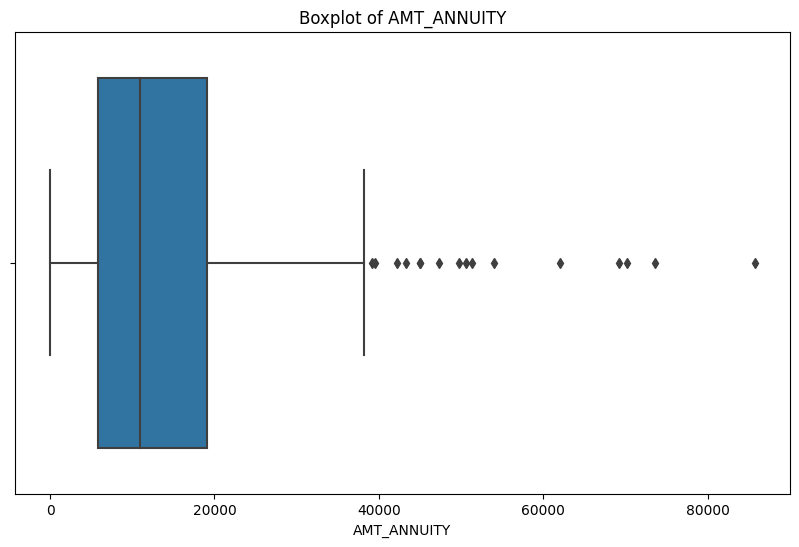

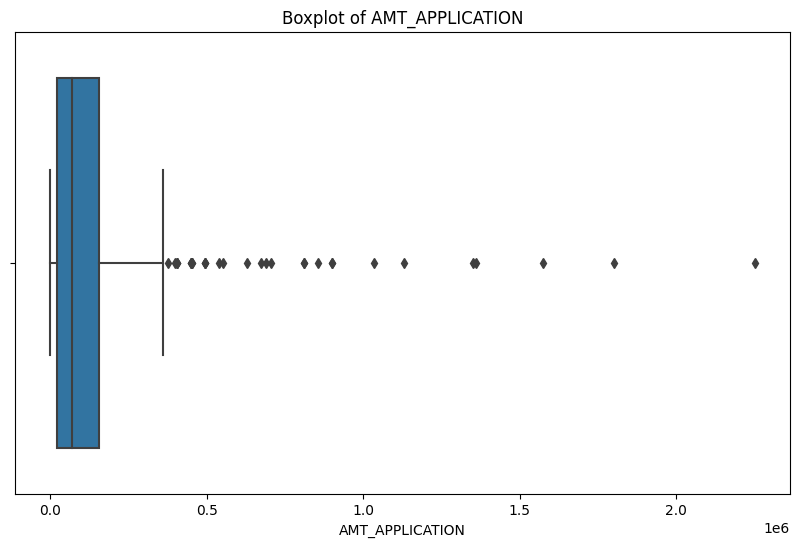

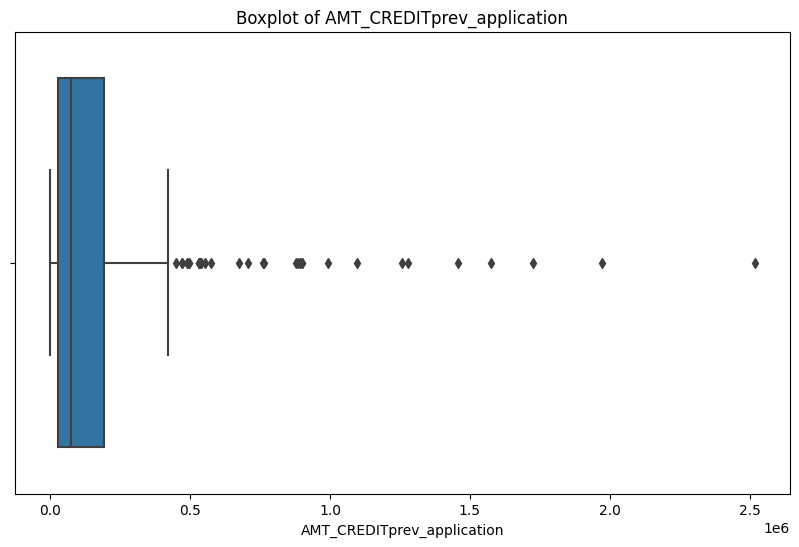

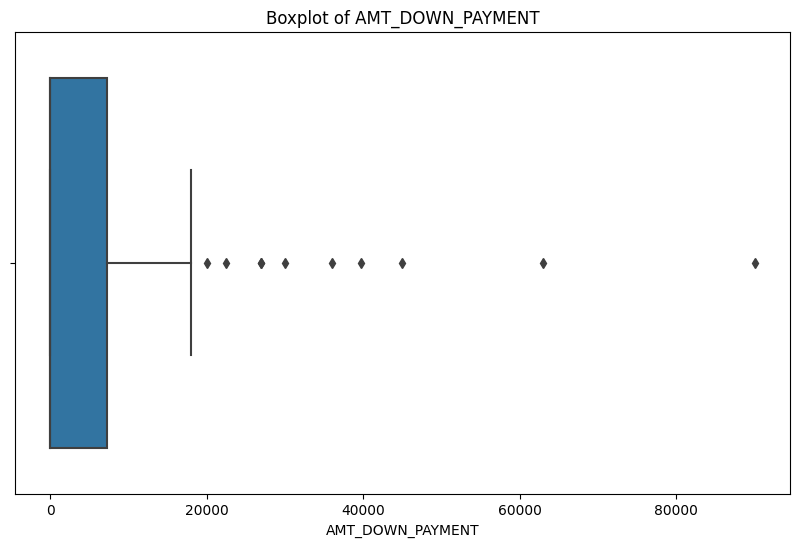

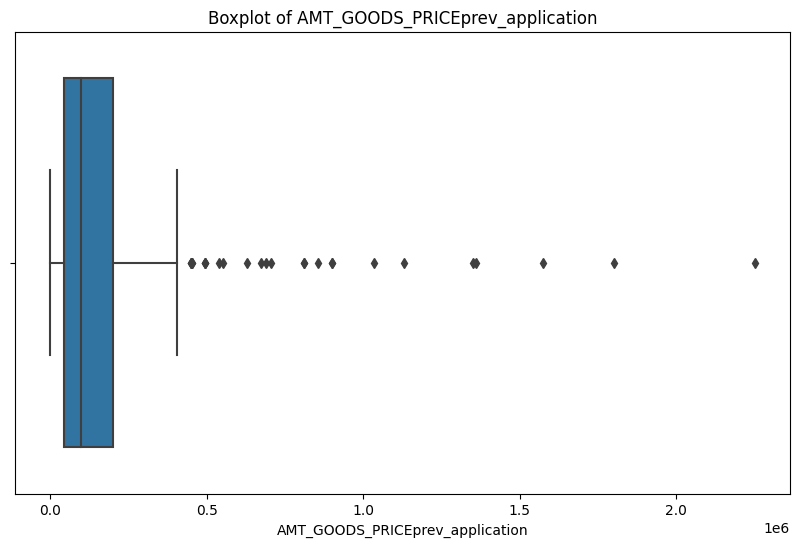

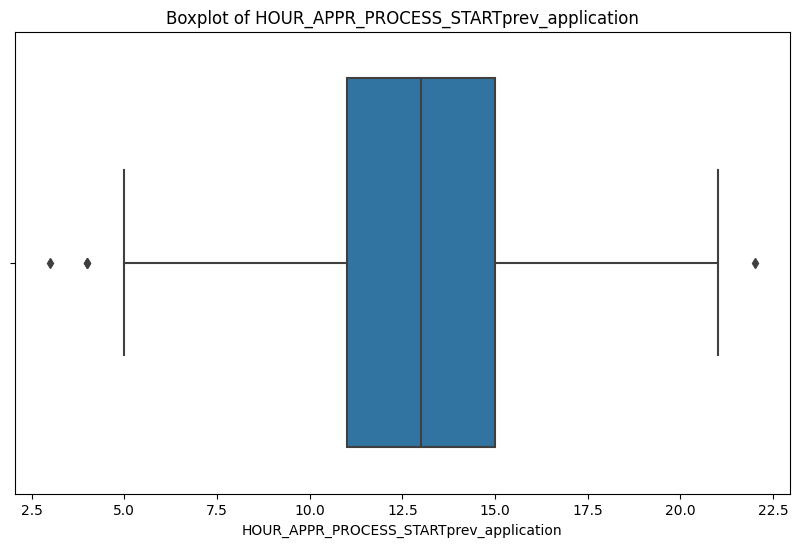

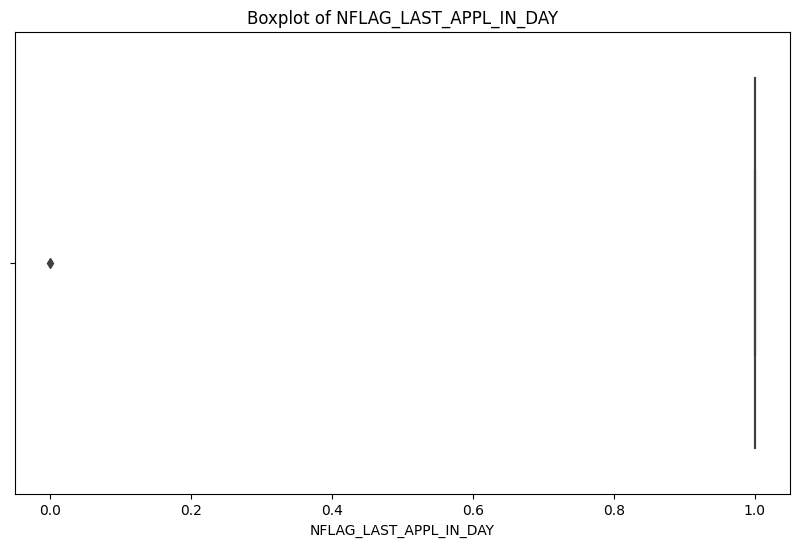

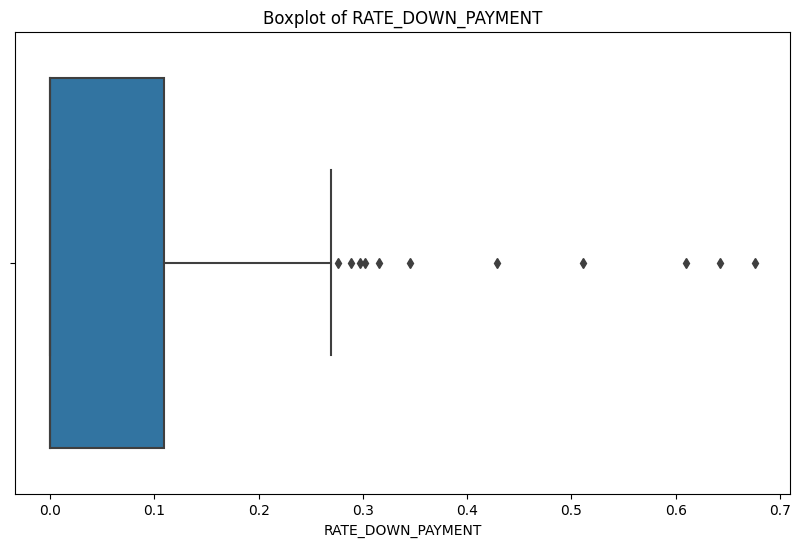

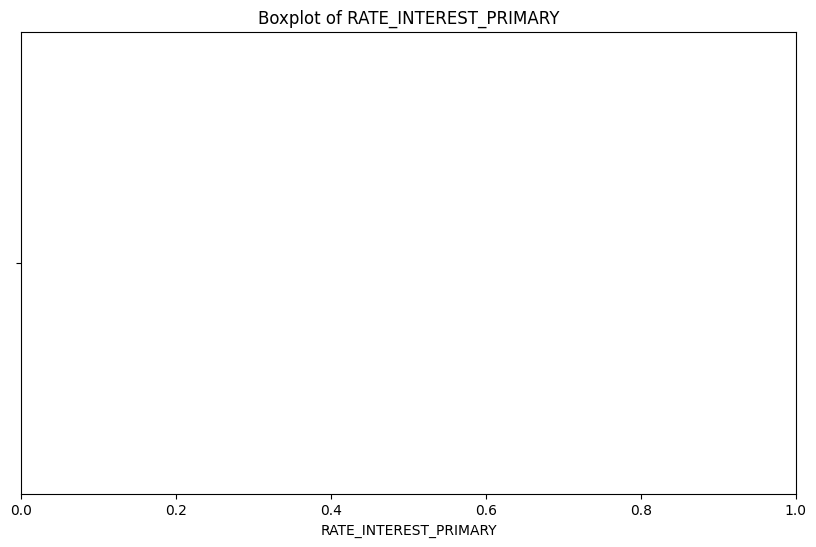

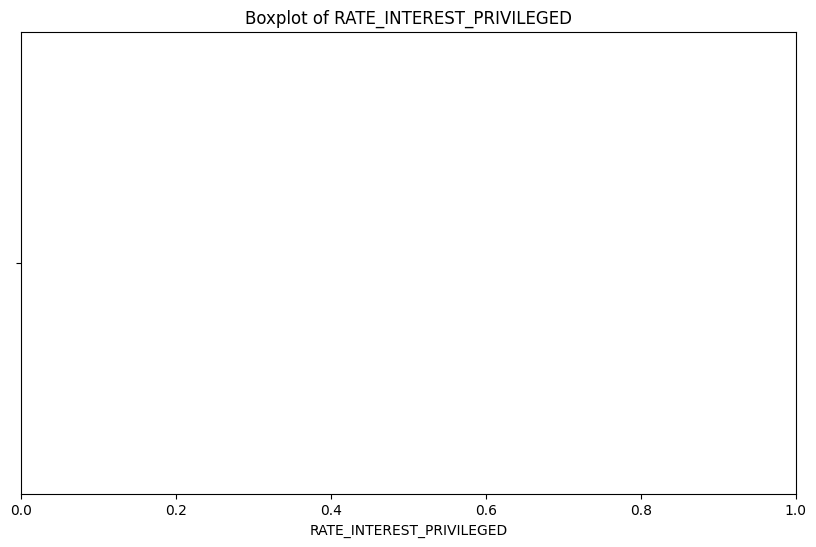

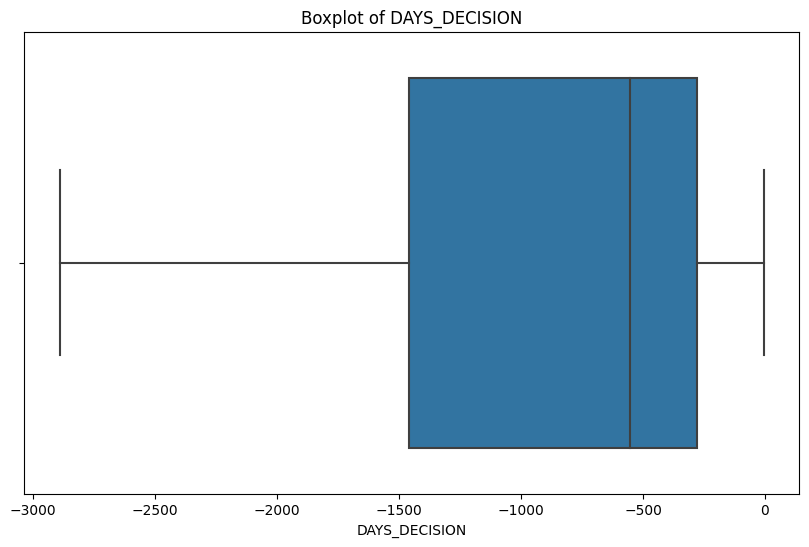

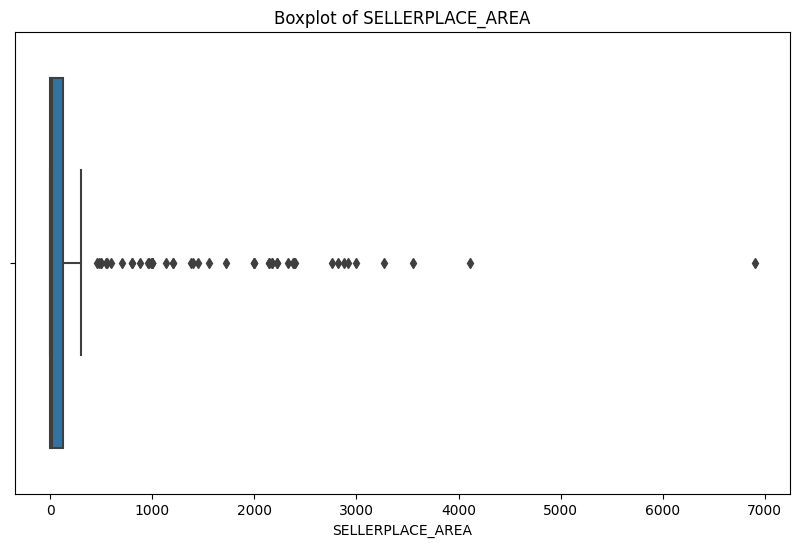

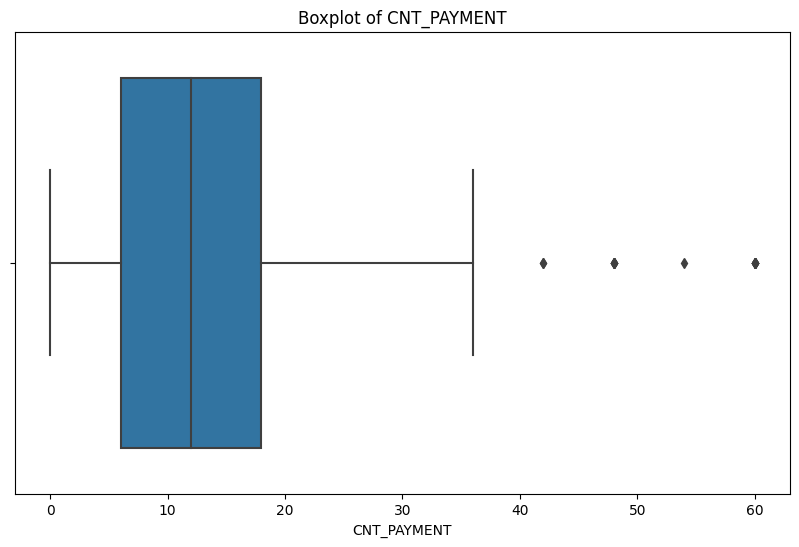

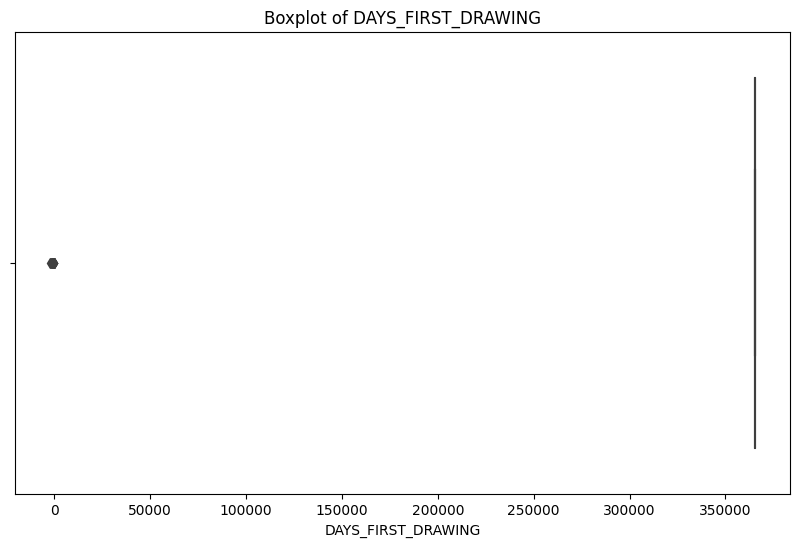

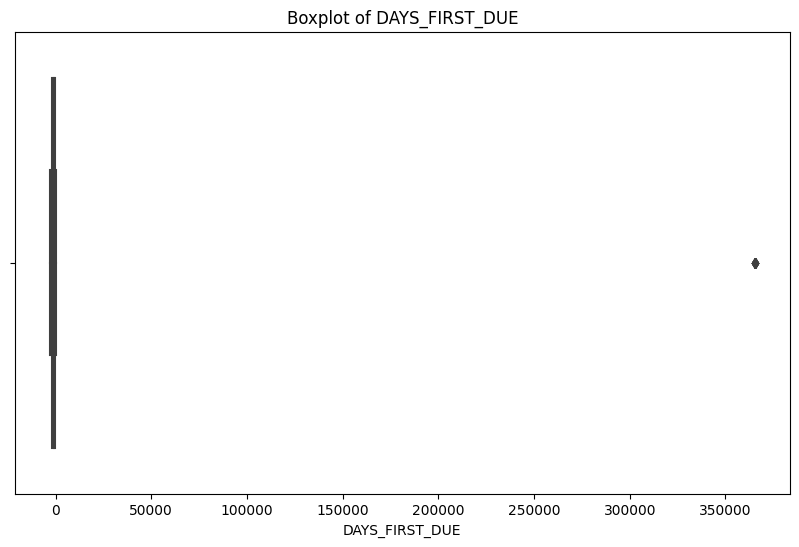

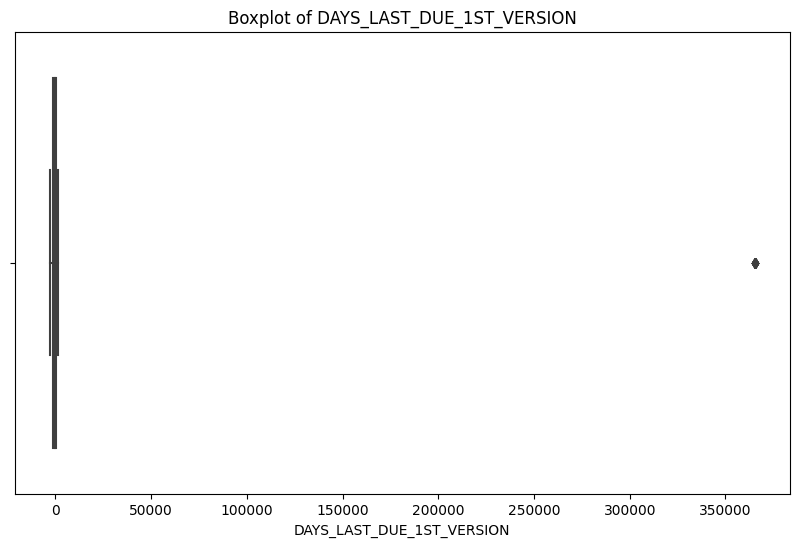

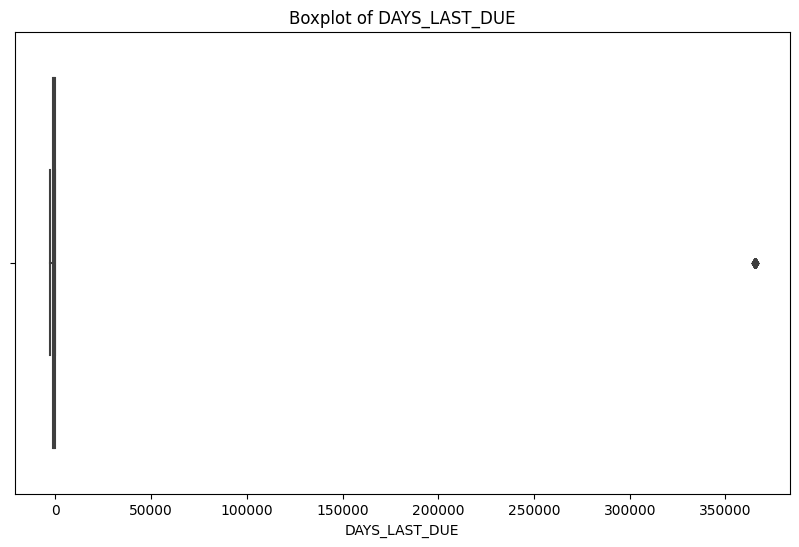

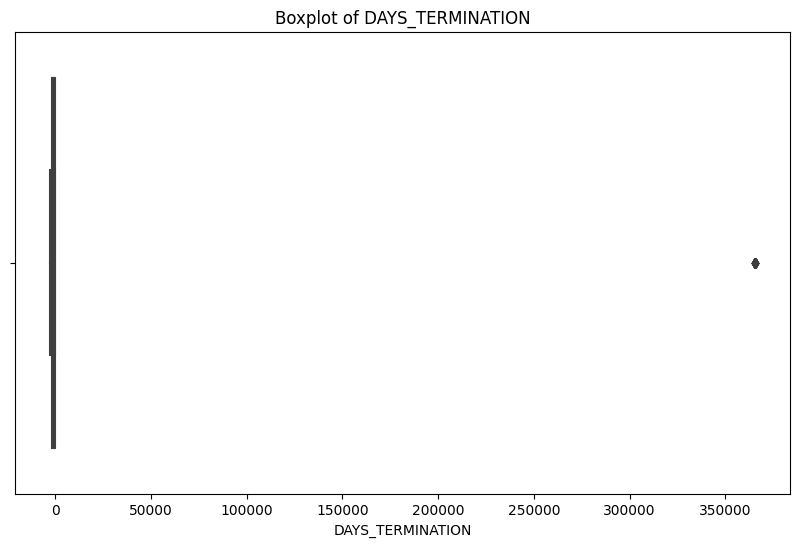

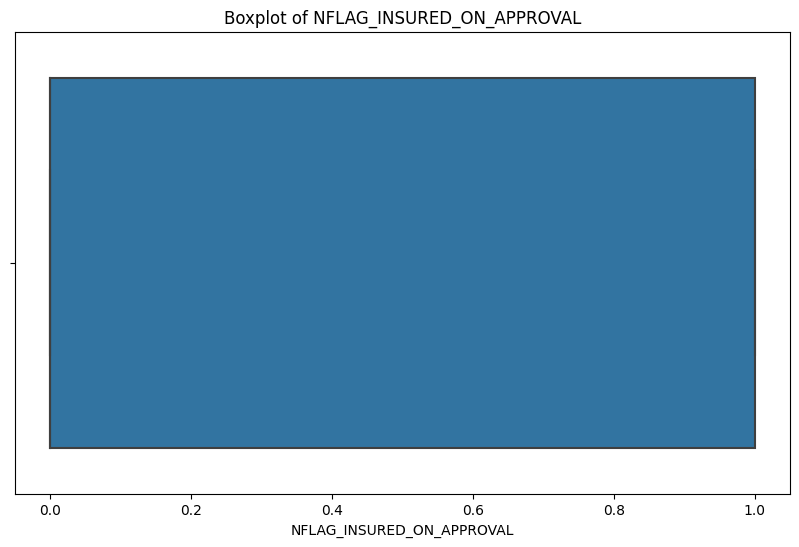

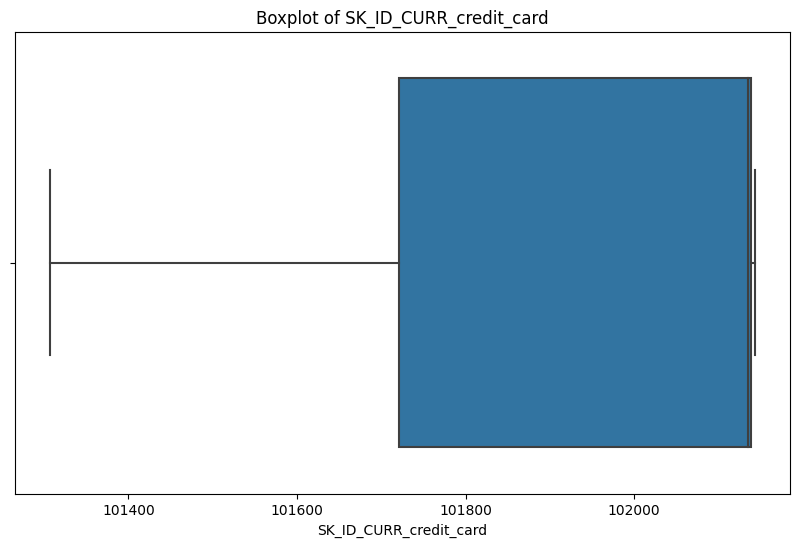

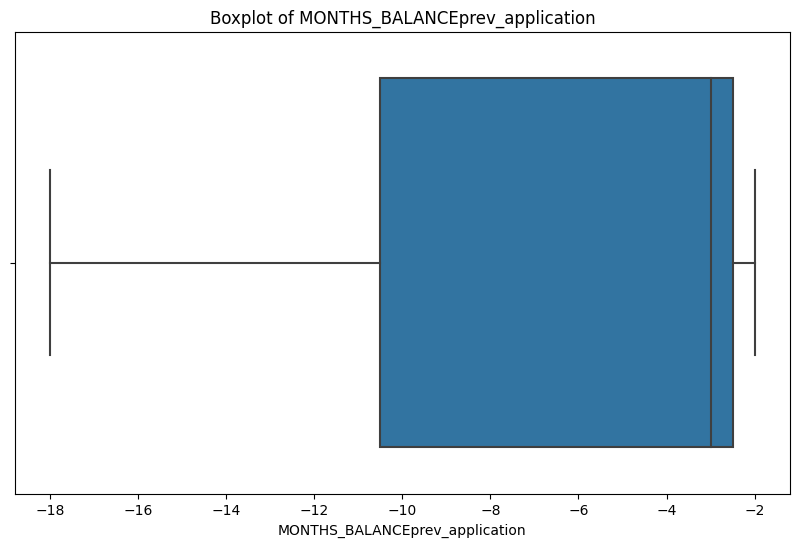

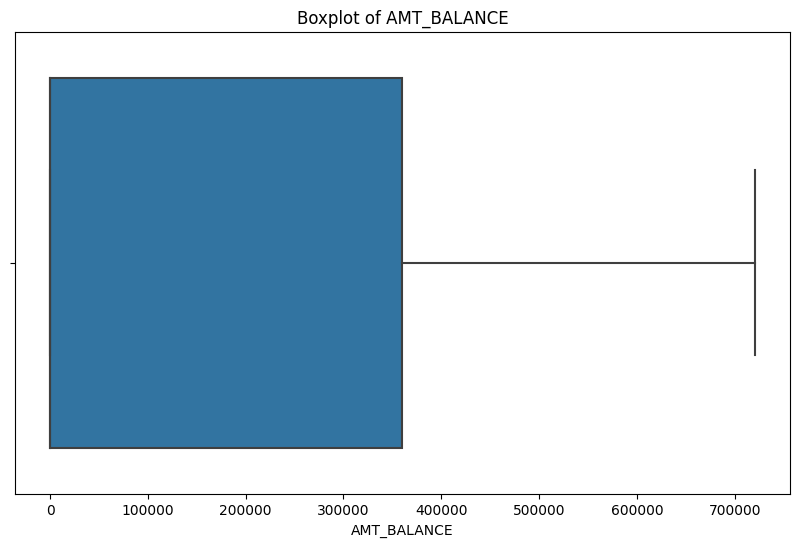

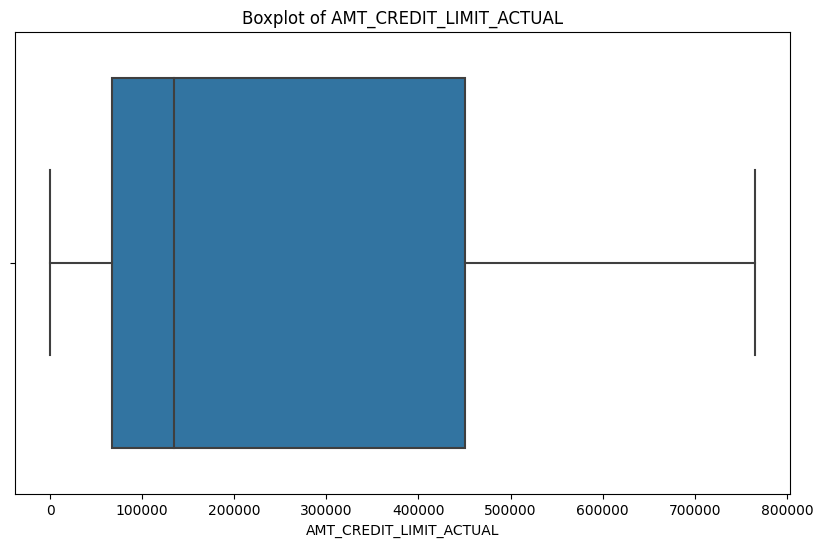

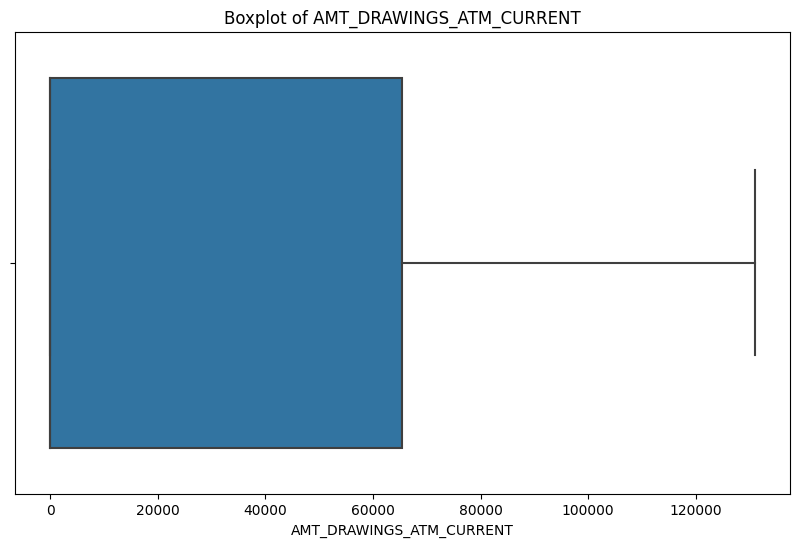

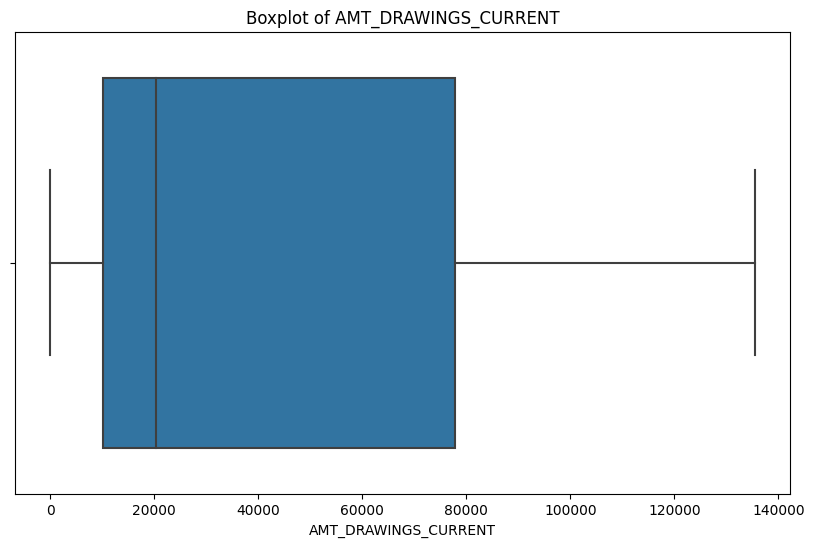

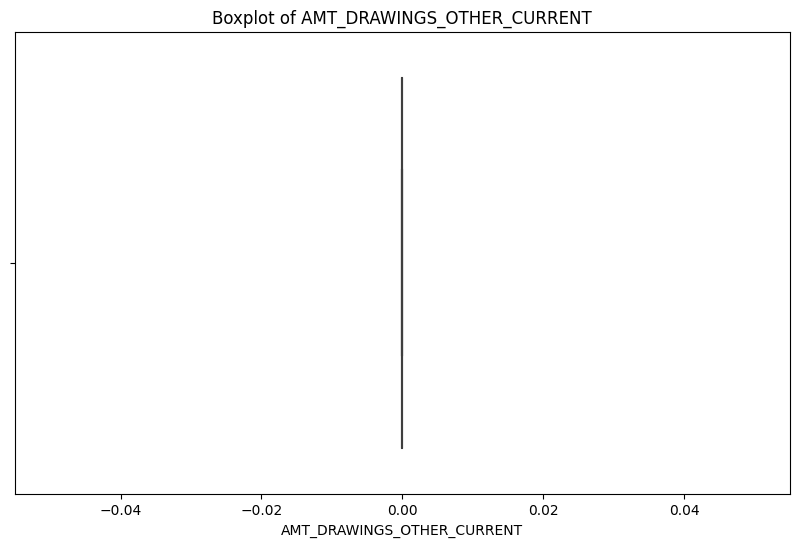

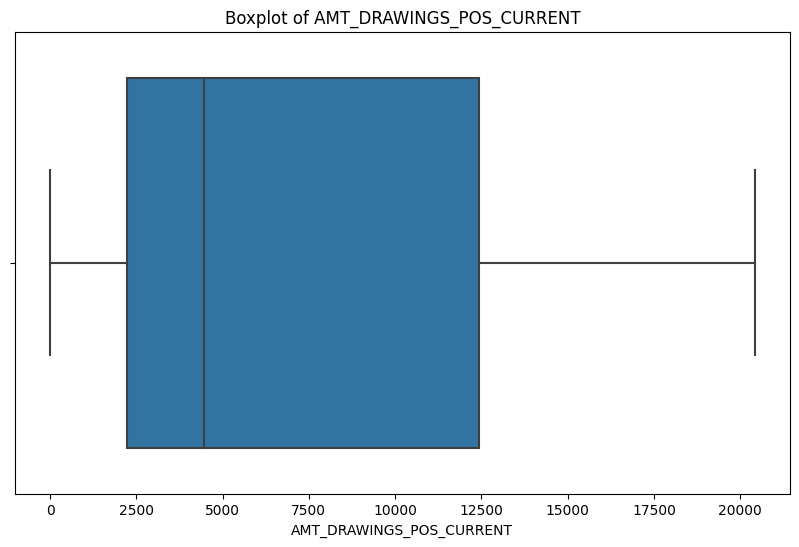

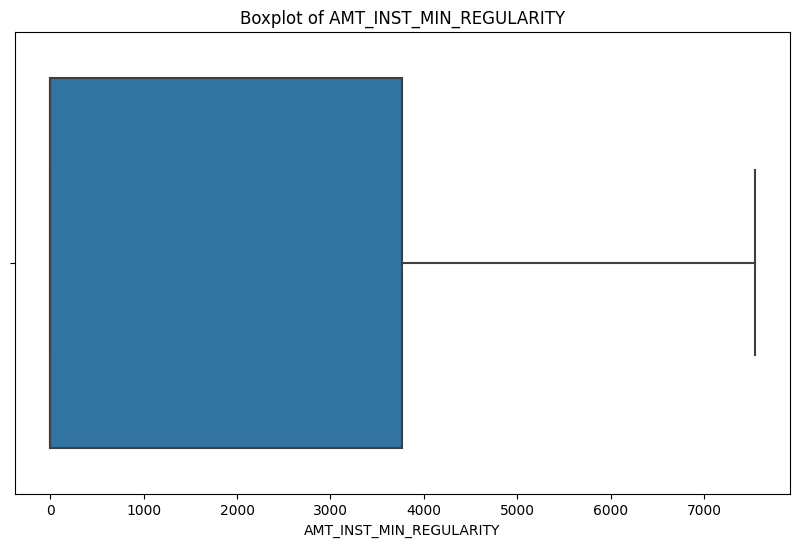

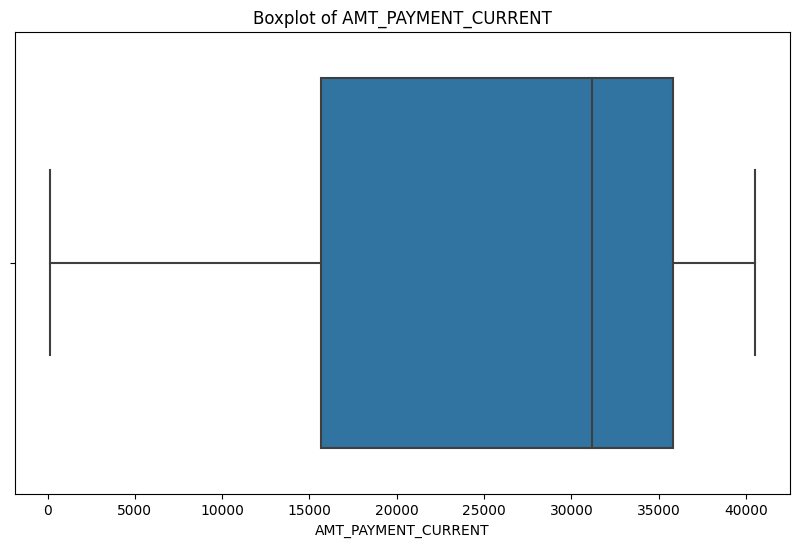

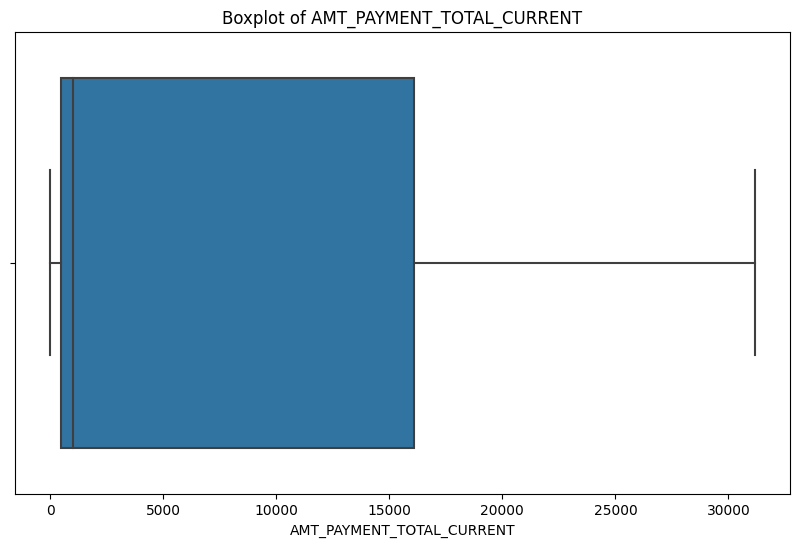

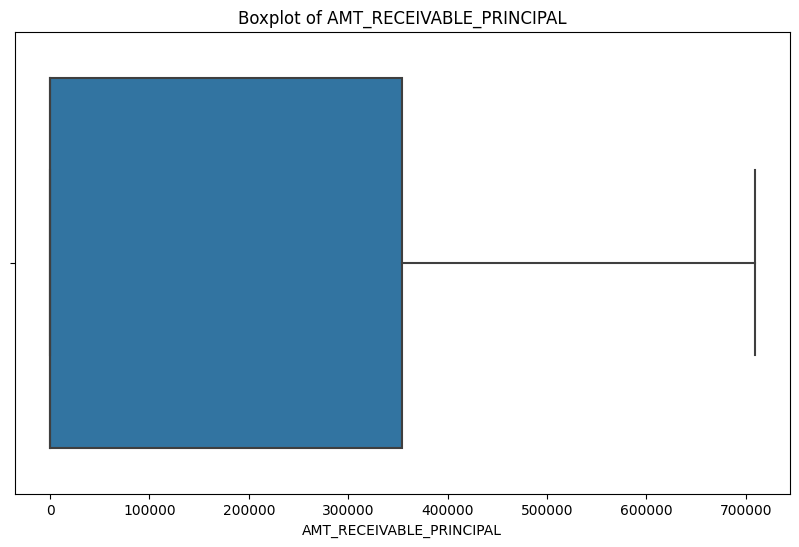

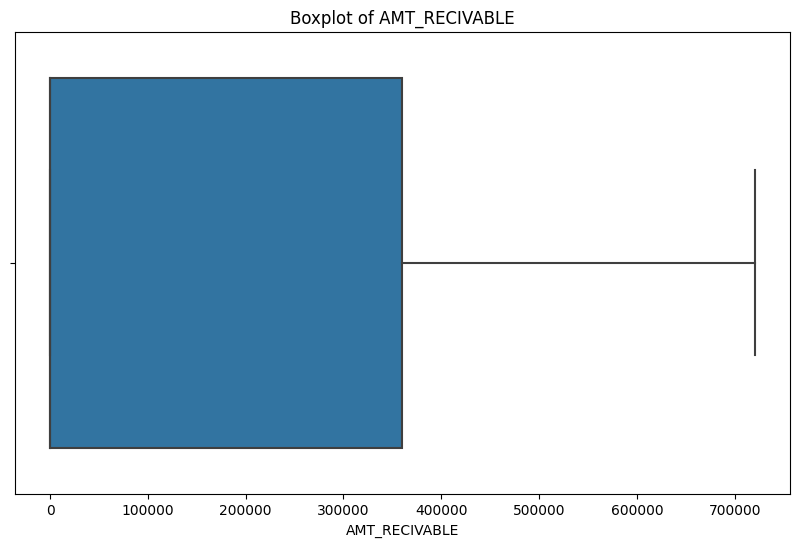

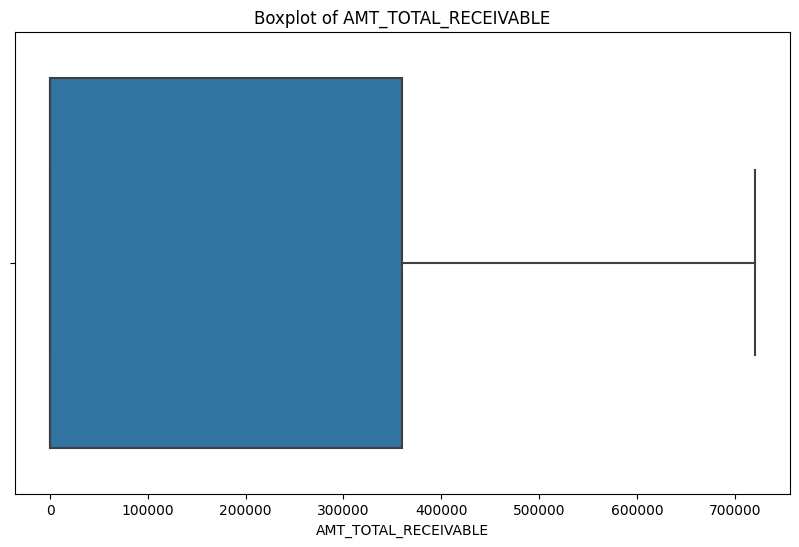

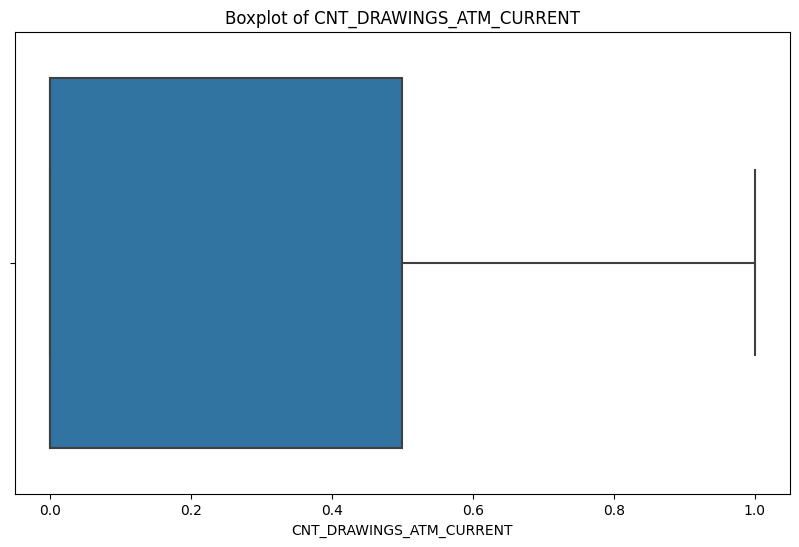

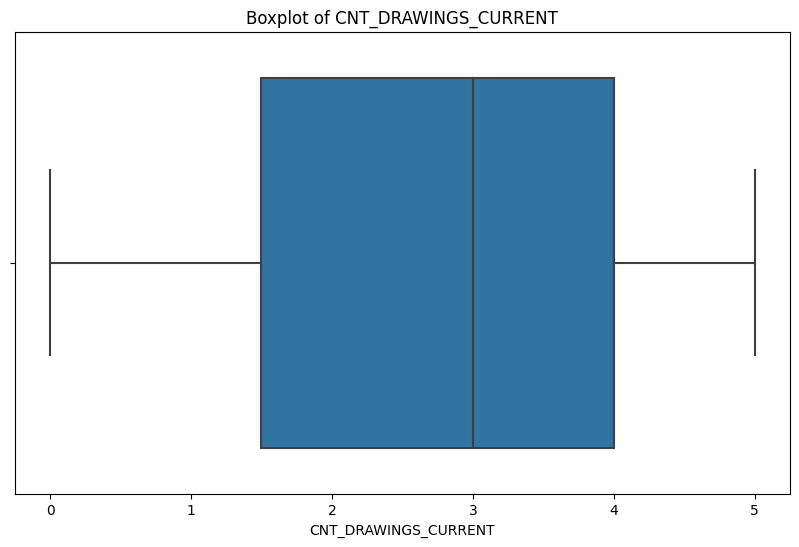

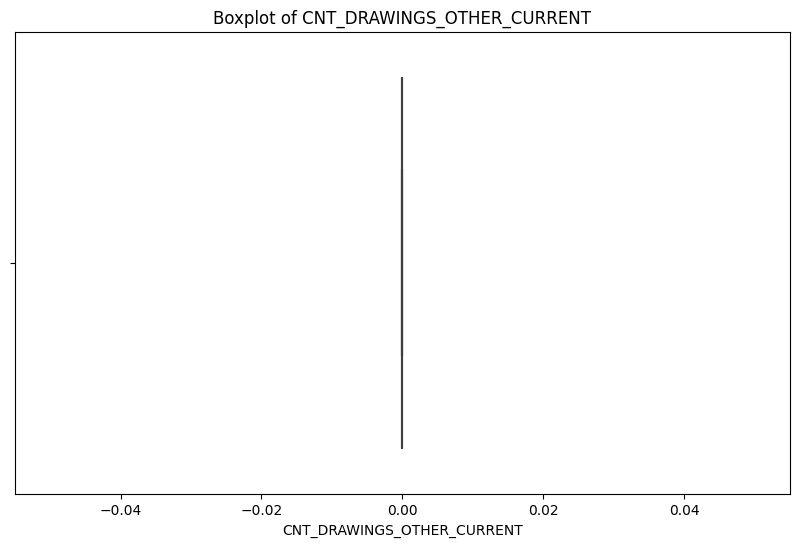

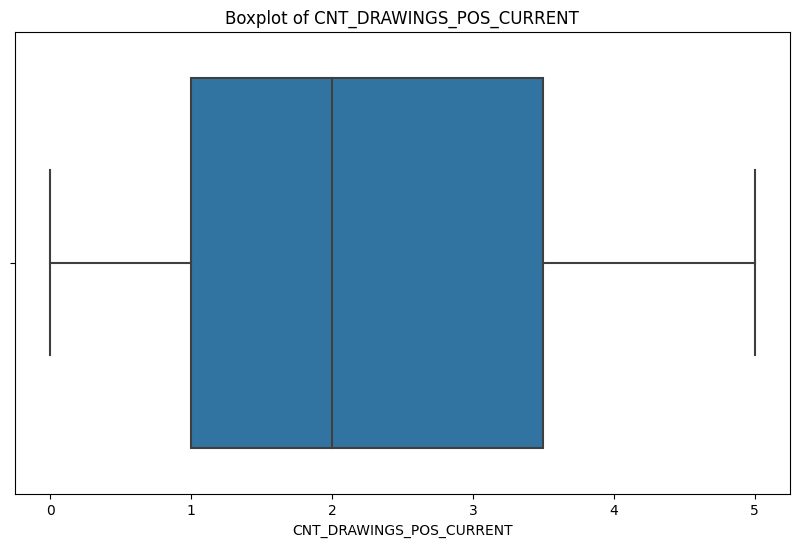

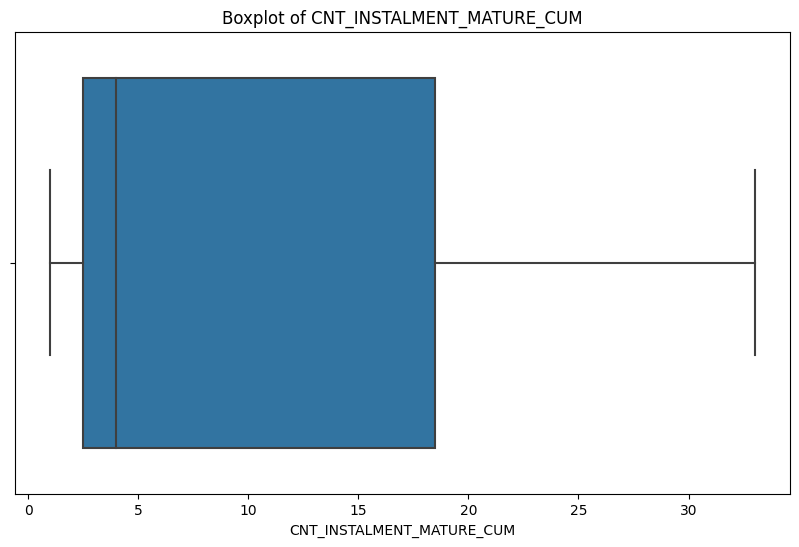

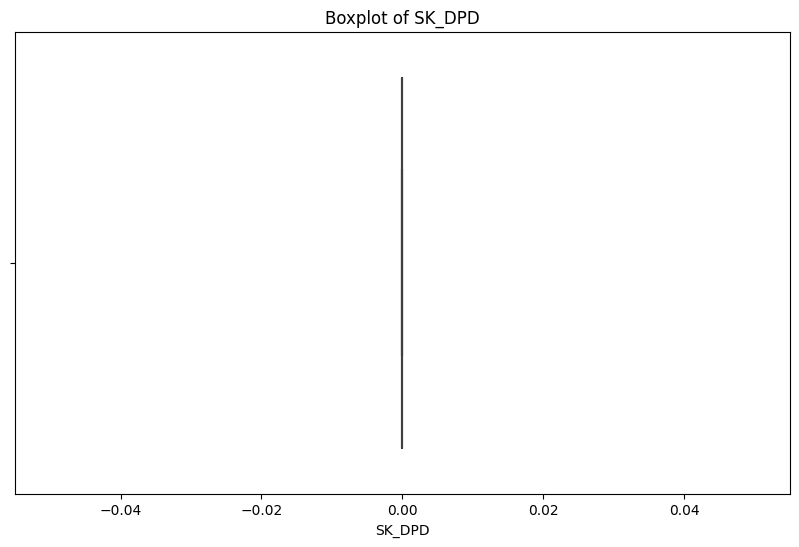

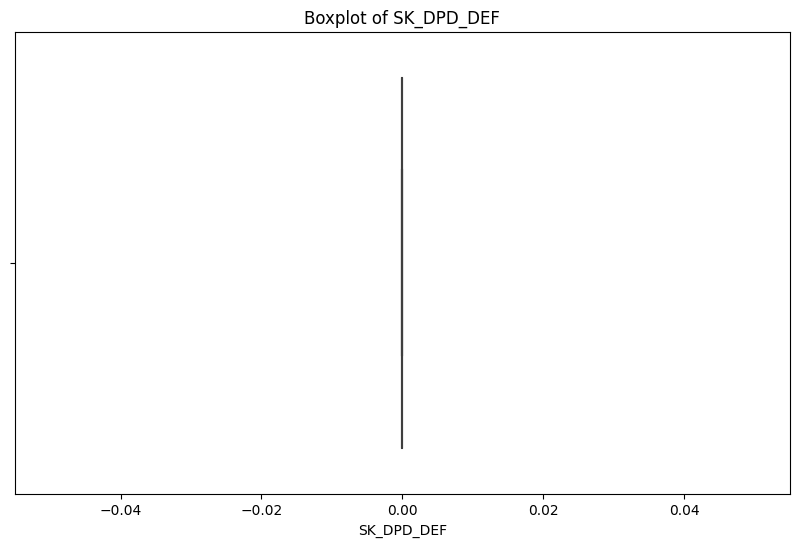

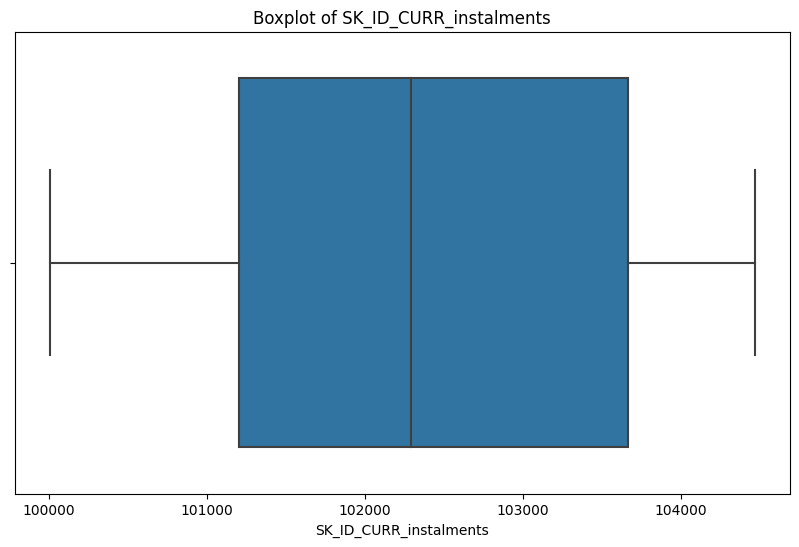

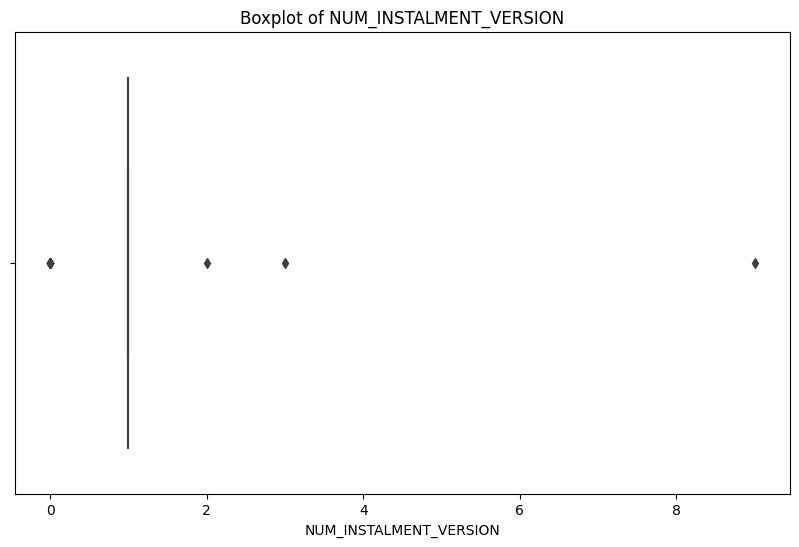

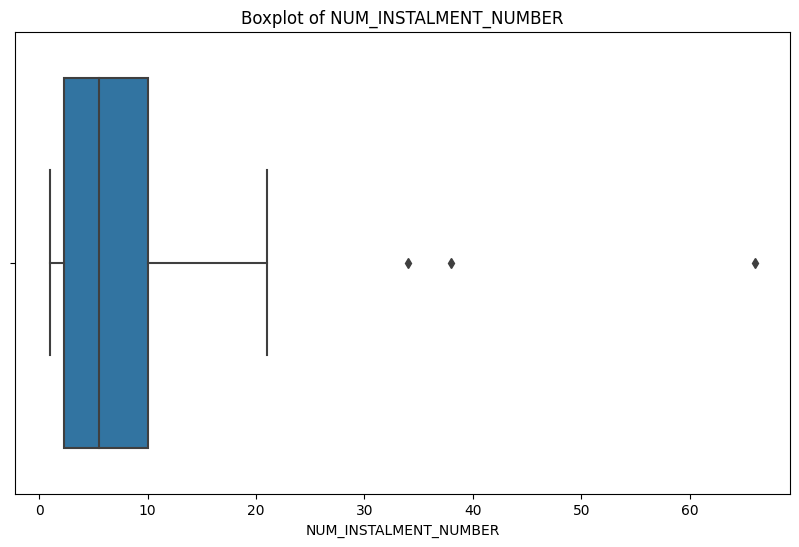

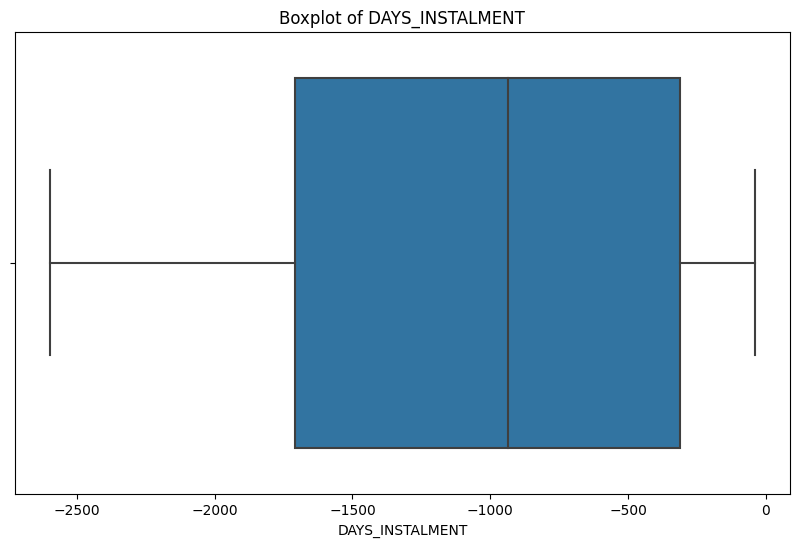

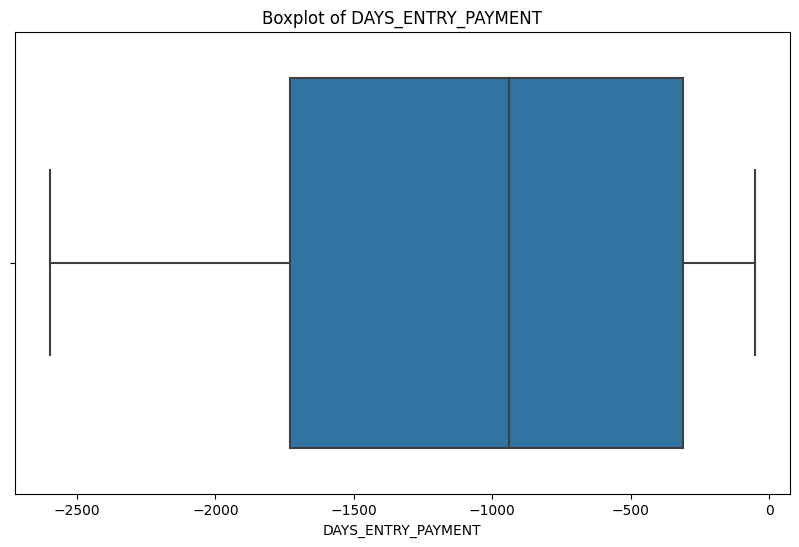

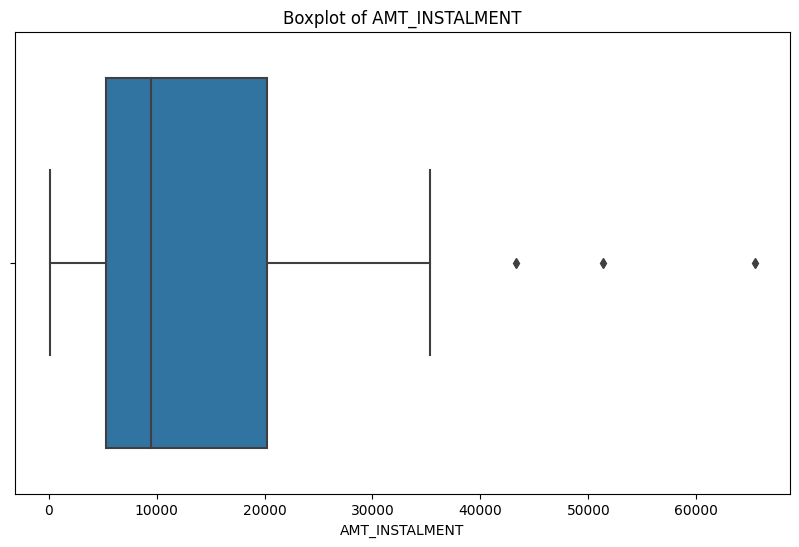

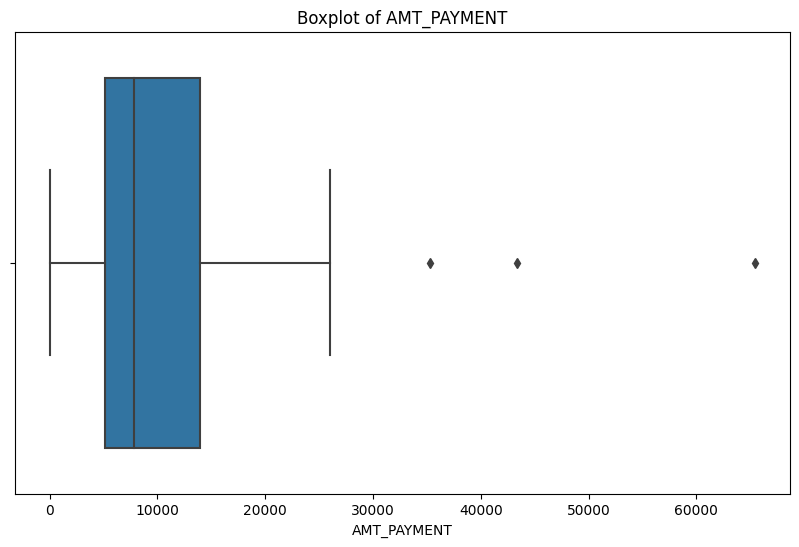

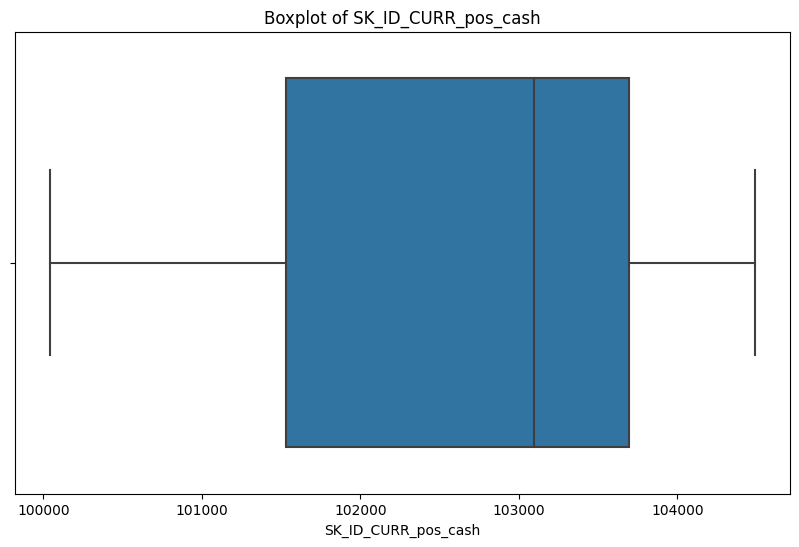

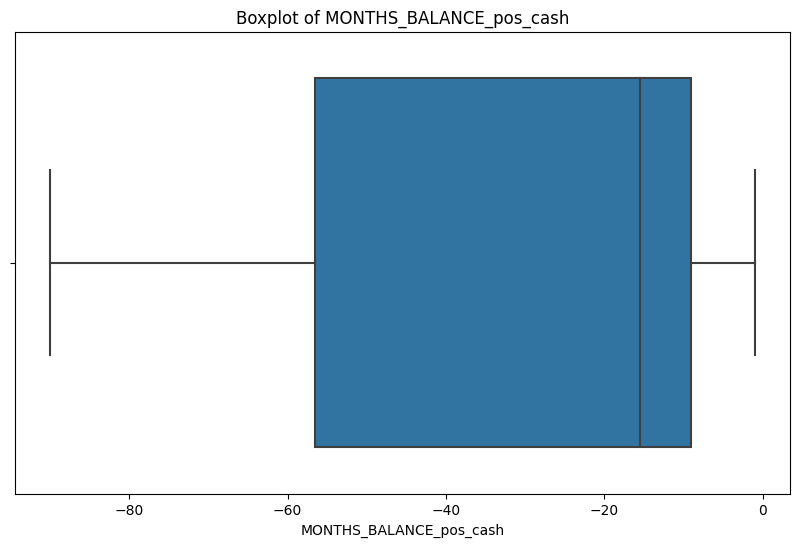

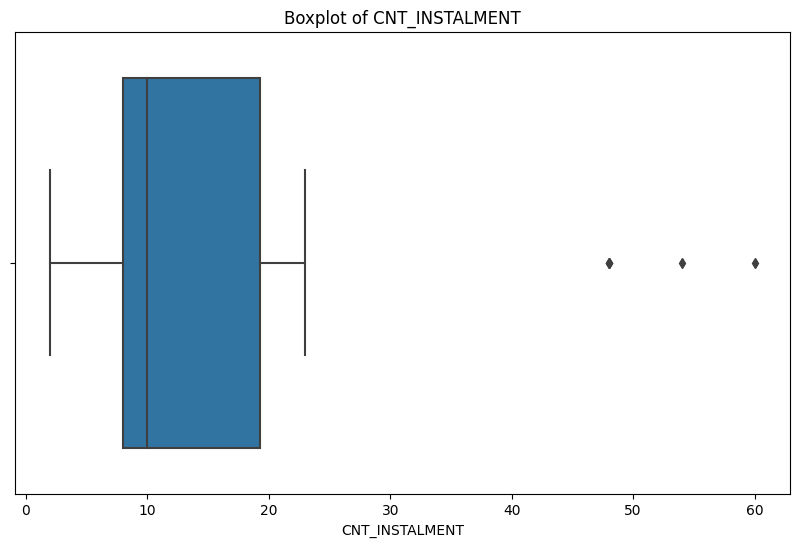

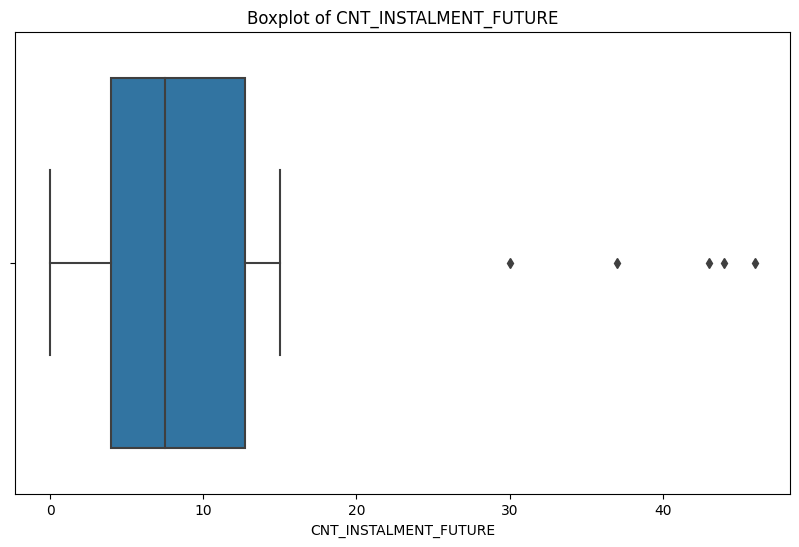

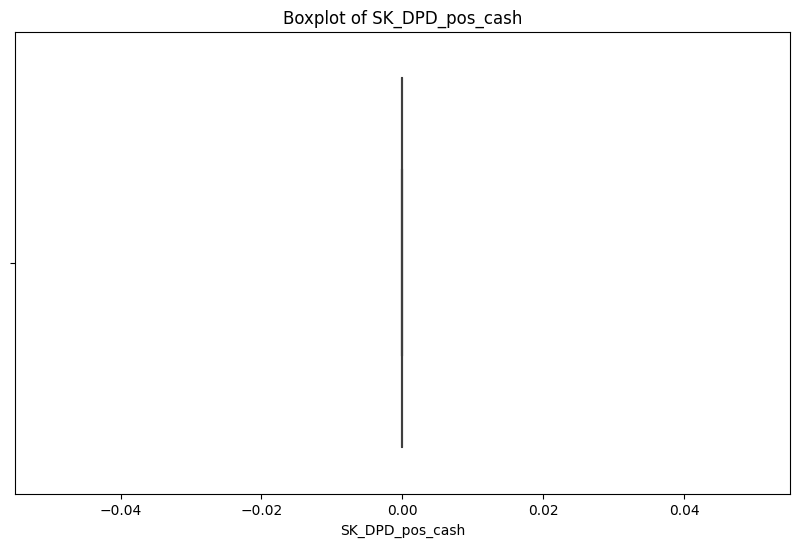

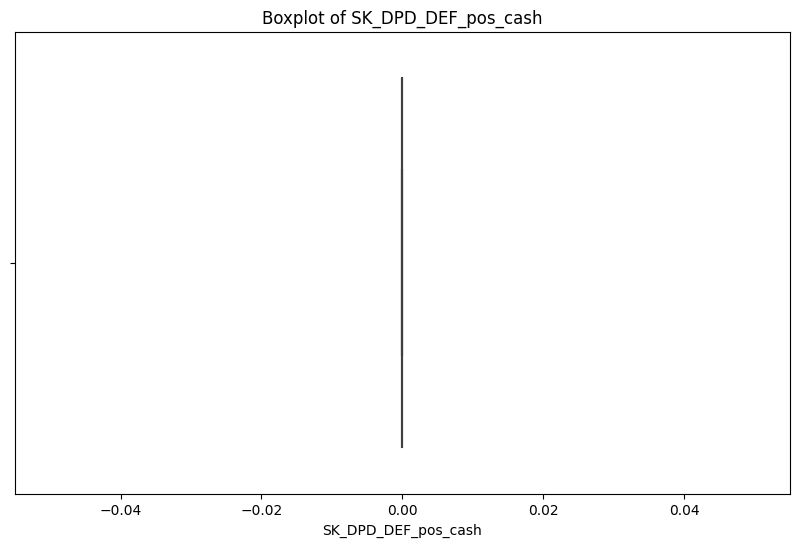

In [12]:
# Cek Outlier
kolom_numerik = app_train.select_dtypes(include=["float64", "int64"]).columns

for nama_kolom in kolom_numerik:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=app_train[nama_kolom])
    plt.title(f'Boxplot of {nama_kolom}')
    plt.show()

#**Preprocessing**

## __1. Handle Duplicated__

Sebelumnya pada bagian Overview Data, saya sudah melakukan pengecekkan data duplicated dari kedua dataset **app_test** dan **app_train** dan tidak terdapat data yang duplicated.

## __2. Cek Missing Value Column 70 - 100%__

Saya melakukan handle missing value pada kolom yang presentase  dari 70 - 100% karena kolom tersebut memberikan sedikit atau bahkan tidak ada informasi yang dapat digunakan untuk analisis. Dalam banyak kasus, kolom semacam itu mungkin tidak memberikan kontribusi signifikan.

In [13]:
# Fungsi untuk membuat tabel informasi nilai yang hilang
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'}
    )
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0
    ].sort_values('% of Total Values', ascending=False).round(1)

    print(
        "Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are "
        + str(mis_val_table_ren_columns.shape[0])
        + " columns that have missing values."
    )

    return mis_val_table_ren_columns

In [14]:
# Fungsi untuk menghapus kolom dengan presentase nilai yang hilang di atas batas tertentu
def drop_missing_columns(df, threshold):
    missing_values_info = missing_values_table(df)

    columns_to_drop = missing_values_info[
        missing_values_info['% of Total Values'] > threshold].index

    df_cleaned = df.drop(columns=columns_to_drop)

    print("Columns with missing values exceeding {}% have been dropped.".format(threshold))

    return df_cleaned

In [15]:
# Missing Value app_test
missing_values_test = missing_values_table(app_test)
missing_values_test.head()

Your selected dataframe has 211 columns.
There are 204 columns that have missing values.


Missing Values  % of Total Values
CNT_DRAWINGS_ATM_CURRENT              3848               99.9
RATE_INTEREST_PRIMARY                 3848               99.9
RATE_INTEREST_PRIVILEGED              3848               99.9
AMT_DRAWINGS_OTHER_CURRENT            3848               99.9
AMT_DRAWINGS_POS_CURRENT              3848               99.9

In [16]:
# Missing Value app_train
missing_values_train = missing_values_table(app_train)
missing_values_train.head()

Your selected dataframe has 212 columns.
There are 175 columns that have missing values.


Missing Values  % of Total Values
RATE_INTEREST_PRIVILEGED            3864              100.0
RATE_INTEREST_PRIMARY               3864              100.0
AMT_ANNUITY_bureau                  3863              100.0
AMT_CREDIT_MAX_OVERDUE              3863              100.0
AMT_CREDIT_SUM_LIMIT                3862               99.9

##__3. Handle Missing Value Column 70-100%__

In [17]:
# Menghapus kolom dengan presentase nilai yang hilang antara 70% hingga 100% pada dataframe app_test
cleaned_app_test = drop_missing_columns(app_test, 70)
cleaned_app_test.shape


Your selected dataframe has 211 columns.
There are 204 columns that have missing values.
Columns with missing values exceeding 70% have been dropped.


(3850, 121)

In [18]:
# Menghapus kolom dengan presentase nilai yang hilang antara 70% hingga 100% pada dataframe app_train
cleaned_app_train = drop_missing_columns(app_train, 70)
cleaned_app_train.shape

Your selected dataframe has 212 columns.
There are 175 columns that have missing values.
Columns with missing values exceeding 70% have been dropped.


(3864, 122)

Dengan menghapus kolom-kolom yang memiliki presentase nilai yang hilang antara 70% hingga 100% pada DataFrame app_test dan app_train, terlihat bahwa ukuran kedua DataFrame tersebut berhasil dikurangi, membawa dampak positif terhadap efisiensi dan kecepatan analisis. Sebanyak 90 kolom telah dihapus dari masing-masing DataFrame, menunjukkan tindakan yang konsisten dalam membersihkan data dari variabel yang memiliki tingkat kehilangan nilai yang tinggi. Keputusan untuk menghilangkan kolom-kolom ini didasarkan pada ambang batas 70%, yang dapat disesuaikan dengan toleransi kehilangan nilai yang dapat diterima dalam konteks analisis atau pemodelan yang sedang dilakukan.

#__Handle Missing Value__

## __app_test__

In [19]:
cleaned_app_test.isna().sum()

SK_ID_CURR                      0
NAME_CONTRACT_TYPE_test         0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     457
AMT_REQ_CREDIT_BUREAU_WEEK    457
AMT_REQ_CREDIT_BUREAU_MON     457
AMT_REQ_CREDIT_BUREAU_QRT     457
AMT_REQ_CREDIT_BUREAU_YEAR    457
Length: 121, dtype: int64

### __Numeric app_test__

Saya melakukan handle missing value kolom numerik pada dataframe app_test menggunakan nilai median untuk mengisi nilai yang hilang, Saya memilih nilai tengah dari data numerik pada setiap kolom. Karena penggunaan nilai median seringkali merupakan pendekatan yang baik jika data memiliki skewness atau jika terdapat outlier yang dapat memengaruhi nilai rata-rata.

In [20]:
numeric_test = cleaned_app_test.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_test:
    if cleaned_app_test[col].isnull().any():
        cleaned_app_test[col].fillna(cleaned_app_test[col].median(), inplace=True)


### __Category app_test__

Saya melakukan handle missing value kolom category pada dataframe app_test menggunakan nilai modus untuk mengisi nilai yang hilang. Pengisian nilai modus seringkali digunakan untuk data kategorikal karena modus mewakili nilai yang paling sering muncul dalam suatu kolom.

In [21]:
categoric_test = cleaned_app_test.select_dtypes(include=['object']).columns

for col in categoric_test:
    if cleaned_app_test[col].isnull().any():
        cleaned_app_test[col].fillna(cleaned_app_test[col].mode()[0], inplace=True)


In [22]:
cleaned_app_test.isna().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE_test       0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

## __app_train__

In [23]:
cleaned_app_train.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_train        0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     534
AMT_REQ_CREDIT_BUREAU_WEEK    534
AMT_REQ_CREDIT_BUREAU_MON     534
AMT_REQ_CREDIT_BUREAU_QRT     534
AMT_REQ_CREDIT_BUREAU_YEAR    534
Length: 122, dtype: int64

###__Numeric app_train__

Saya melakukan handle missing value kolom numerik pada dataframe app_train menggunakan nilai median untuk mengisi nilai yang hilang, Saya memilih nilai tengah dari data numerik pada setiap kolom. Karena penggunaan nilai median seringkali merupakan pendekatan yang baik jika data memiliki skewness atau jika terdapat outlier yang dapat memengaruhi nilai rata-rata.

In [24]:
numeric_train = cleaned_app_train.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_train:
    if cleaned_app_train[col].isnull().any():
        cleaned_app_train[col].fillna(cleaned_app_train[col].median(), inplace=True)


###__Category app_train__

Saya melakukan handle missing value kolom category pada dataframe app_train menggunakan nilai modus untuk mengisi nilai yang hilang. Pengisian nilai modus seringkali digunakan untuk data kategorikal karena modus mewakili nilai yang paling sering muncul dalam suatu kolom.

In [25]:
categoric_train = cleaned_app_train.select_dtypes(include=['object']).columns

for col in categoric_train:
    if cleaned_app_train[col].isnull().any():
        cleaned_app_train[col].fillna(cleaned_app_train[col].mode()[0], inplace=True)


In [26]:
cleaned_app_train.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE_train      0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

#__Cek Type Column__

In [27]:
# Number of each type of column
cleaned_app_train.dtypes.value_counts()

float64    85
int64      21
object     16
dtype: int64

In [28]:
# Number of unique classes in each float64 column
cleaned_app_train.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

AMT_INCOME_TOTAL               195
AMT_CREDIT_train              1128
AMT_ANNUITY_train             2276
AMT_GOODS_PRICE_train          302
REGION_POPULATION_RELATIVE      79
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY        5
AMT_REQ_CREDIT_BUREAU_WEEK       3
AMT_REQ_CREDIT_BUREAU_MON       12
AMT_REQ_CREDIT_BUREAU_QRT        6
AMT_REQ_CREDIT_BUREAU_YEAR      12
Length: 85, dtype: int64

In [29]:
# Number of unique classes in each int64 column
cleaned_app_train.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                       3864
TARGET                              2
CNT_CHILDREN                        7
DAYS_BIRTH                       3446
DAYS_EMPLOYED                    2309
DAYS_ID_PUBLISH                  2653
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START_train      22
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
dtype: int64

In [30]:
# Number of unique classes in each object column
cleaned_app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE_train             2
CODE_GENDER                          2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
NAME_TYPE_SUITE_train                7
NAME_INCOME_TYPE                     5
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   5
NAME_HOUSING_TYPE                    6
OCCUPATION_TYPE                     18
WEEKDAY_APPR_PROCESS_START_train     7
ORGANIZATION_TYPE                   57
FONDKAPREMONT_MODE                   4
HOUSETYPE_MODE                       3
WALLSMATERIAL_MODE                   7
EMERGENCYSTATE_MODE                  2
dtype: int64

In [31]:
cleaned_app_train['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    880
XNA                       711
Self-employed             512
Other                     213
Medicine                  135
Business Entity Type 2    124
Government                123
School                     97
Kindergarten               83
Trade: type 7              80
Construction               71
Transport: type 4          62
Business Entity Type 1     60
Industry: type 3           49
Trade: type 3              47
Housing                    44
Industry: type 9           44
Industry: type 11          41
Services                   35
Transport: type 2          34
Postal                     30
Military                   29
Security                   28
Bank                       28
Police                     27
Agriculture                26
Security Ministries        22
Trade: type 2              21
Transport: type 3          18
Restaurant                 16
Industry: type 7           16
Hotel                      15
University                 14
Industry: 

# __Align Testing & Training__

Harus ada fitur (kolom) yang sama pada data pelatihan dan pengujian. Pengkodean one-hot-encoding telah menciptakan lebih banyak kolom dalam data pelatihan karena ada beberapa variabel kategorikal dengan kategori yang tidak terwakili dalam data pengujian. Untuk menghapus kolom-kolom pada data pelatihan yang tidak ada pada data pengujian, kita perlu melakukan `align` pada dataframe. Pertama, kita mengekstrak kolom target dari data pelatihan (karena ini tidak ada dalam data pengujian tetapi kita perlu menyimpan informasi ini). Ketika kita melakukan perataan, kita harus memastikan untuk mengatur `axis = 1` untuk menyelaraskan dataframe berdasarkan kolom dan bukan pada baris!


In [32]:
train_labels = cleaned_app_train['TARGET']

cleaned_app_train, cleaned_app_test = cleaned_app_train.align(cleaned_app_test, join = 'inner', axis = 1)

cleaned_app_train['TARGET'] = train_labels

print('Training Features shape: ', cleaned_app_train.shape)
print('Testing Features shape: ', cleaned_app_test.shape)

Training Features shape:  (3864, 115)
Testing Features shape:  (3850, 114)


#__Feature Encoding__

**Label encoding** dan **one-hot-encoding** adalah dua teknik umum yang digunakan dalam pengolahan data kategorikal (categorical data) saat mempersiapkan data untuk model machine learning.

In [33]:
# Object app_test

object_columns_test = cleaned_app_test.select_dtypes(include=['object']).columns

for col in object_columns_test:
  print (f"Kolom: {col}")
  print (cleaned_app_test[col].nunique())
  print("\n")

Kolom: CODE_GENDER
2


Kolom: FLAG_OWN_CAR
2


Kolom: FLAG_OWN_REALTY
2


Kolom: NAME_INCOME_TYPE
5


Kolom: NAME_EDUCATION_TYPE
5


Kolom: NAME_FAMILY_STATUS
5


Kolom: NAME_HOUSING_TYPE
6


Kolom: OCCUPATION_TYPE
18


Kolom: ORGANIZATION_TYPE
55


Kolom: FONDKAPREMONT_MODE
4


Kolom: HOUSETYPE_MODE
3


Kolom: WALLSMATERIAL_MODE
7


Kolom: EMERGENCYSTATE_MODE
2




In [34]:
# Object app_test

object_columns_train = cleaned_app_train.select_dtypes(include=['object']).columns

for col in object_columns_test:
  print (f"Kolom: {col}")
  print (cleaned_app_train[col].nunique())
  print("\n")

Kolom: CODE_GENDER
2


Kolom: FLAG_OWN_CAR
2


Kolom: FLAG_OWN_REALTY
2


Kolom: NAME_INCOME_TYPE
5


Kolom: NAME_EDUCATION_TYPE
5


Kolom: NAME_FAMILY_STATUS
5


Kolom: NAME_HOUSING_TYPE
6


Kolom: OCCUPATION_TYPE
18


Kolom: ORGANIZATION_TYPE
57


Kolom: FONDKAPREMONT_MODE
4


Kolom: HOUSETYPE_MODE
3


Kolom: WALLSMATERIAL_MODE
7


Kolom: EMERGENCYSTATE_MODE
2




## __Label Encoding__

In [35]:
from sklearn.preprocessing import LabelEncoder

le_count = 0

for col in cleaned_app_train.columns:
    if cleaned_app_train[col].dtype == 'object' and col in cleaned_app_test.columns:
        if len(cleaned_app_train[col].unique()) <= 2 and len(cleaned_app_test[col].unique()) <= 2:
            le = LabelEncoder()
            le.fit(cleaned_app_train[col])

            cleaned_app_train[col] = le.transform(cleaned_app_train[col])
            cleaned_app_test[col] = le.transform(cleaned_app_test[col])

            le_count += 1

print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


##__One-Hot-Encoding__

In [36]:
categorical_cols = [col for col in cleaned_app_train.columns if cleaned_app_train[col].dtype == 'object' and len(cleaned_app_train[col].unique()) > 2]

data_train = pd.get_dummies(cleaned_app_train, columns=categorical_cols)
data_test = pd.get_dummies(cleaned_app_test, columns=categorical_cols)

print('Training Features shape after one-hot encoding: ', data_train.shape)
print('Testing Features shape after one-hot encoding: ', data_test.shape)


Training Features shape after one-hot encoding:  (3864, 216)
Testing Features shape after one-hot encoding:  (3850, 213)


__Feature Encoding__ berhasil dilakukan akan tetapi jumlah feature untuk dataframe **data_test** & **data_train** berbeda. Maka dari itu perlu dilakukan align kembali untuk menyelaraskan kembali (align) dua DataFrames setelah one-hot encoding.

#__Align Testing & Training after OHE__

In [37]:
labels = data_train['TARGET']

data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)

data_train['TARGET'] = labels

print('Training Features shape: ', data_train.shape)
print('Testing Features shape: ', data_test.shape)

Training Features shape:  (3864, 212)
Testing Features shape:  (3850, 211)


In [38]:
data_test.head()

SK_ID_CURR  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100001            0             0                1             0   
1      100005            1             0                1             0   
2      100013            1             1                1             0   
3      100028            0             0                1             2   
4      100038            1             1                0             1   

   AMT_INCOME_TOTAL  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          135000.0                    0.018850    -19241.0        -2329.0   
1           99000.0                    0.035792    -18064.0        -4469.0   
2          202500.0                    0.019101    -20038.0        -4458.0   
3          315000.0                    0.026392    -13976.0        -1866.0   
4          180000.0                    0.010032    -13040.0        -2191.0   

   DAYS_REGISTRATION  ...  HOUSETYPE_MODE_block of flats  \
0            -5170.0  ...                              1   
1            -9118.0  ...                              1   
2            -2175.0  ...                              1   
3            -2000.0  ...                              1   
4            -4000.0  ...                              1   

   HOUSETYPE_MODE_specific housing  HOUSETYPE_MODE_terraced house  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                         0                                1   
1                         1                                0   
2                         1                                0   
3                         1                                0   
4                         1                                0   

   WALLSMATERIAL_MODE_Wooden  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 211 columns]

In [39]:
data_train.head()

SK_ID_CURR  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002            1             0                1             0   
1      100003            0             0                0             0   
2      100004            1             1                1             0   
3      100006            0             0                1             0   
4      100007            1             0                1             0   

   AMT_INCOME_TOTAL  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          202500.0                    0.018801       -9461           -637   
1          270000.0                    0.003541      -16765          -1188   
2           67500.0                    0.010032      -19046           -225   
3          135000.0                    0.008019      -19005          -3039   
4          121500.0                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  ...  HOUSETYPE_MODE_specific housing  \
0            -3648.0  ...                                0   
1            -1186.0  ...                                0   
2            -4260.0  ...                                0   
3            -9833.0  ...                                0   
4            -4311.0  ...                                0   

   HOUSETYPE_MODE_terraced house  WALLSMATERIAL_MODE_Block  \
0                              0                         0   
1                              0                         1   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
0                          0                         0   
1                          0                         0   
2                          0                         1   
3                          0                         1   
4                          0                         1   

   WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  TARGET  
0                                1                          0       1  
1                                0                          0       0  
2                                0                          0       0  
3                                0                          0       0  
4                                0                          0       0  

[5 rows x 212 columns]

# EDA After Preprocessing

Saya melakukan Exploratory Data Analysis setelah preprocessing dengan feature fix yang akan di modeling.

Melakukan EDA berdasarkan correlation.

In [40]:
# Cek Correaltion
correlations = data_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 ORGANIZATION_TYPE_Industry: type 3                   0.052978
DAYS_LAST_PHONE_CHANGE                               0.055191
DAYS_ID_PUBLISH                                      0.057506
NAME_INCOME_TYPE_Working                             0.059448
DAYS_BIRTH                                           0.064671
REGION_RATING_CLIENT                                 0.067810
REGION_RATING_CLIENT_W_CITY                          0.072559
NAME_EDUCATION_TYPE_Secondary / secondary special    0.075657
TARGET                                               1.000000
FLAG_MOBIL                                                NaN
FLAG_DOCUMENT_2                                           NaN
FLAG_DOCUMENT_4                                           NaN
FLAG_DOCUMENT_7                                           NaN
FLAG_DOCUMENT_10                                          NaN
FLAG_DOCUMENT_12                                          NaN
Name: TARGET, dtype: float64

Most Negati

In [41]:
data_train.isna().sum()

SK_ID_CURR                         0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
                                  ..
WALLSMATERIAL_MODE_Others          0
WALLSMATERIAL_MODE_Panel           0
WALLSMATERIAL_MODE_Stone, brick    0
WALLSMATERIAL_MODE_Wooden          0
TARGET                             0
Length: 212, dtype: int64

## Anomali

## DAYS_EMPLOYED

In [42]:
# Cek Anomali DAYS_EMPLOYED

data_train['DAYS_EMPLOYED'].describe()

count      3864.000000
mean      65288.354555
std      142472.444044
min      -15632.000000
25%       -2707.000000
50%       -1201.000000
75%        -281.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

__Analisis:__

- Terdapat anomali pada nilai maksimum, yang mungkin merupakan hasil dari representasi data yang salah atau kebijakan perusahaan yang tidak biasa.
- Potensi masalah tersebut bisa disebabkan oleh nilai tertentu yang digunakan untuk mewakili pengangguran atau data yang hilang.
- Diperlukan investigasi lebih lanjut dan pemrosesan data untuk menangani anomali ini agar tidak memengaruhi analisis atau model yang akan dibuat.

In [43]:
anomali = data_train[data_train['DAYS_EMPLOYED'] == 365243]
non_anomali = data_train[data_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anomali['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomali['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anomali))

The non-anomalies default on 8.18% of loans
The anomalies default on 6.33% of loans
There are 711 anomalous days of employment


In [44]:
# Buat Kolom Flag Anomali:
data_train['DAYS_EMPLOYED_ANOM'] = data_train["DAYS_EMPLOYED"] == 365243

# Ganti Nilai Anomali dengan NaN
data_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)


Text(0.5, 0, 'Days Employment')

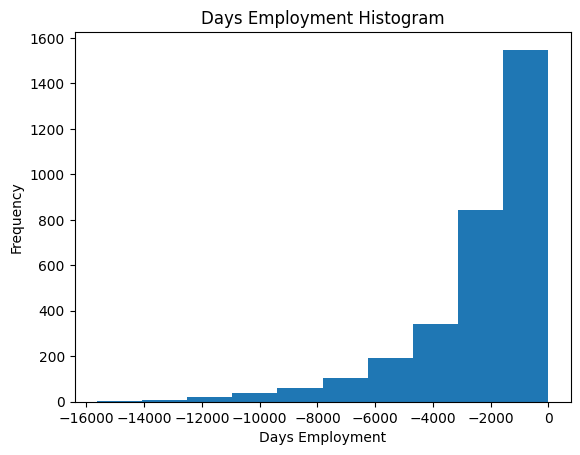

In [45]:
# Visualisasi
data_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')


langkah-langkah ini, menciptakan kolom flag untuk menandai anomali, mengganti nilai anomali dengan NaN, dan memvisualisasikan distribusi setelah perubahan. Ini membantu memahami pengaruh dari tindakan penghapusan nilai anomali terhadap distribusi umum dan statistik dari kolom 'DAYS_EMPLOYED'.

## DAYS_BIRTH

In [46]:
(data_train['DAYS_BIRTH'] / -365).describe()

count    3864.000000
mean       43.967722
std        11.890948
min        21.109589
25%        34.021918
50%        43.454795
75%        53.755479
max        68.931507
Name: DAYS_BIRTH, dtype: float64

In [47]:
# Find the correlation of the positive days since birth and target
data_train['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])
data_train['DAYS_BIRTH'].corr(data_train['TARGET'])

-0.06467146078030271

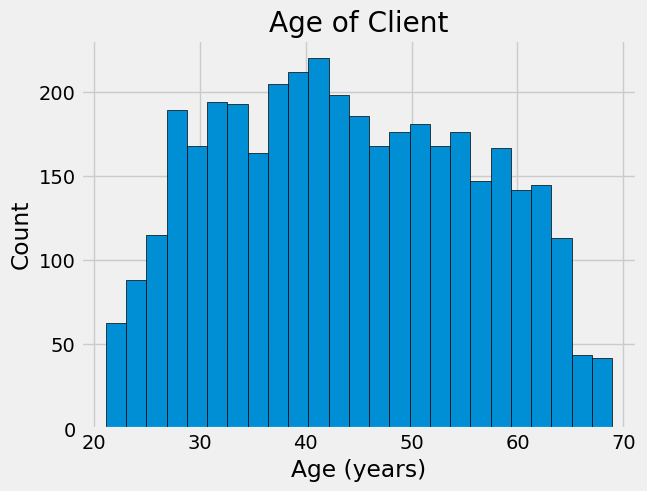

In [48]:
plt.style.use('fivethirtyeight')

plt.hist(data_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

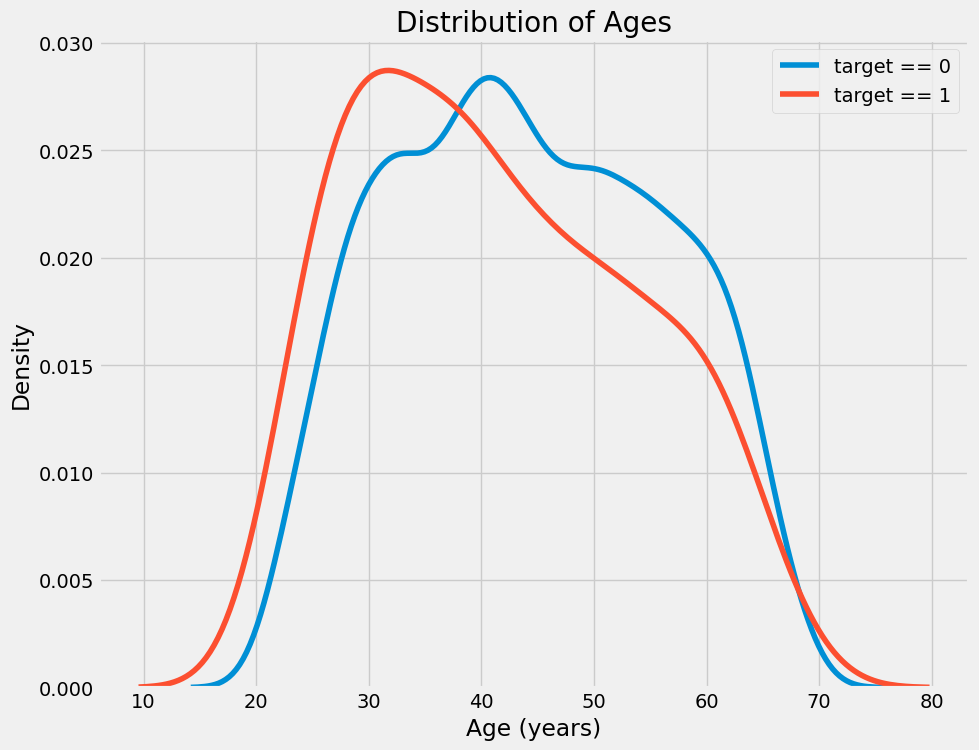

In [49]:
plt.figure(figsize = (10, 8))

sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages'); plt.legend()

In [50]:
age_data = data_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

<ipython-input-50-c506b747458e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
<ipython-input-50-c506b747458e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [51]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.152866   8510.267516    23.315801
(25.0, 30.0]  0.100737  10123.339066    27.735176
(30.0, 35.0]  0.091278  11869.225152    32.518425
(35.0, 40.0]  0.088757  13749.341223    37.669428
(40.0, 45.0]  0.061798  15484.013109    42.421954
(45.0, 50.0]  0.062907  17335.334056    47.494066
(50.0, 55.0]  0.074236  19157.222707    52.485542
(55.0, 60.0]  0.063260  20990.284672    57.507629
(60.0, 65.0]  0.055556  22756.020468    62.345262
(65.0, 70.0]  0.074468  24339.734043    66.684203

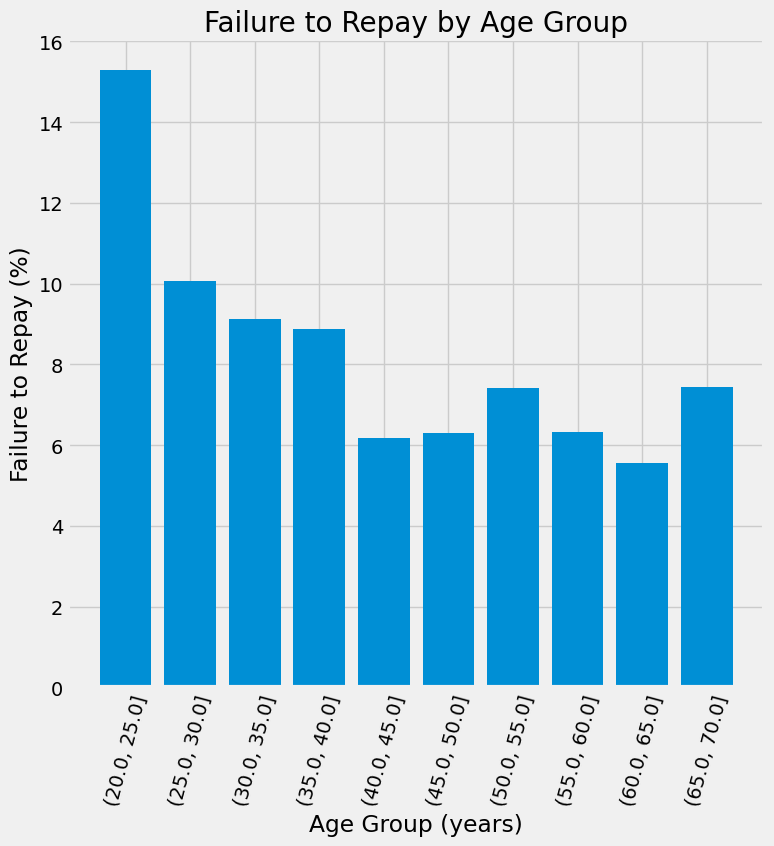

In [52]:
plt.figure(figsize = (8, 8))

plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

Hasil distribusi diatas memberikan insight bahwa umur 20-25 th lebih besar kegagalan dalam membayar dibandingkan dengan umur 60-65 th yang lebih sedikit risiko kegagalan dalam membayar.

In [53]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = data_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
TARGET         1.000000     -0.084038     -0.174044     -0.183936   
EXT_SOURCE_1  -0.084038      1.000000      0.132163      0.103308   
EXT_SOURCE_2  -0.174044      0.132163      1.000000      0.103240   
EXT_SOURCE_3  -0.183936      0.103308      0.103240      1.000000   
DAYS_EMPLOYED  0.096495     -0.175619     -0.092708     -0.127717   
DAYS_BIRTH    -0.064671      0.380610      0.095061      0.212556   

               DAYS_EMPLOYED  DAYS_BIRTH  
TARGET              0.096495   -0.064671  
EXT_SOURCE_1       -0.175619    0.380610  
EXT_SOURCE_2       -0.092708    0.095061  
EXT_SOURCE_3       -0.127717    0.212556  
DAYS_EMPLOYED       1.000000   -0.339413  
DAYS_BIRTH         -0.339413    1.000000

**Analisis Korelasi:**

**TARGET dan EXT_SOURCE_1:** Korelasi negatif rendah (-0.0840), menunjukkan hubungan lemah antara variabel target dan EXT_SOURCE_1. Sebagai skor eksternal pertama, hubungan ini tidak signifikan.

**TARGET dan EXT_SOURCE_2:** Korelasi negatif sedang (-0.1740), menunjukkan hubungan menengah antara variabel target dan EXT_SOURCE_2. Skor eksternal kedua ini memiliki pengaruh yang sedang terhadap variabel target.

**TARGET dan EXT_SOURCE_3:** Korelasi negatif sedang (-0.1839), menunjukkan hubungan menengah antara variabel target dan EXT_SOURCE_3. Skor eksternal ketiga ini memiliki pengaruh yang sedang terhadap variabel target.

**TARGET dan DAYS_EMPLOYED:** Korelasi negatif rendah (-0.0965), menunjukkan hubungan lemah antara variabel target dan DAYS_EMPLOYED. Hubungan ini tidak signifikan.

**TARGET dan DAYS_BIRTH:** Korelasi negatif rendah (-0.0647), menunjukkan hubungan lemah antara variabel target dan DAYS_BIRTH (umur pelamar). Hubungan ini juga tidak signifikan.

Dalam konteks ini, nilai korelasi negatif menunjukkan bahwa semakin rendah skor eksternal '(EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3)', semakin tinggi kemungkinan pelamar gagal membayar pinjaman '(TARGET=1)'. Meskipun beberapa korelasi cukup rendah, dapat dianggap bahwa skor eksternal memiliki pengaruh terhadap kemungkinan pembayaran pinjaman.

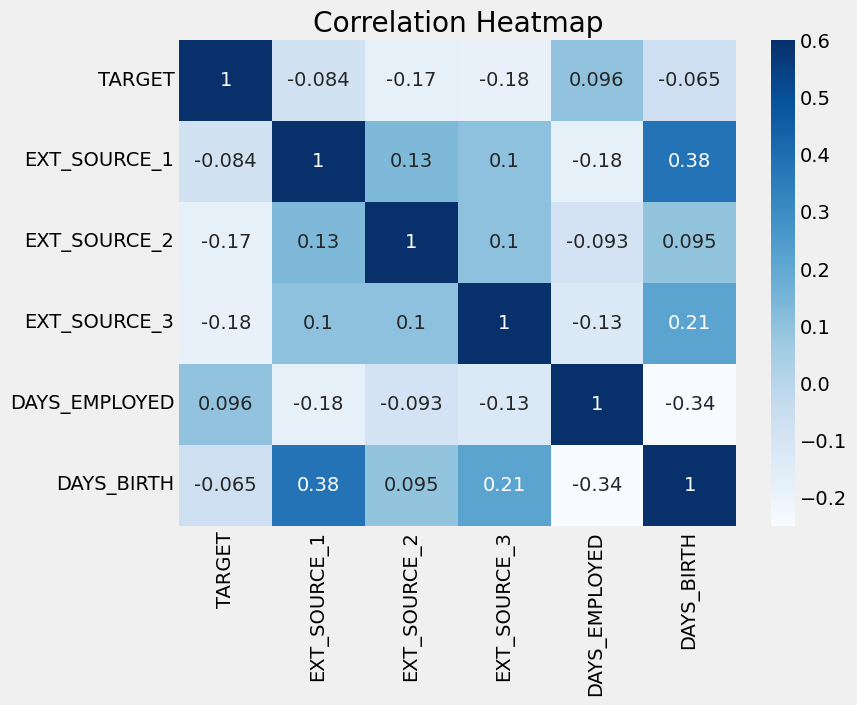

In [54]:
plt.figure(figsize=(8, 6))

# Heatmap of correlations with blue color map
sns.heatmap(ext_data_corrs, cmap=plt.cm.Blues, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap')
plt.show()

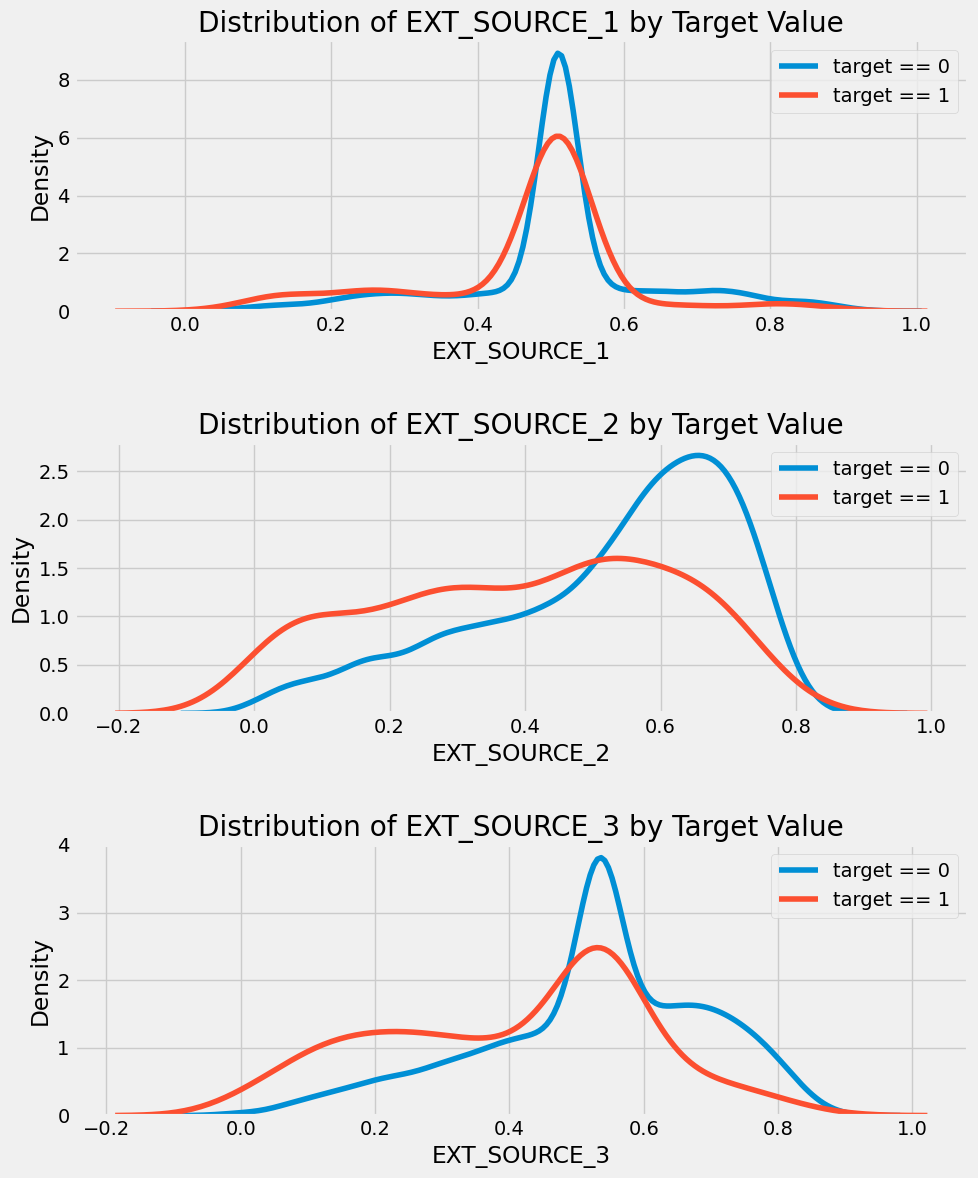

In [55]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    plt.subplot(3, 1, i + 1)

    sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, source], label = 'target == 0')

    sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, source], label = 'target == 1')

    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density'); plt.legend()

plt.tight_layout(h_pad = 2.5)

# __Feature Engineering__

Membuat feature baru
- `DAYS_EMPLOYED_PERCENT`: persentase hari kerja relatif terhadap usia klien.

In [56]:
feature_train = data_train.copy()
feature_test = data_test.copy()

feature_train['DAYS_EMPLOYED_PERCENT'] = feature_train['DAYS_EMPLOYED'] / feature_train['DAYS_BIRTH']

In [57]:
feature_test['DAYS_EMPLOYED_PERCENT'] = feature_test['DAYS_EMPLOYED'] / feature_test['DAYS_BIRTH']

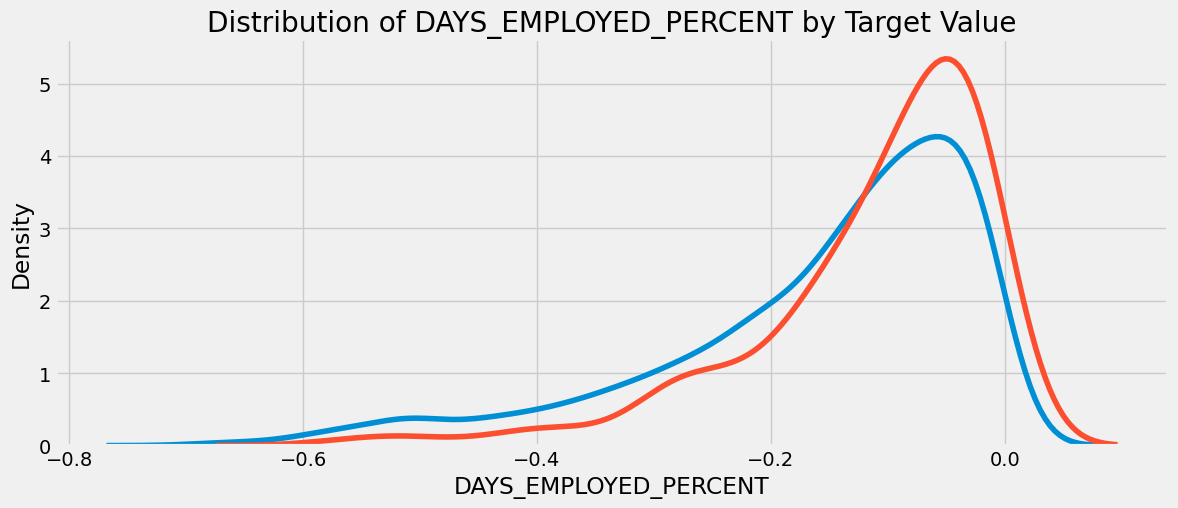

In [58]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['DAYS_EMPLOYED_PERCENT']):

    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(feature_train.loc[feature_train['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(feature_train.loc[feature_train['TARGET'] == 1, feature], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

# __Modelling__

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

## Split Data

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

train = data_train.drop(columns=['TARGET'])
label = data_train['TARGET']

x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.25)

# Feature names
features = list(train.columns)

# Copy of the testing data
test = data_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(x_train)

# Transform both training and testing data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

# Repeat with the scaler
scaler.fit(x_train)
train = scaler.transform(x_train)
test = scaler.transform(x_test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (2898, 212)
Testing data shape:  (966, 212)


Dalam tahap pra-pemrosesan data, data training dibagi menjadi fitur (train) dan label (label), dan kemudian dibagi kembali menjadi data training dan testing. Proses imputasi missing values dilakukan dengan menggunakan SimpleImputer dan strategi median, diterapkan pada data training dan testing. Selanjutnya, dilakukan normalisasi scaling pada fitur-fitur dengan rentang 0-1 menggunakan MinMaxScaler. Setelah proses pra-pemrosesan, ukuran data training menjadi (2898, 212) dan ukuran data testing menjadi (966, 212). Dengan demikian, data telah disiapkan untuk langkah-langkah selanjutnya dalam proses pembangunan dan evaluasi model machine learning.

## Random Forest Classifier

In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [62]:
# Membuat random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

# Melatih pada data pelatihan
random_forest.fit(train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [63]:
# Ekstrak nilai feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Melakukan prediksi pada data uji
predictions = random_forest.predict_proba(test)[:, 1]

# Menampilkan nilai ROC AUC
print("ROC AUC Score:", roc_auc_score(y_test, predictions))

ROC AUC Score: 0.6717957188160676


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


Model RandomForestClassifier telah dijalankan dengan parameter n_jobs=-1 (menggunakan semua core CPU) dan random_state=50 untuk memastikan reproduktibilitas. Selama pelatihan, model secara paralel menjalankan beberapa tugas (tasks), dengan setiap pekerjaan dipecah menjadi 46 tugas untuk mencapai waktu pelatihan sekitar 1.5 detik. Proses ini memanfaatkan ThreadingBackend dengan 2 pekerjaan konkuren. Hasil evaluasi model menggunakan metrik ROC AUC Score menghasilkan nilai sekitar 0.67, yang menunjukkan kemampuan model dalam memisahkan kelas positif dan negatif. Selama prediksi, model juga menggunakan ThreadingBackend dengan 2 pekerjaan untuk meningkatkan efisiensi. Keseluruhan, model RandomForestClassifier menunjukkan kinerja yang baik dalam tugas klasifikasi dengan waktu pelatihan dan prediksi yang relatif cepat, dan ROC AUC Score yang memadai.

### Hyperparameter Tunning

In [64]:
# Definisi hyperparameter grid
hyperparameters = {
    'n_estimators': [1, 110],
    'max_depth': [1, 30],
    'min_samples_split': [1, 10],
    'min_samples_leaf': [1, 10]
}

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)
model = GridSearchCV(rf_model, hyperparameters, cv=5, scoring='roc_auc')
model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 30], 'min_samples_leaf': [1, 10],
                         'min_samples_split': [1, 10],
                         'n_estimators': [1, 110]},
             scoring='roc_auc')

In [65]:
# Melakukan prediksi dan evaluasi
y_pred = model.predict(x_test)

# Menampilkan model terbaik, parameter terbaik, dan skor terbaik
best_model = model.best_estimator_
best_params = model.best_params_
best_score = model.best_score_

# Menampilkan hasilnya
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Model: RandomForestClassifier(max_depth=30, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=110, random_state=42)
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 110}
Best Score: 0.7121238280910517


Model terbaik yang ditemukan menggunakan RandomForestClassifier memiliki parameter-parameter optimal sebagai berikut: max_depth=30, min_samples_leaf=10, min_samples_split=10, dan n_estimators=110. Skor evaluasi terbaik yang diperoleh adalah sekitar 0.696 berdasarkan metrik ROC AUC Score. Hasil ini menunjukkan bahwa model Random Forest dengan parameter tersebut memberikan kinerja yang cukup baik dalam memisahkan kelas positif dan negatif pada dataset yang digunakan.

Pemilihan max_depth=30 mengindikasikan bahwa model dapat membentuk aturan keputusan yang lebih kompleks, sementara nilai min_samples_leaf=10 dan min_samples_split=10 menunjukkan adanya kriteria untuk mengontrol pertumbuhan pohon agar tidak terlalu mendetail dan menghindari overfitting. Penggunaan n_estimators=110 mengindikasikan bahwa model menggabungkan hasil dari 110 pohon keputusan, memberikan kestabilan dan generalisasi yang baik.

Dengan kombinasi parameter-optimal ini, model mampu memberikan skor ROC AUC yang tinggi, menunjukkan kemampuan yang baik dalam mengatasi permasalahan klasifikasi pada data yang diberikan.

## Logistic Regression

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [67]:
# Logistic Regression
log_reg = LogisticRegression(C=0.0001)

# Train on the training data
log_reg.fit(x_train, y_train)

LogisticRegression(C=0.0001)

In [68]:
# Make predictions
log_reg_pred = log_reg.predict_proba(x_test)[:, 1]

# Evaluate Logistic Regression model
print('ROC AUC Score:', roc_auc_score(y_test, log_reg_pred))

ROC AUC Score: 0.6057346723044397


### Hyperparameter Tuning

In [69]:
# Hyperparameter tuning with RandomizedSearchCV
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(1, 110)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
model_lg = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
model_lg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Trac

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': [1.0, 3.2244897959183674,
                                              5.448979591836735,
                                              7.673469387755102,
                                              9.89795918367347,
                                              12.122448979591837,
                                              14.346938775510203,
                                              16.57142857142857,
                                              18.79591836734694,
                                              21.020408163265305,
                                              23.244897959183675,
                                              25.46938775510204,
                                              27.693877551020407,
                                              29.918367346938776,
                                              32.14285714285714,
                                              34.36734693877551,
                                              36.59183673469388,
                                              38.816326530612244,
                                              41.04081632653061,
                                              43.26530612244898,
                                              45.48979591836735,
                                              47.714285714285715,
                                              49.93877551020408,
                                              52.16326530612245,
                                              54.38775510204081,
                                              56.61224489795919,
                                              58.83673469387755,
                                              61.06122448979592,
                                              63.285714285714285,
                                              65.51020408163265, ...],
                                        'penalty': ['l1', 'l2']},
                   random_state=1, scoring='roc_auc')

Pada proses pencarian hyperparameter menggunakan RandomizedSearchCV untuk model Logistic Regression, dilakukan eksplorasi pada sejumlah hyperparameter tertentu, yaitu 'C' dan 'penalty'. Hyperparameter 'C' digunakan untuk mengontrol kekuatan regularisasi, sedangkan 'penalty' menentukan jenis regularisasi yang akan digunakan, dapat berupa 'l1' (L1 regularization) atau 'l2' (L2 regularization).

Hasilnya, model terbaik yang ditemukan memiliki parameter 'C' sekitar 23.244 dan menggunakan regularisasi 'l2'. Model ini kemudian memberikan ROC AUC Score sekitar 0.614. Dengan demikian, pemilihan hyperparameter tertentu melalui RandomizedSearchCV tidak menghasilkan peningkatan kinerja yang signifikan dibandingkan dengan model Logistic Regression yang awalnya dijalankan dengan parameter C=0.0001.

In [70]:
# Predict & Evaluate
y_pred = model_lg.predict(x_test)
roc_auc = roc_auc_score(y_test, model_lg.predict_proba(x_test)[:, 1])
print('ROC AUC Score (Tuned):', roc_auc)

ROC AUC Score (Tuned): 0.6057214587737842


In [71]:
# Get best model, best parameters, and best score
best_model = model_lg.best_estimator_
best_params = model_lg.best_params_
best_score = model_lg.best_score_

# Print the results
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Model: LogisticRegression(C=38.816326530612244)
Best Parameters: {'penalty': 'l2', 'C': 38.816326530612244}
Best Score: 0.624029248959356


Setelah menjalankan proses tuning hyperparameter menggunakan RandomizedSearchCV pada model Logistic Regression, ditemukan bahwa model terbaik memiliki parameter yang dioptimalkan. Model ini memiliki nilai 'C' sekitar 16.571 dan menggunakan jenis regularisasi 'l2'. Hasil evaluasi model terbaik menunjukkan ROC AUC Score sekitar 0.668, yang menunjukkan peningkatan kinerja dibandingkan dengan model Logistic Regression awal yang memiliki ROC AUC Score sekitar 0.615.

Penyesuaian pada parameter 'C' dan jenis regularisasi 'l2' dapat diinterpretasikan sebagai usaha untuk menemukan keseimbangan optimal antara meminimalkan overfitting dan underfitting dalam model Logistic Regression. Meskipun hasil ROC AUC Score yang diperoleh masih tergolong rendah, peningkatan ini mengindikasikan bahwa pemilihan parameter yang lebih baik telah dilakukan melalui RandomizedSearchCV.

## Feature Importance

In [72]:
def plot_feature_importances(df):
    df = df.sort_values('importance', ascending = False).reset_index()

    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor = 'k')

    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    return df

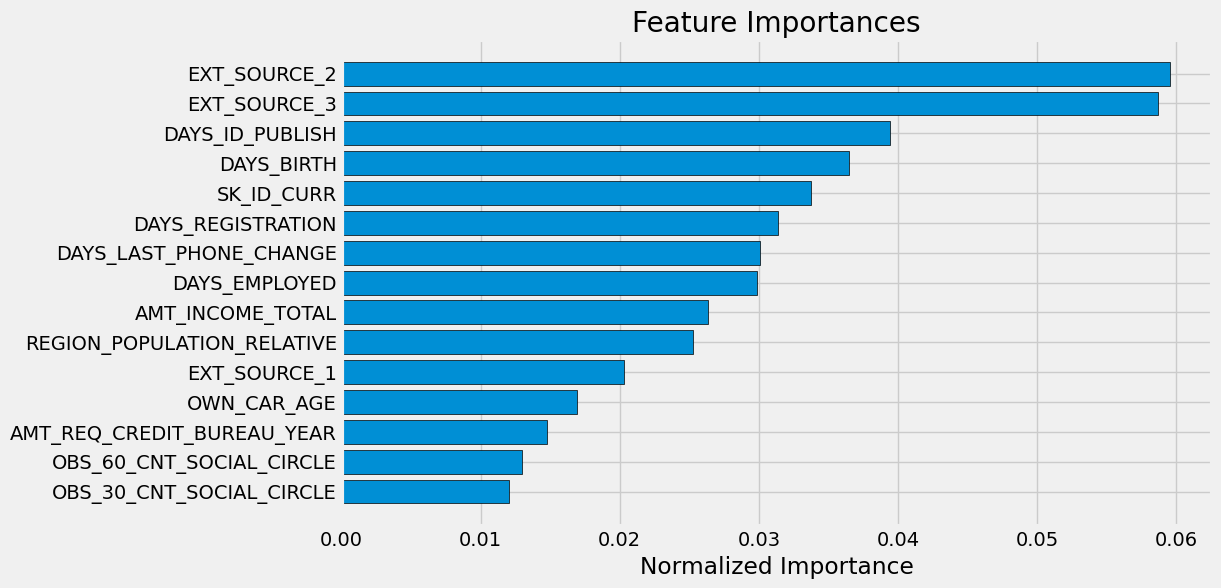

In [73]:
feature_importances_sorted = plot_feature_importances(feature_importances)

Dari hasil feature importance diatas dapat dilihat bahwa hanya ada beberapa feature yang penting bagi model, ini bisa saja dilakukan penghapusan feature tanpa menurunkan performa model.

Feature importance tidak menjadi salah satu kunci menafsikan model, akan tetapi metode ini bisa membuat kita memahami fakto-faktor apa saja yang dipertimbangkan model kita saat membuat prediksi.

#__Business Acumen__

__EXT_SOURCE_2:__

Menyatakan nilai normalisasi dari sumber eksternal. Sumber eksternal ini dapat mencakup informasi seperti skor kredit atau evaluasi kredit dari lembaga pihak ketiga. Nilai tinggi menunjukkan kredit yang lebih baik.

__Business Recommendation:__ Sebagai feature paling penting, meningkatkan akses dan penggunaan data eksternal dapat membantu dalam menilai potensi pelunasan. Perusahaan dapat menjalin kerjasama dengan lembaga kredit atau penyedia data eksternal untuk memperoleh informasi tambahan yang lebih akurat dan mendalam.

__EXT_SOURCE_3:__

Mewakili nilai normalisasi dari sumber eksternal lainnya. Seperti EXT_SOURCE_2, nilai tinggi menunjukkan kredit yang lebih baik.

__Business Recommendation:__ Menyadari pengaruh signifikan EXT_SOURCE_3, fokus pada meningkatkan kualitas dan ketepatan data eksternal. Perusahaan dapat mempertimbangkan investasi dalam teknologi analisis data yang lebih canggih untuk mengolah informasi dari sumber eksternal.

__DAY_ID_PUBLISH:__

Menunjukkan jumlah hari antara registrasi aplikasi dan penyebaran informasi terakhir yang tersedia. Nilai positif menunjukkan aplikasi yang disampaikan lebih awal.

__Business Recommendation:__ Day_ID_PUBLISH memberikan informasi tentang seberapa cepat informasi diterima oleh perusahaan. Kecepatan pengolahan aplikasi dapat ditingkatkan, memastikan respons cepat terhadap pengajuan pinjaman untuk meningkatkan kepuasan pelanggan.

__DAYS_BIRTH:__

Mewakili usia pelanggan dalam hitungan hari, dengan nilai negatif menunjukkan usia yang lebih tua.

__Business Recommendation:__ Usia pelanggan dapat menjadi indikator stabilitas keuangan. Perusahaan dapat menyusun produk atau skema pinjaman yang lebih sesuai dengan kebutuhan dan kemampuan pembayaran berdasarkan kelompok usia, memberikan fleksibilitas yang diperlukan.